# Программа визуализации расчетов Уравнения Переноса

In [1]:
from TE1DTests import *

In [2]:
print(CalculationResultsPath)
print(TECalculationsPath)
print(TE1DCalcRes)

print(PlotOutputPath)
print(TEPlotPath)
print(TE1DPlotRes)

/mnt/UbuntuSpace/Projects/DigitalGeometry/Programs/Output/CalculationResults
/mnt/UbuntuSpace/Projects/DigitalGeometry/Programs/Output/CalculationResults/TransportEquation
/mnt/UbuntuSpace/Projects/DigitalGeometry/Programs/Output/CalculationResults/TransportEquation/Solver1D
/mnt/UbuntuSpace/Projects/DigitalGeometry/Programs/Output/GraphicsResults
/mnt/UbuntuSpace/Projects/DigitalGeometry/Programs/Output/GraphicsResults/TransportEquation
/mnt/UbuntuSpace/Projects/DigitalGeometry/Programs/Output/GraphicsResults/TransportEquation/Solver1D


## Solver1DStripMovementTest

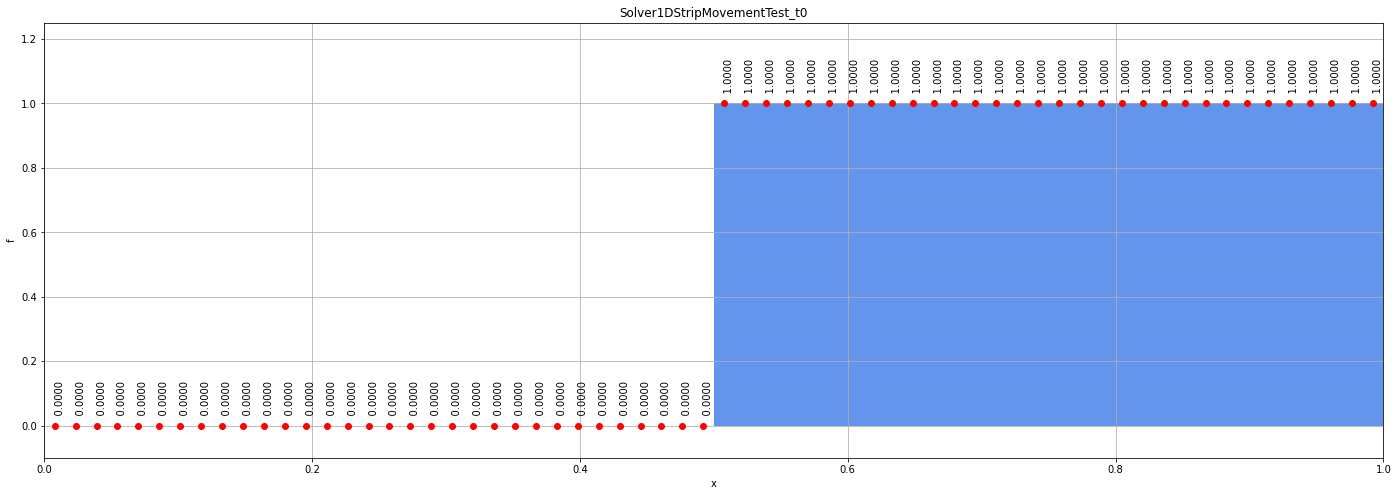

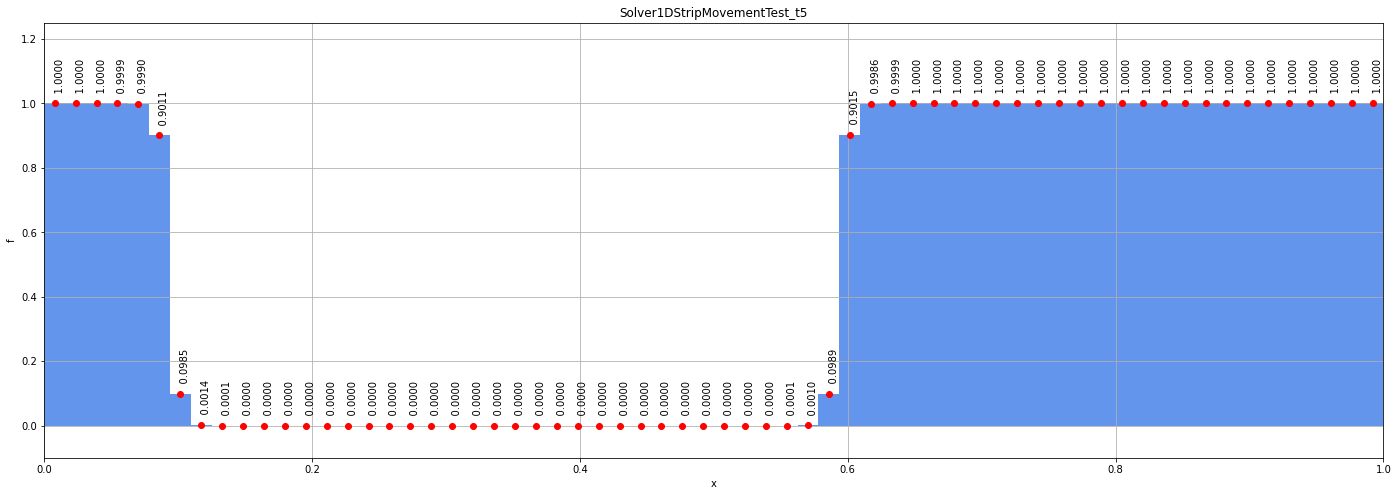

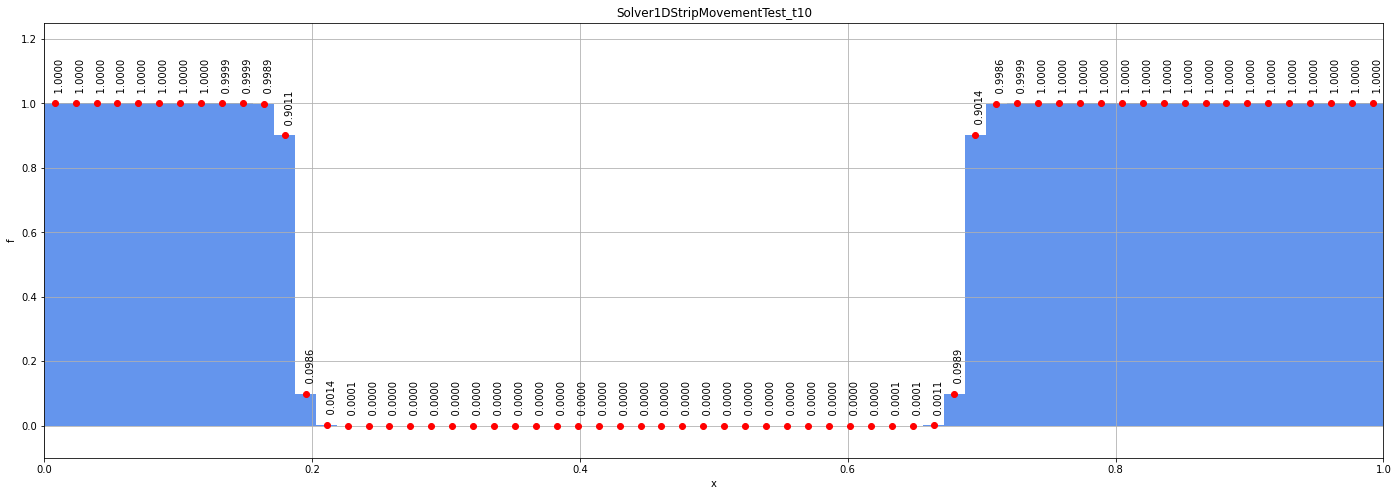

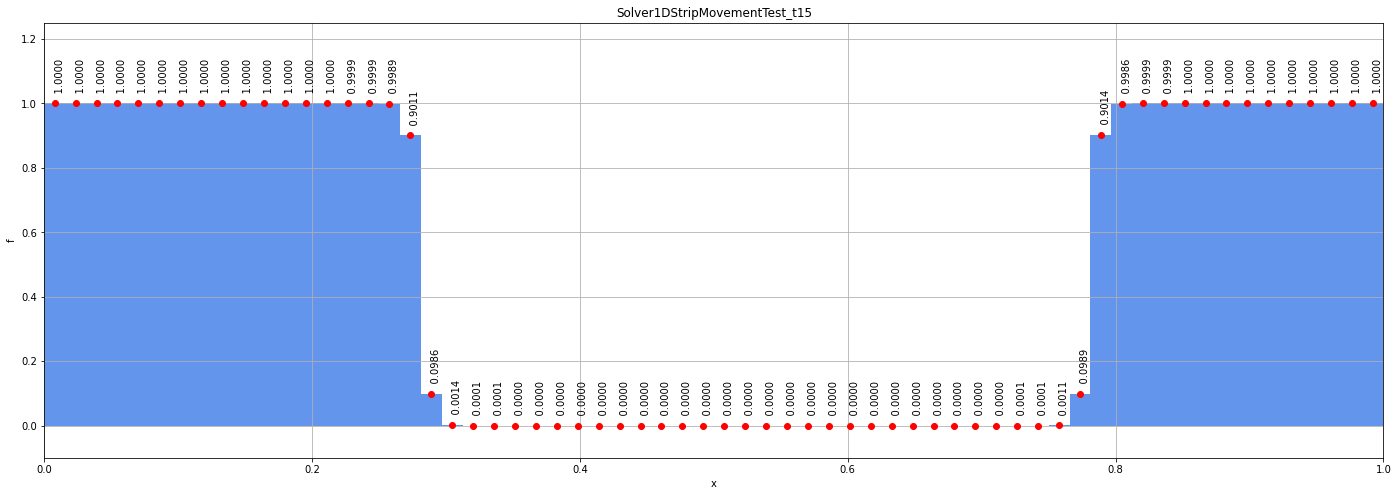

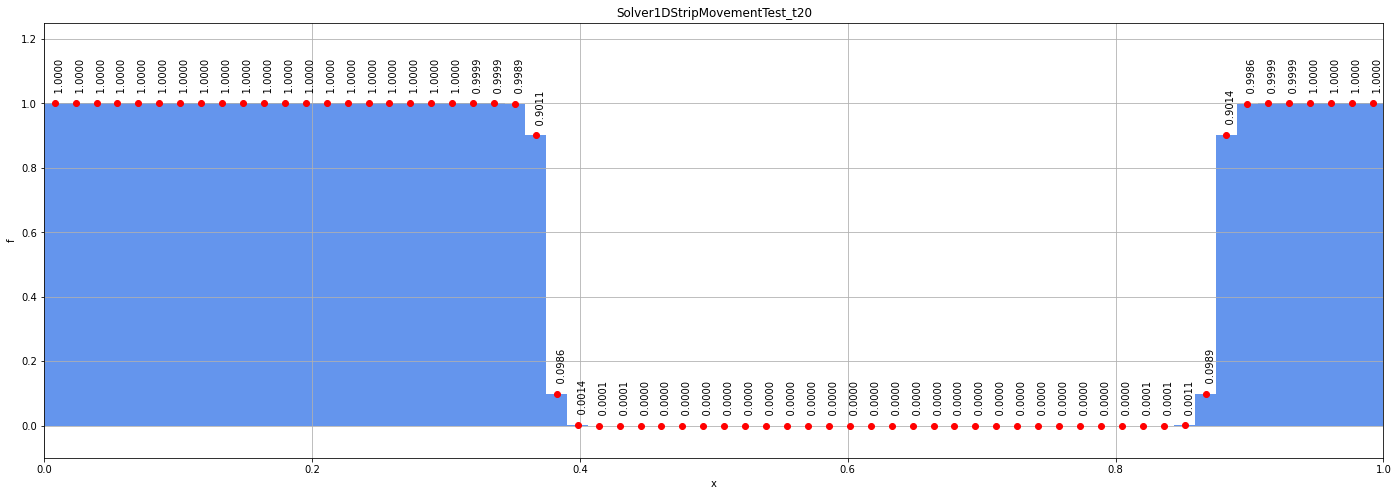

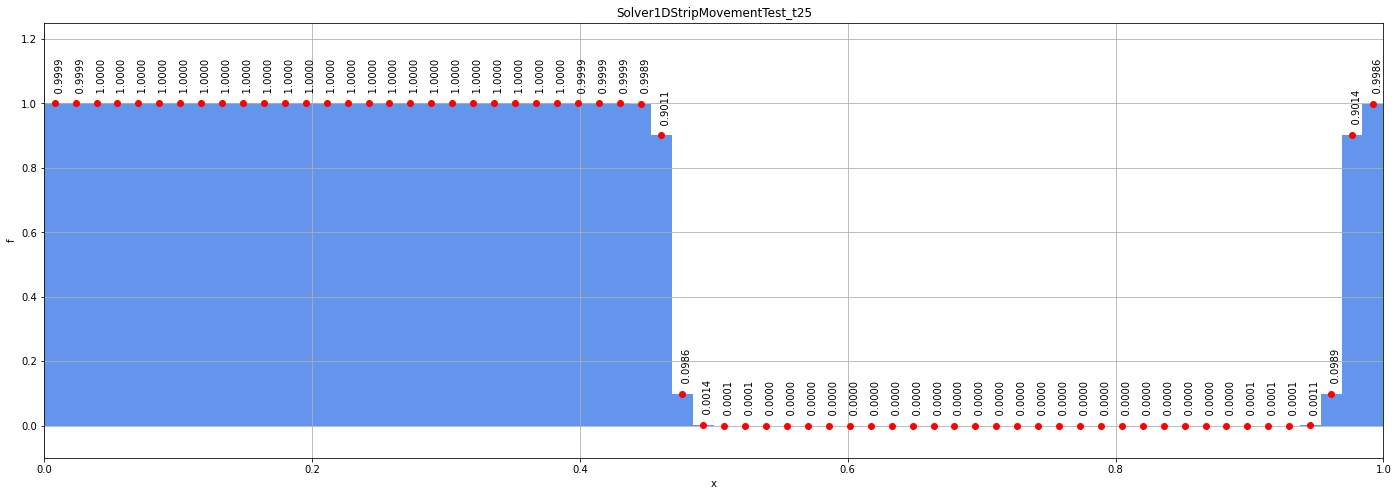

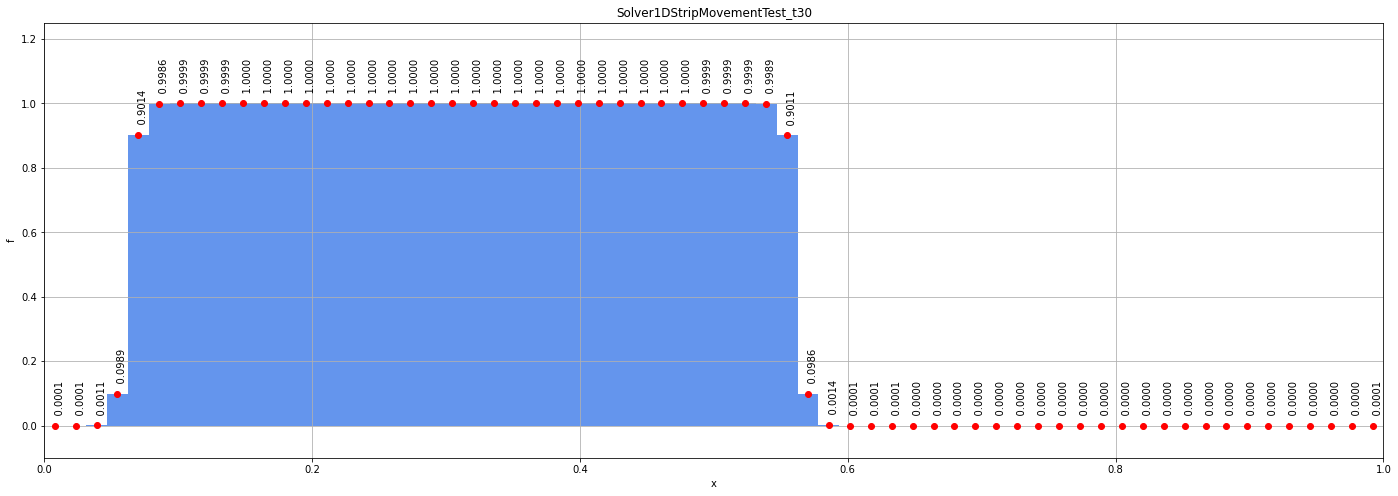

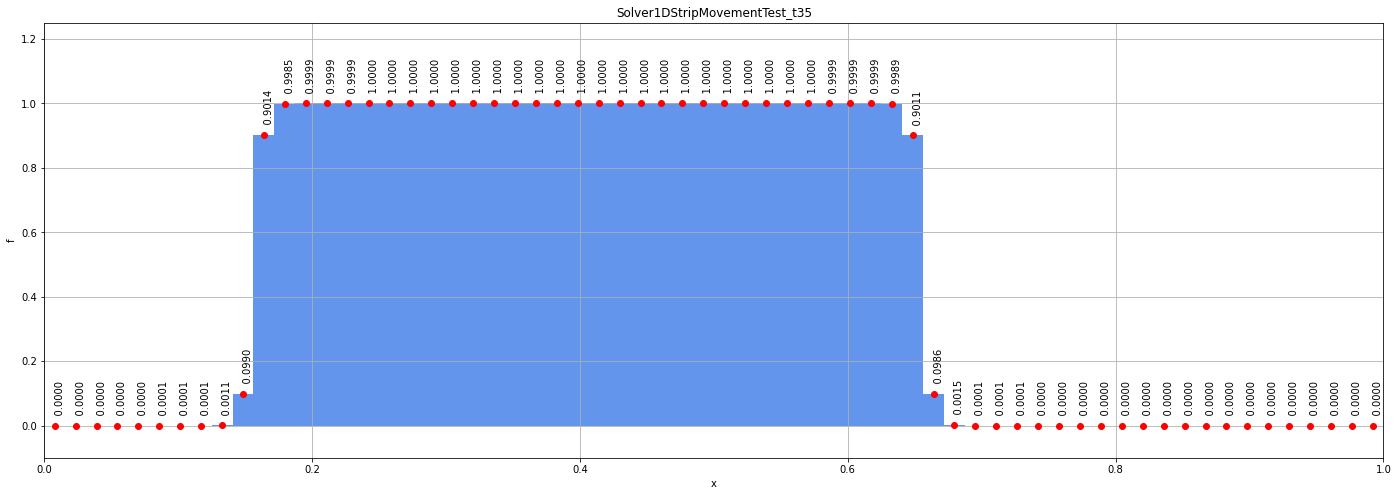

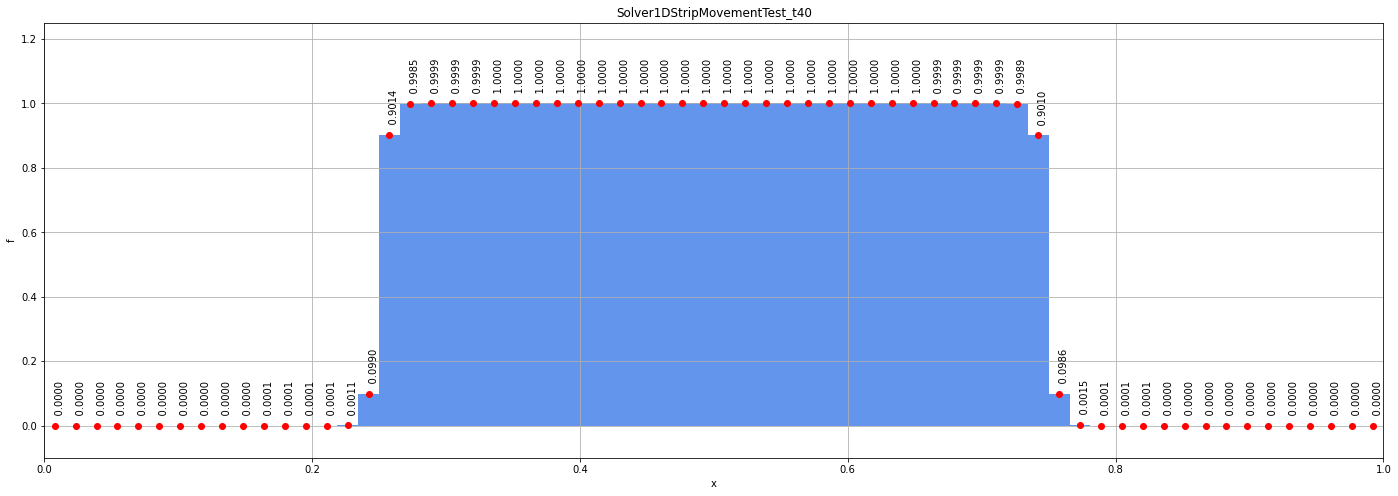

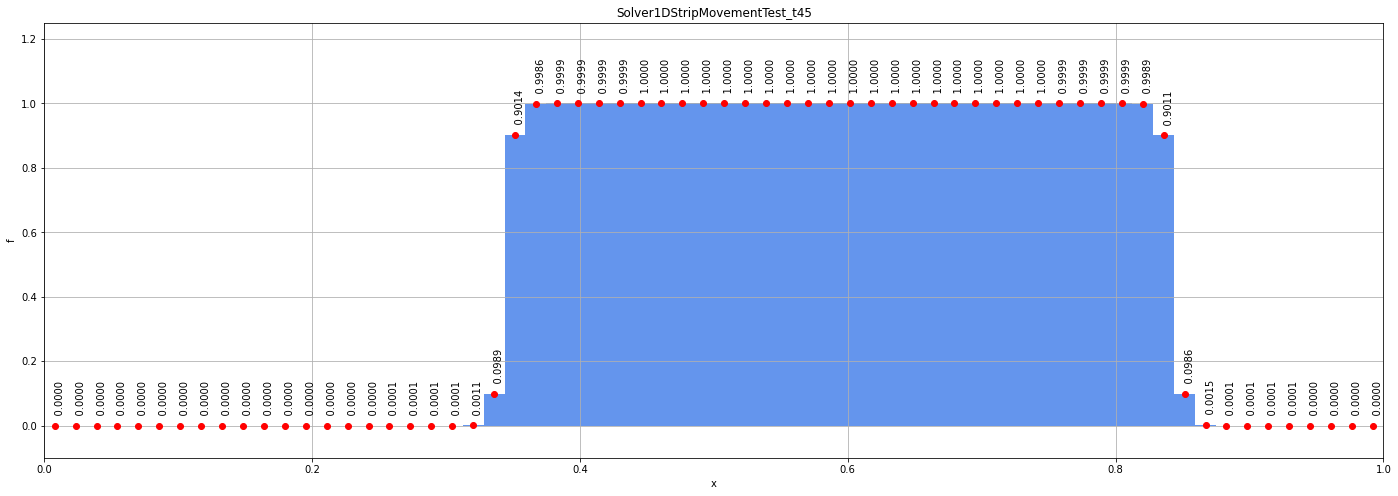

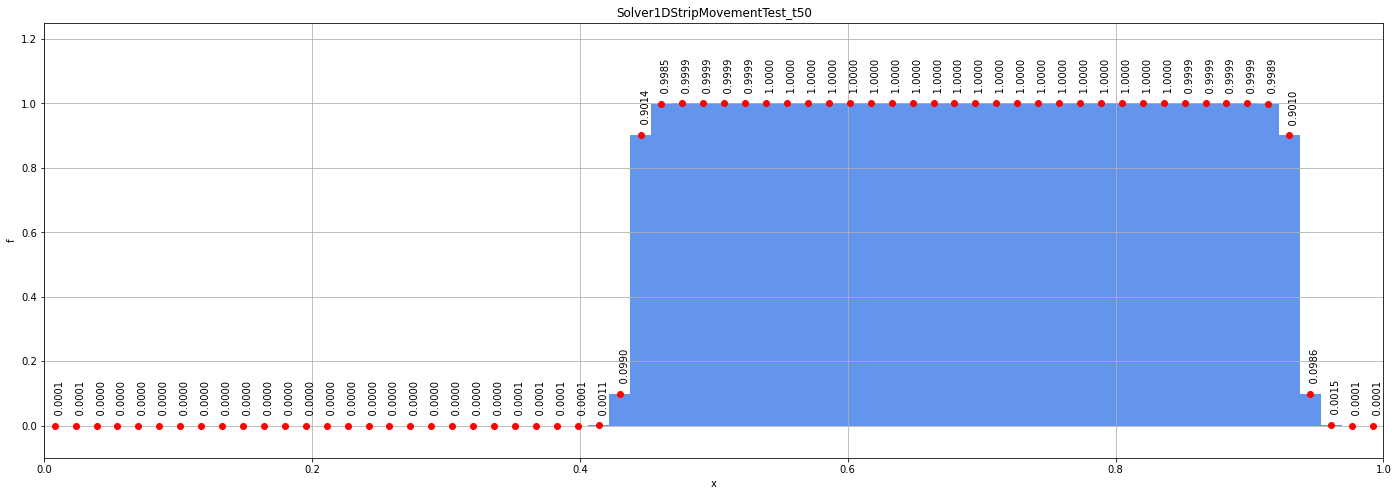

MovieWriter PillowWriter unavailable; using Pillow instead.


Animation time:  9.375
Animation real time step:  0.375
Animation fps:  2.6666666666666665


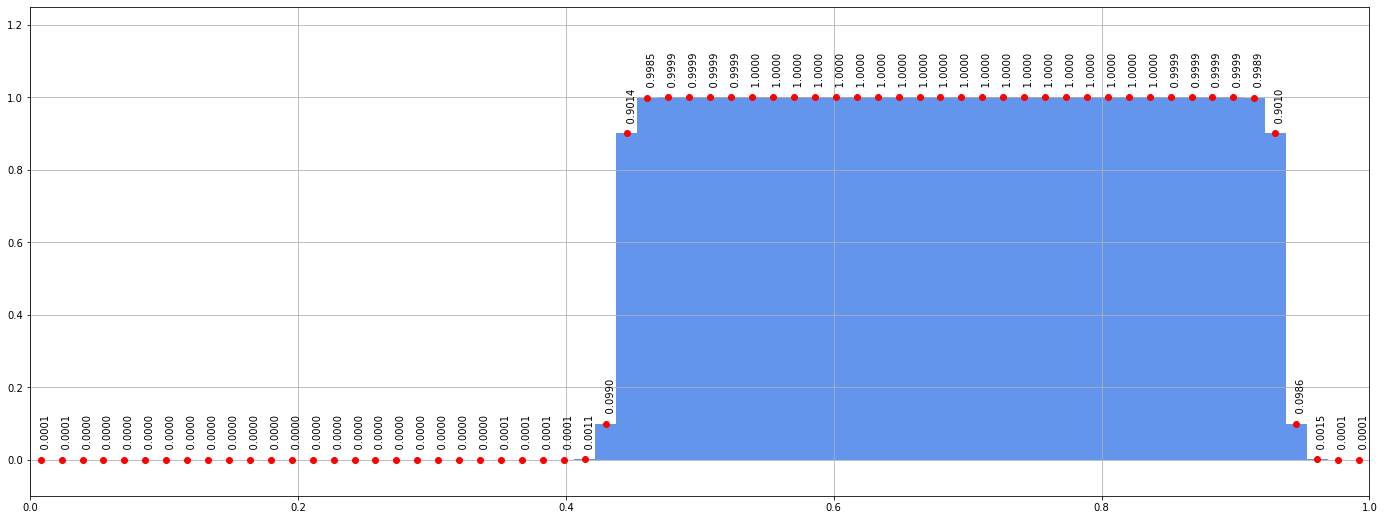

In [3]:
TE1DTestVisualization(TE1DCalcRes, TE1DPlotRes, "Solver1DStripMovementTest", "area_64_t_200.txt", 5, 2, True)

## Solver1DStripBackMovementTest

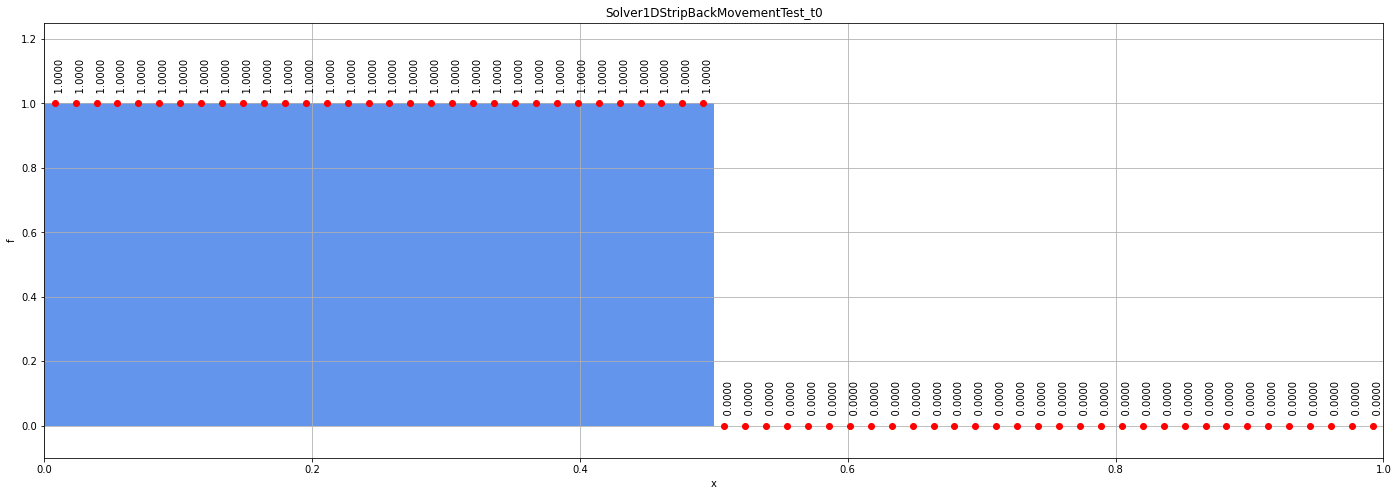

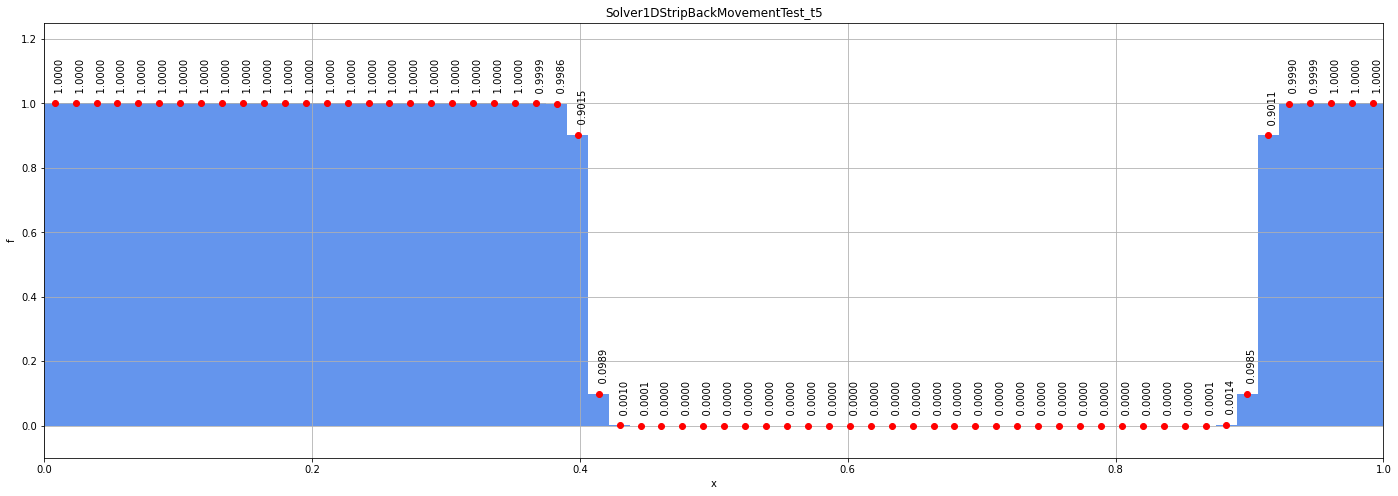

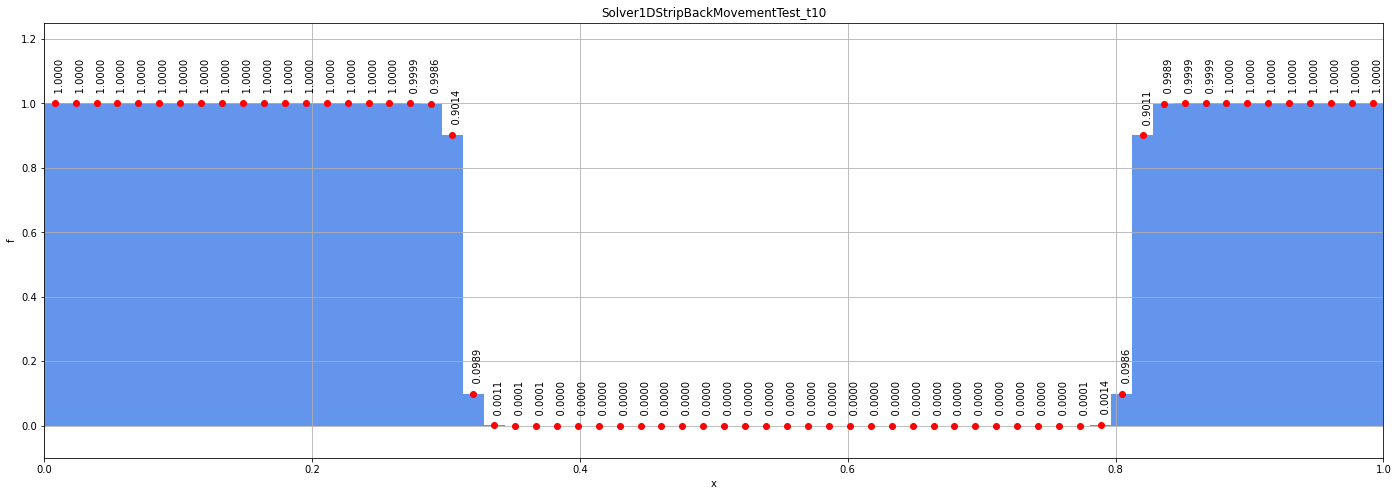

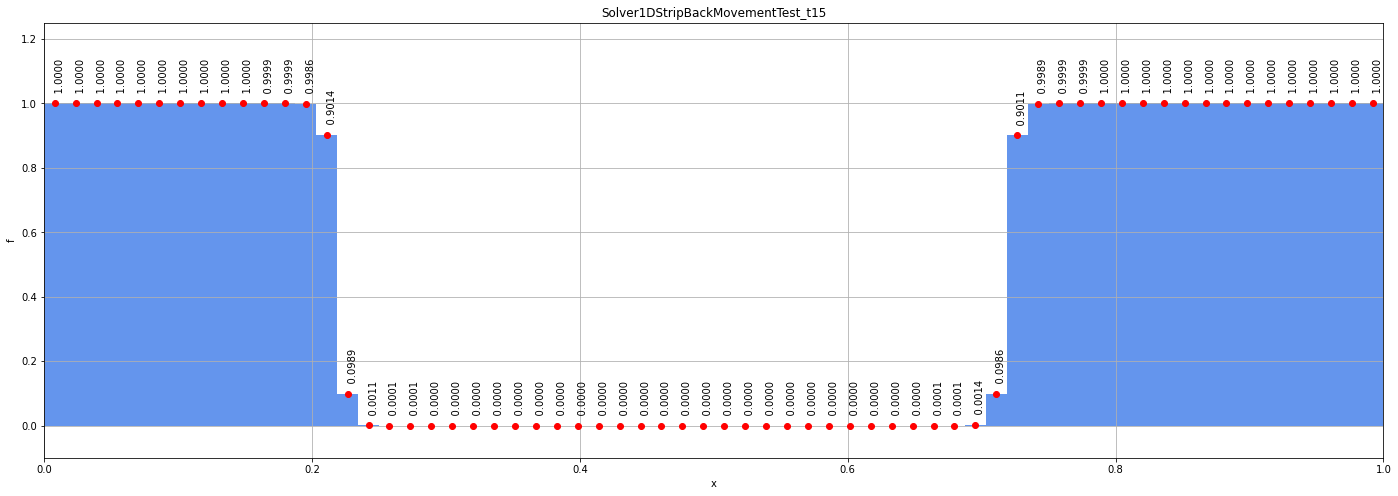

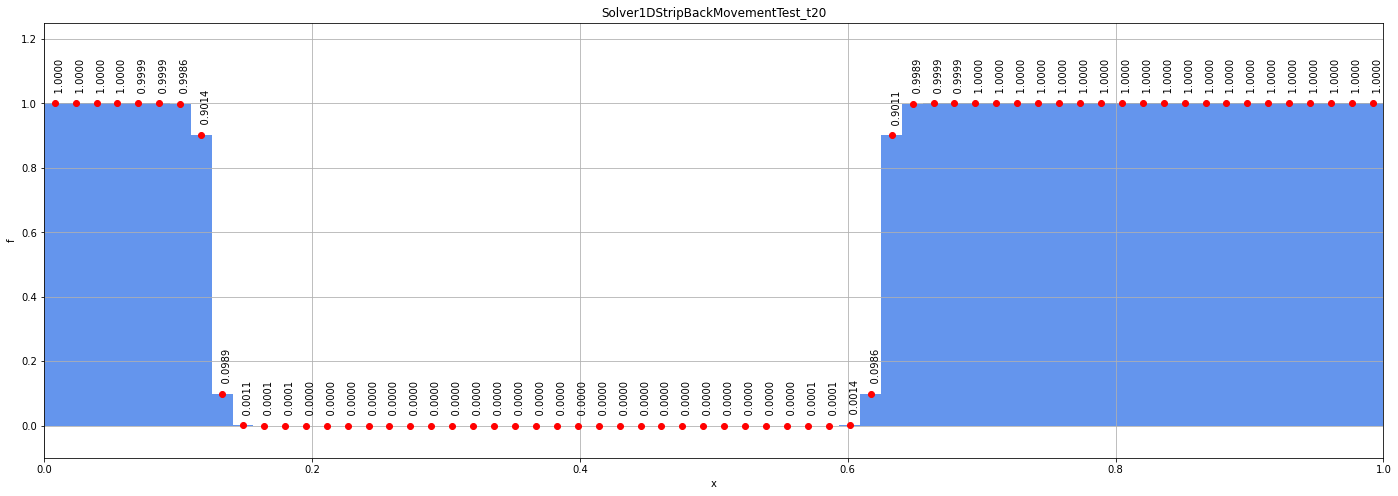

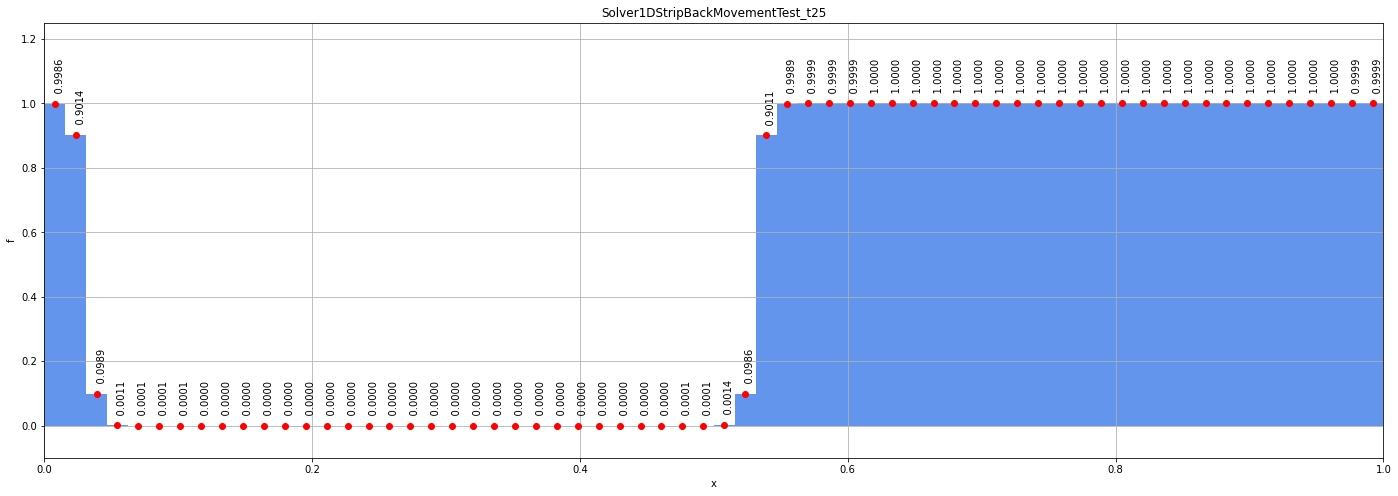

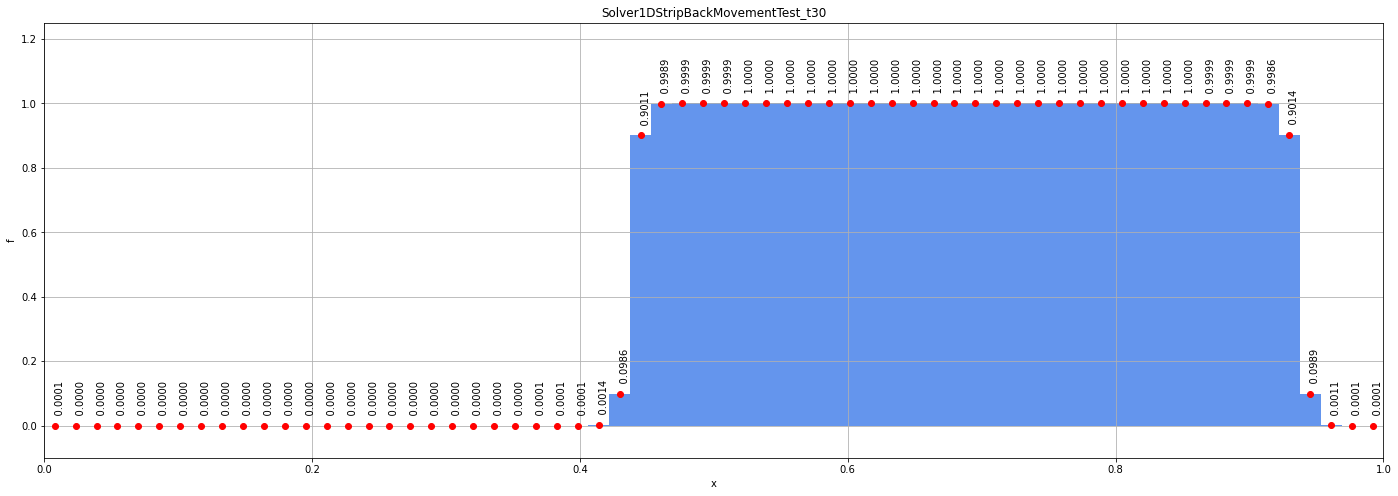

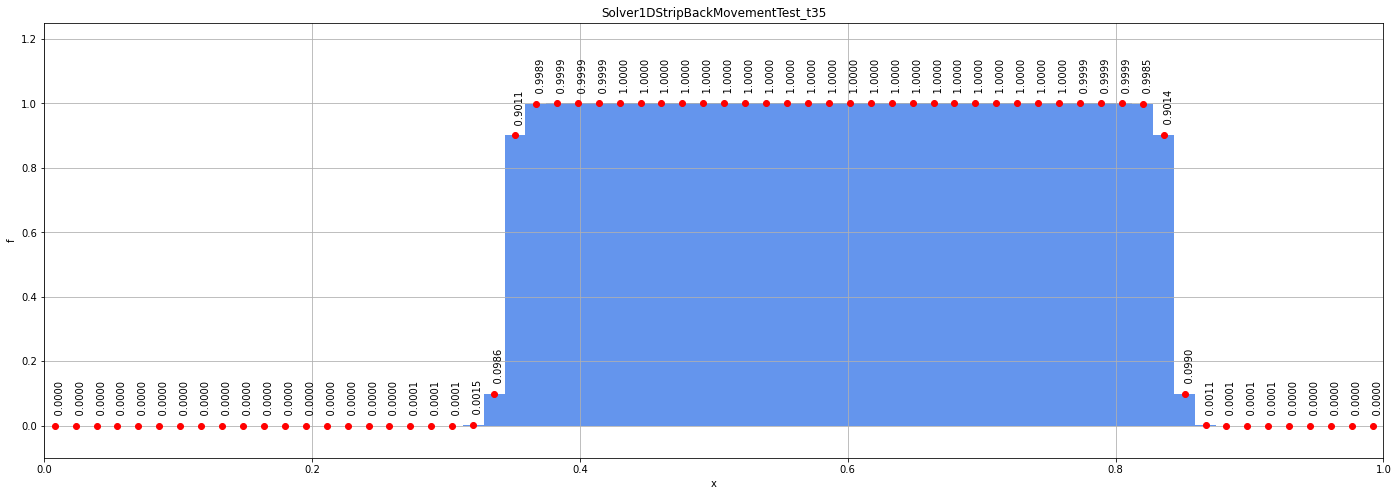

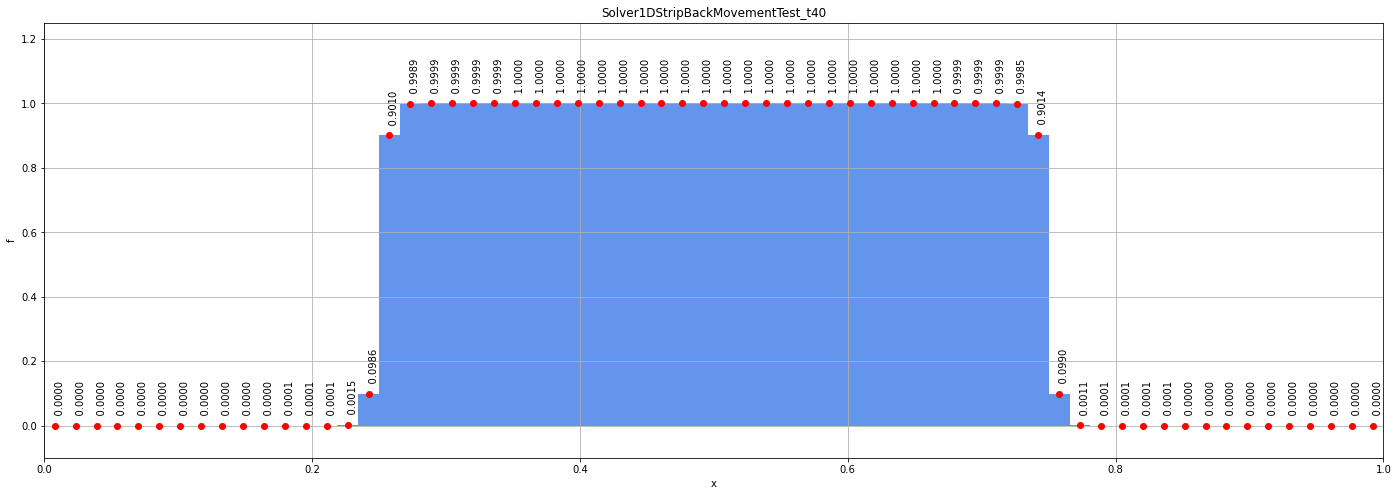

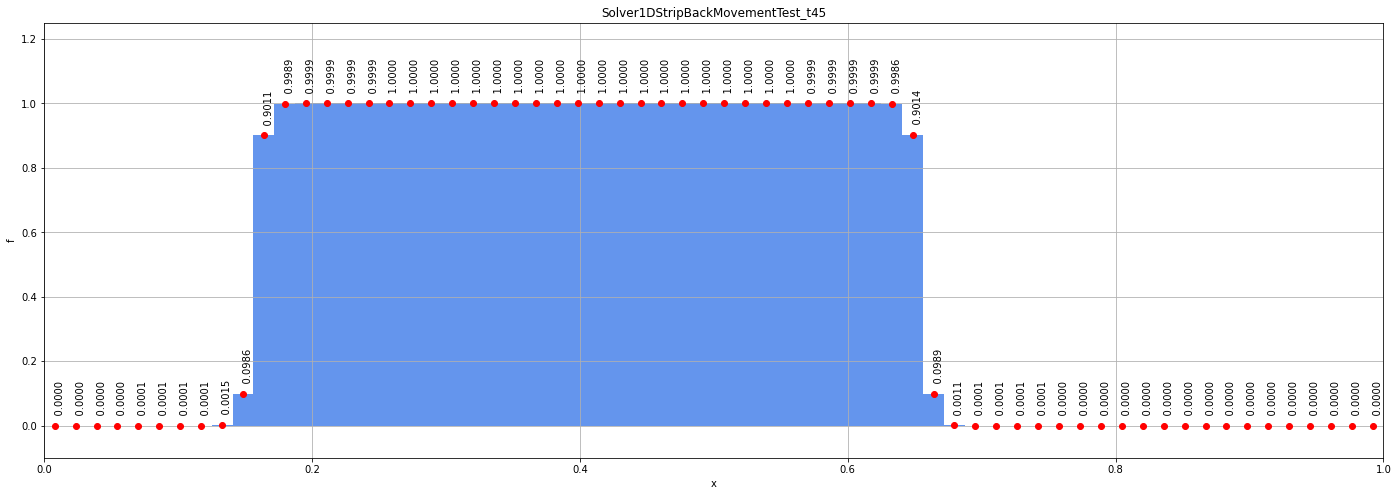

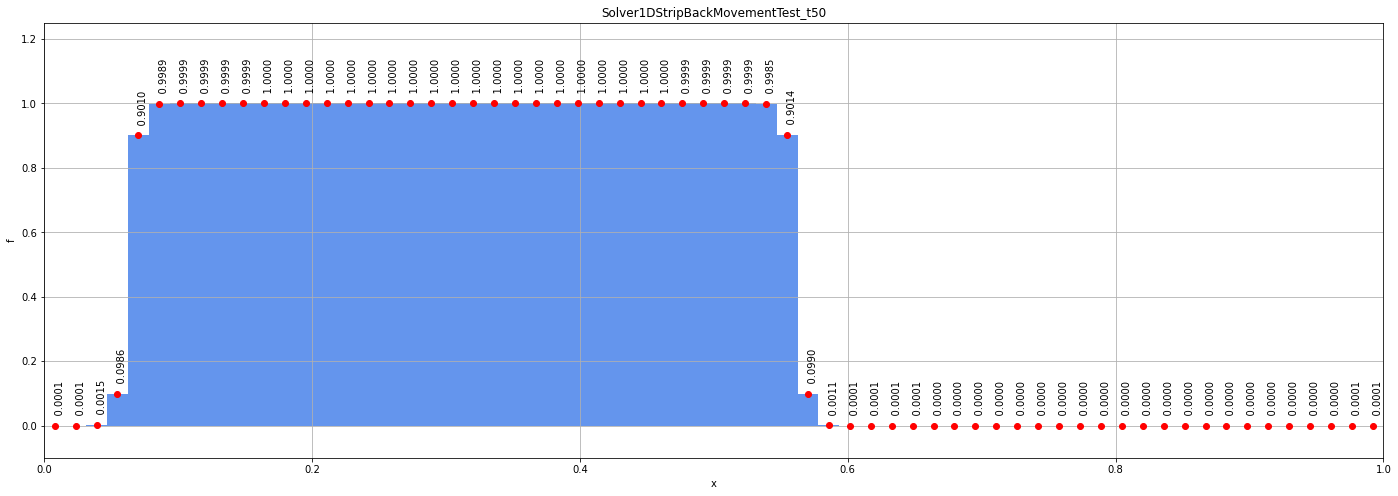

MovieWriter PillowWriter unavailable; using Pillow instead.


Animation time:  9.375
Animation real time step:  0.375
Animation fps:  2.6666666666666665


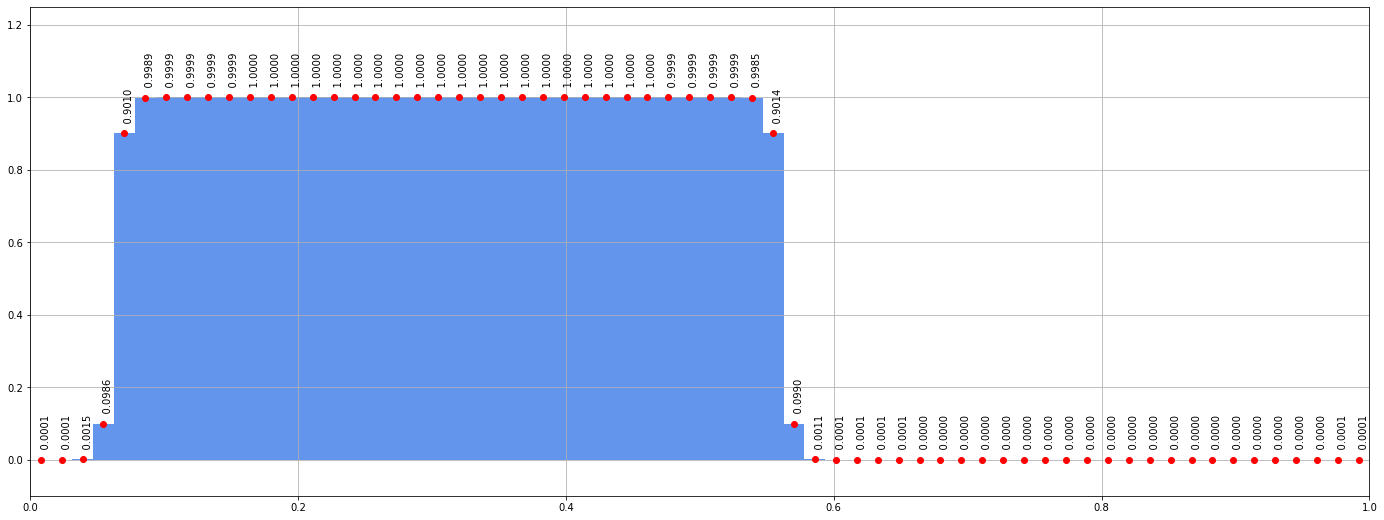

In [4]:
TE1DTestVisualization(TE1DCalcRes, TE1DPlotRes, "Solver1DStripBackMovementTest", "area_64_t_200.txt", 5, 2, True)

## Solver1DJRStripMovementTest

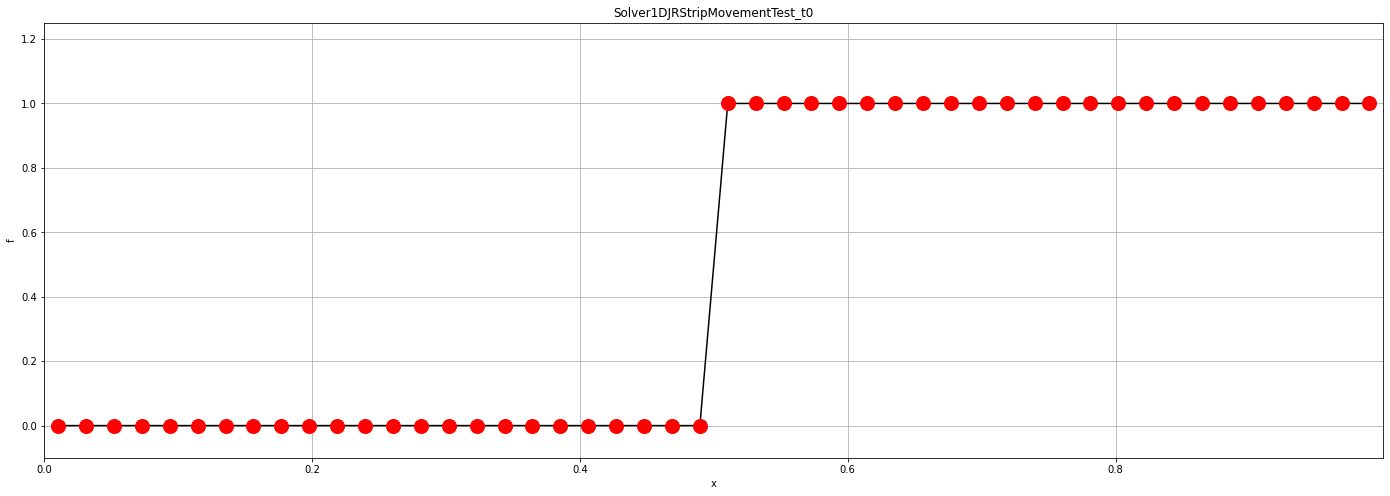

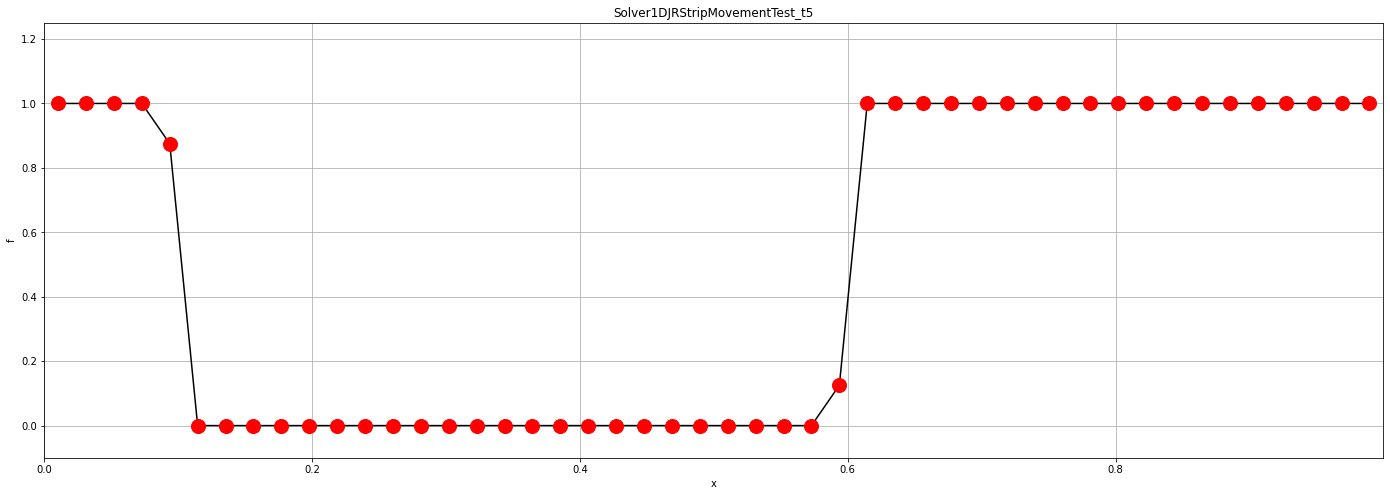

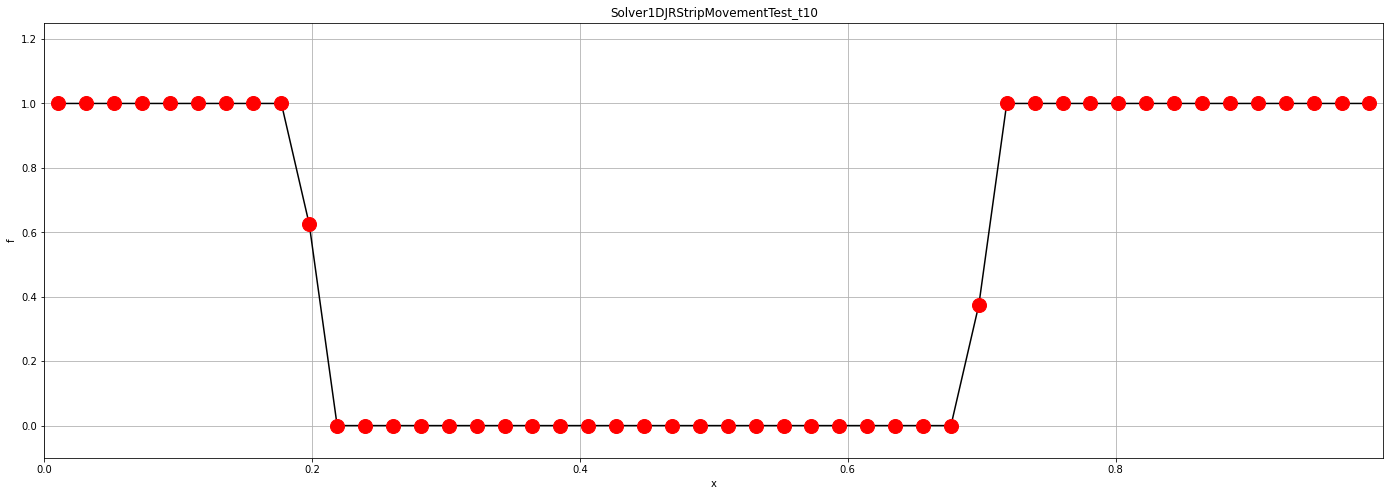

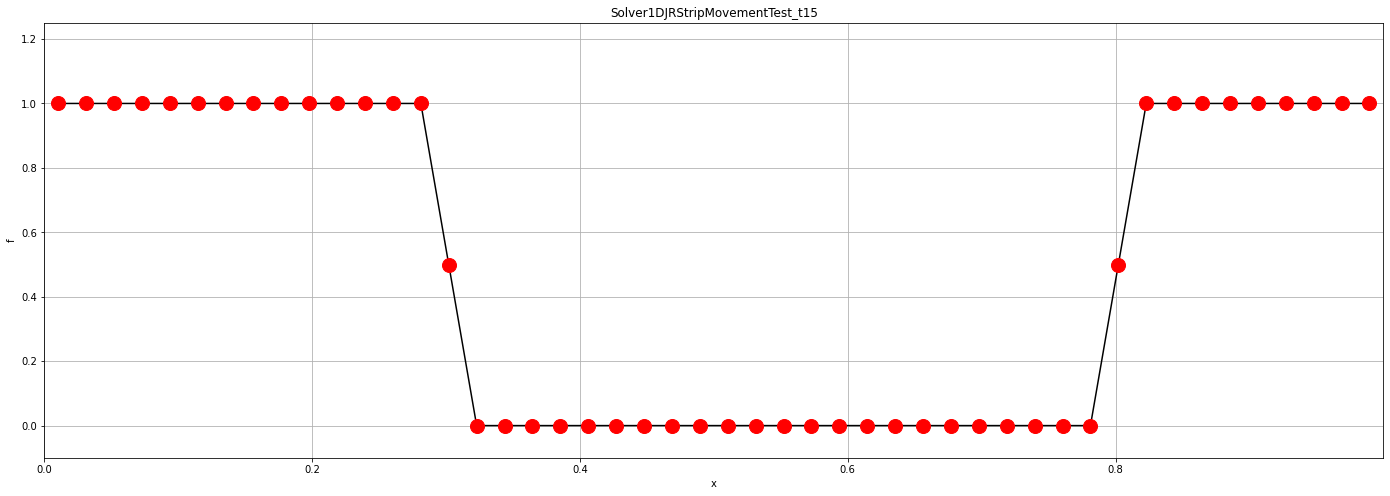

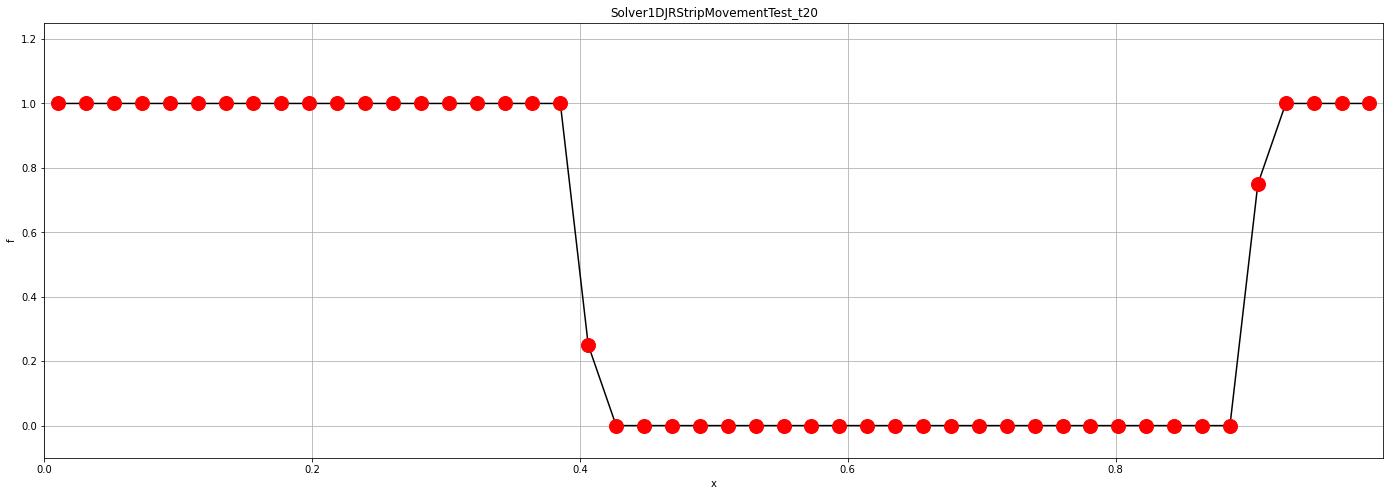

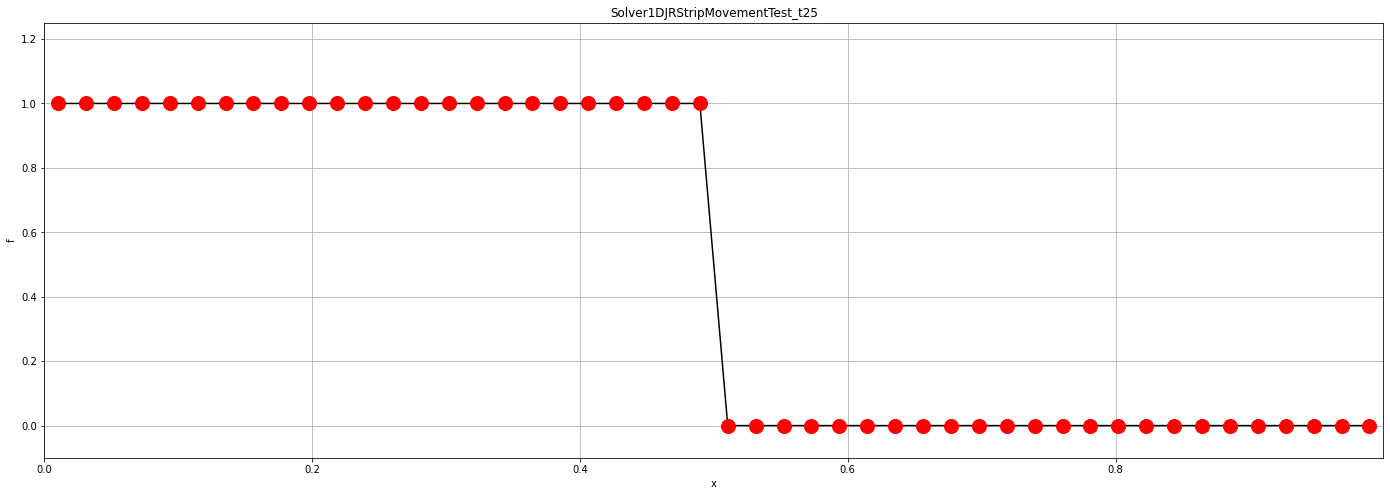

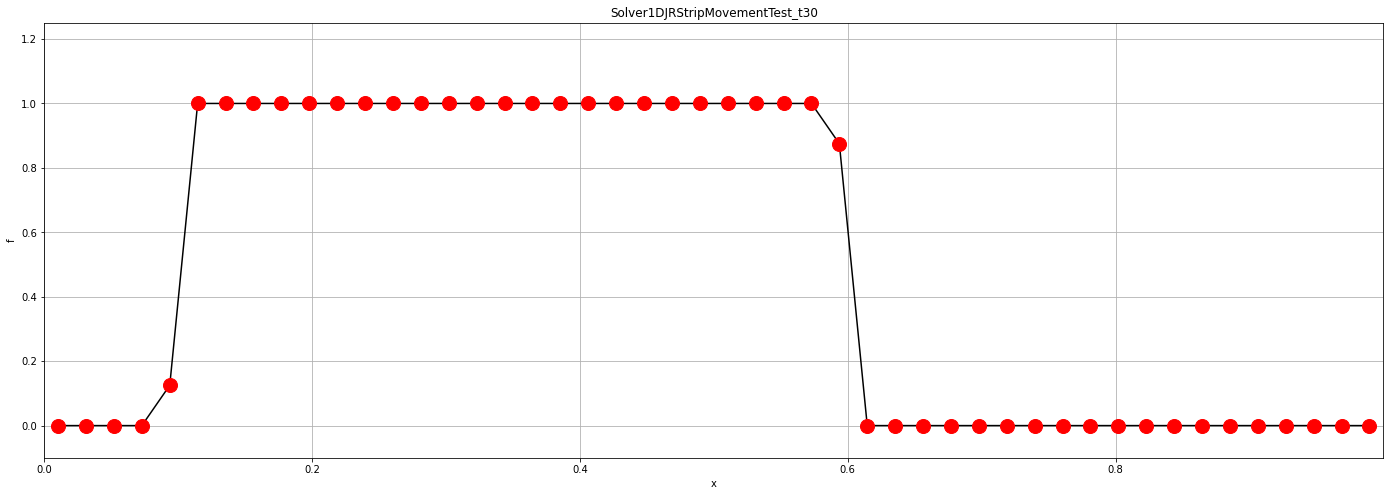

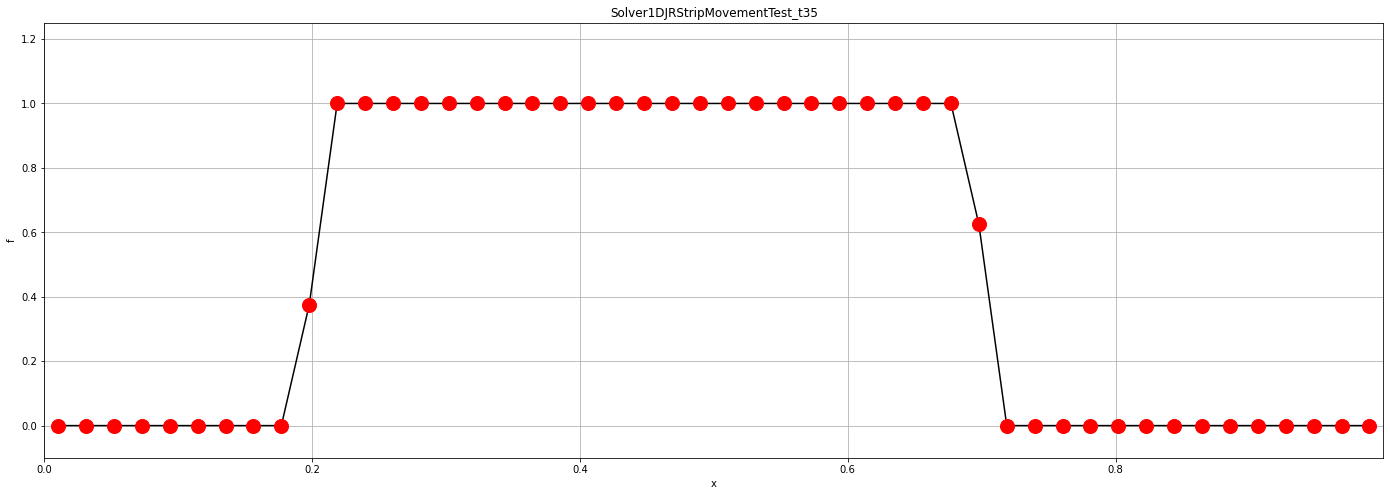

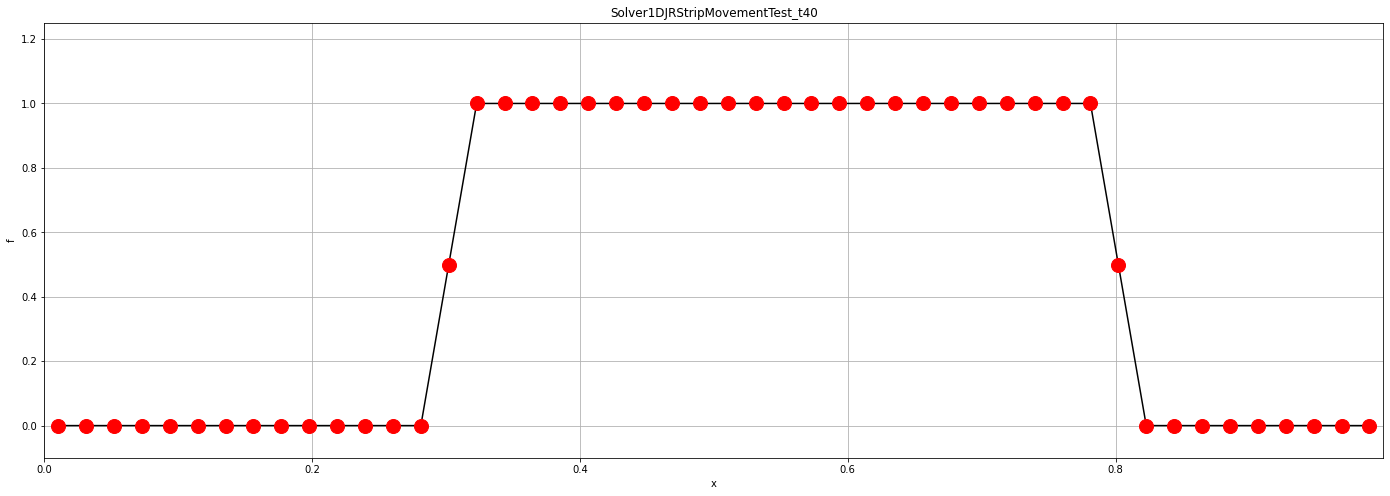

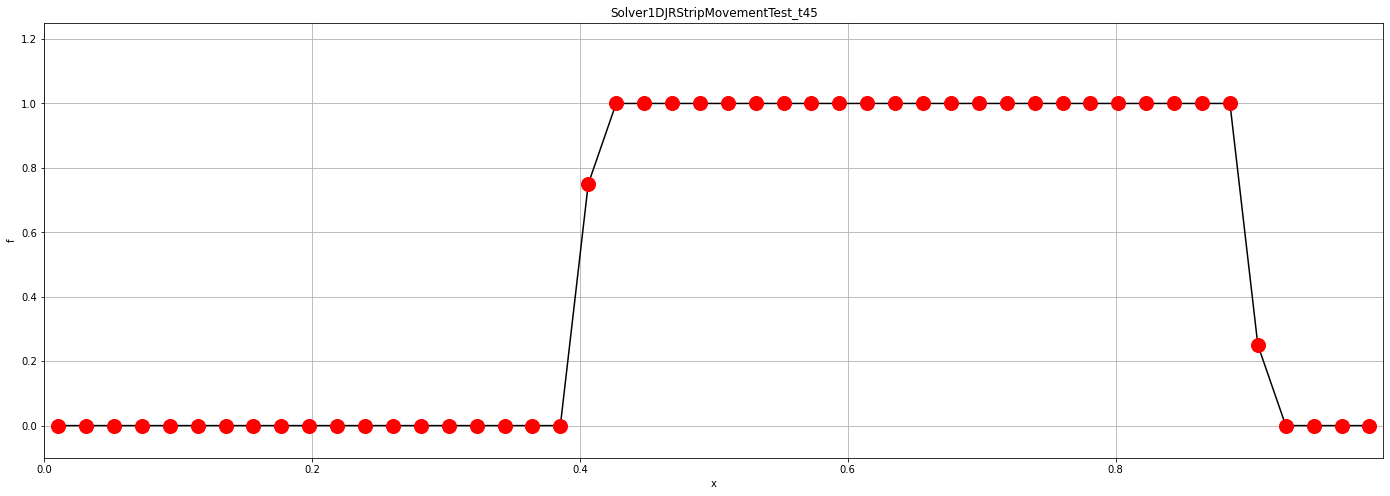

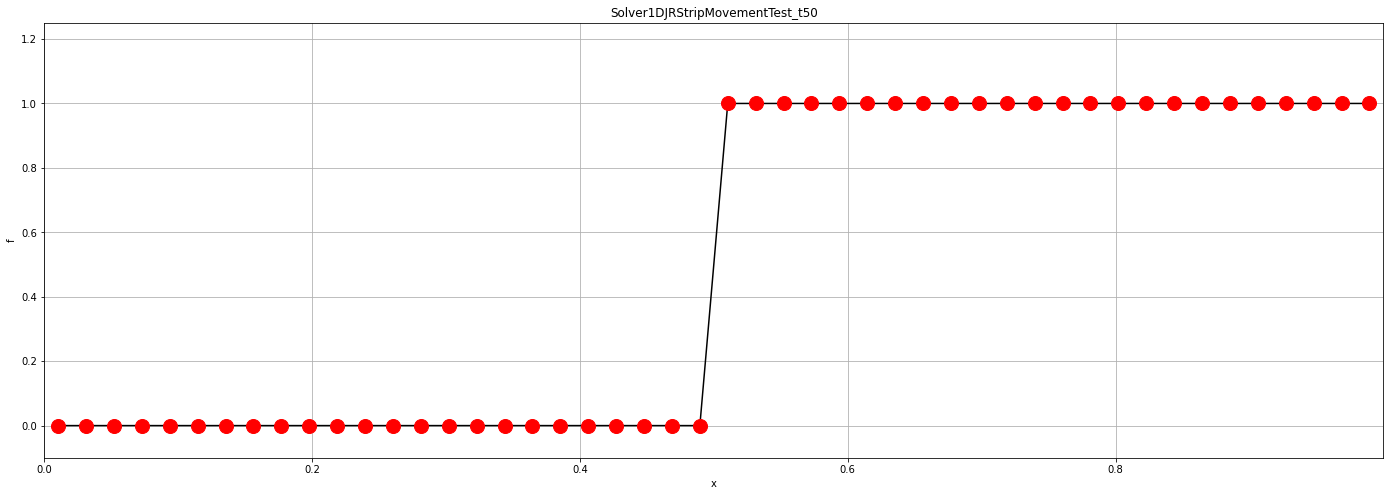

MovieWriter PillowWriter unavailable; using Pillow instead.


Animation time:  10.0000128
Animation real time step:  0.40000051200000003
Animation fps:  2.4999968000040957


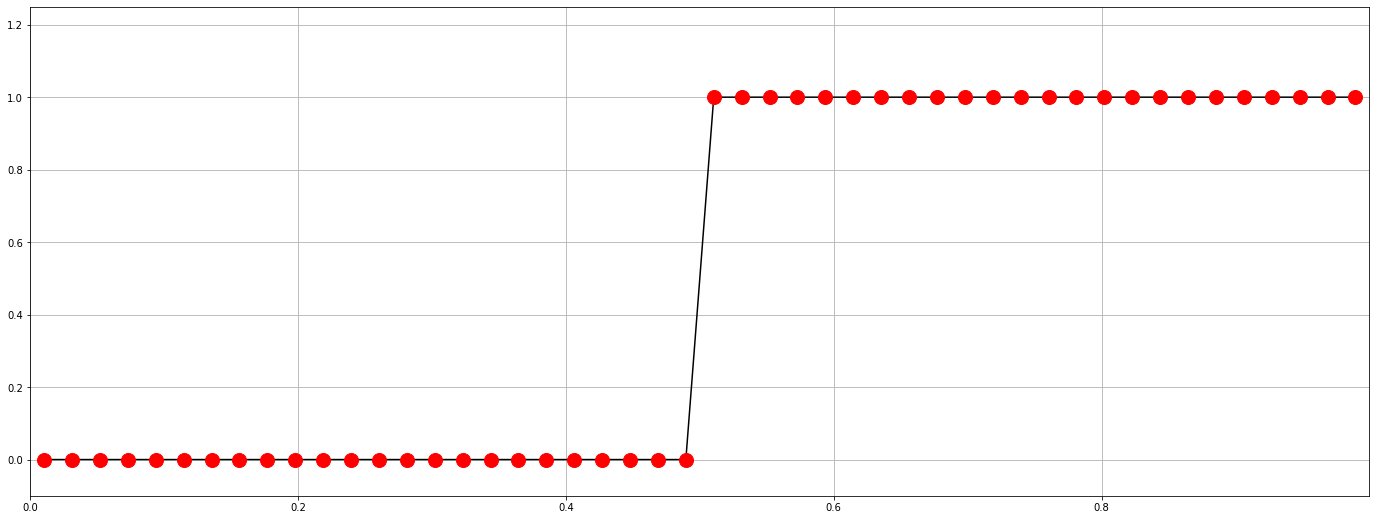

In [12]:
TE1DTestVisualization(TE1DCalcRes, TE1DPlotRes, "Solver1DJRStripMovementTest", "area_48_t_384.txt", 5, 2, True)

## StripSinMoveTest

In [6]:
title = "StripSinMoveTest"
calcResPath = downDir(Calculation1DResultsPath, title)
plotOutPath = downDir(Plot1DOutputPath, title)

NameError: name 'Calculation1DResultsPath' is not defined

### Считывание значений

In [ ]:
cellCount, dx, NTimeSteps, realNTimeSteps, dt, frames = read1DMinimalOutput(downDir(calcResPath, "area_64_t_200.txt"))

### Построение графиков и анимации

#### Построение графиков

In [ ]:
for t in range(0, len(frames), 10):
    plotArea1D(cellCount, dx, frames[t], title+"_t"+str(t))

#### Построение анимации

In [ ]:
animation1D(cellCount, dx, NTimeSteps, realNTimeSteps, dt, frames, 2, title)

## Solver1Dtests

In [3]:
title = "Solver1Dtests"
calcResPath = downDir(TE1DCalcRes, title)
plotOutPath = downDir(TE1DPlotRes, title)

### Считывание финальных положений

In [4]:
CalculationResultsSubcats = [filename(subdir) for subdir in listSubdirs(calcResPath)]
print(CalculationResultsSubcats)
exact = "exact"

['THINC_MUSCL', 'Godunov', 'MUSCL', 'THINC_Godunov']


In [5]:
import re

solutions = {}
solutions[exact] = {}
meshes = {}
periodsT = []

for directory in listSubdirs(calcResPath):
    method = filename(directory)
    solutions[method] = {}
    for entry in os.listdir(directory):
        if "gitignore" in entry:
            continue
        
        cellCount, dx, NTimeSteps, realNTimeSteps, dt, frames = read1DMinimalOutput(downDir(directory,entry))
        
        parsedEntry = re.findall(r'\d+', entry)
        N = cellCount
        T = int(parsedEntry[1])
        
        if not (N in meshes):
            meshes[N] = dx
        if not (T in periodsT):
            periodsT.append(T)
        
        if not (N in solutions[method]):
            solutions[method][N] = {}
            
        solutions[method][N][T] = frames[-1]
        
        if (not (N in solutions[exact])) and T==1:
            solutions[exact][N] = frames[0]

meshesN = sorted(meshes.keys())


##### Были получены результаты на сетках:

In [6]:
print(meshes)
print(meshesN)

{768: 0.00130208, 192: 0.00520833, 96: 0.0104167, 384: 0.00260417, 24: 0.0416667, 48: 0.0208333}
[24, 48, 96, 192, 384, 768]


##### И с периодами обращений по исследуемой области:

In [7]:
periodsT

[6, 1, 5, 2, 4, 3]

#### Считывание файла ошибок:

In [12]:
file = open(downDir(calcResPath, "error.txt"), "r")

errors = {}

for k, method in enumerate(CalculationResultsSubcats):
    errors[method]={}
    file.readline()
    file.readline()
    file.readline()
    
    for i, N in enumerate(meshesN):
        errors[method][N]={}
        line = file.readline()
        errorLine = [float(val) for val in line.split("\t") if not (("N" in val ) or len(val)<3)]
        for j, T in enumerate(periodsT):
            errors[method][N][T] = errorLine[j]

In [13]:
# TODO print error tables

### Сравнение решений различных схем

In [14]:
lineStyles = {}
colorPallete = ["r-", "b-", "g-", "c-", "m-"];
for i, method in enumerate(solutions.keys()):
    lineStyles[method] = colorPallete[i]
lineStyles

{'exact': 'r-',
 'THINC_MUSCL': 'b-',
 'Godunov': 'g-',
 'MUSCL': 'c-',
 'THINC_Godunov': 'm-'}

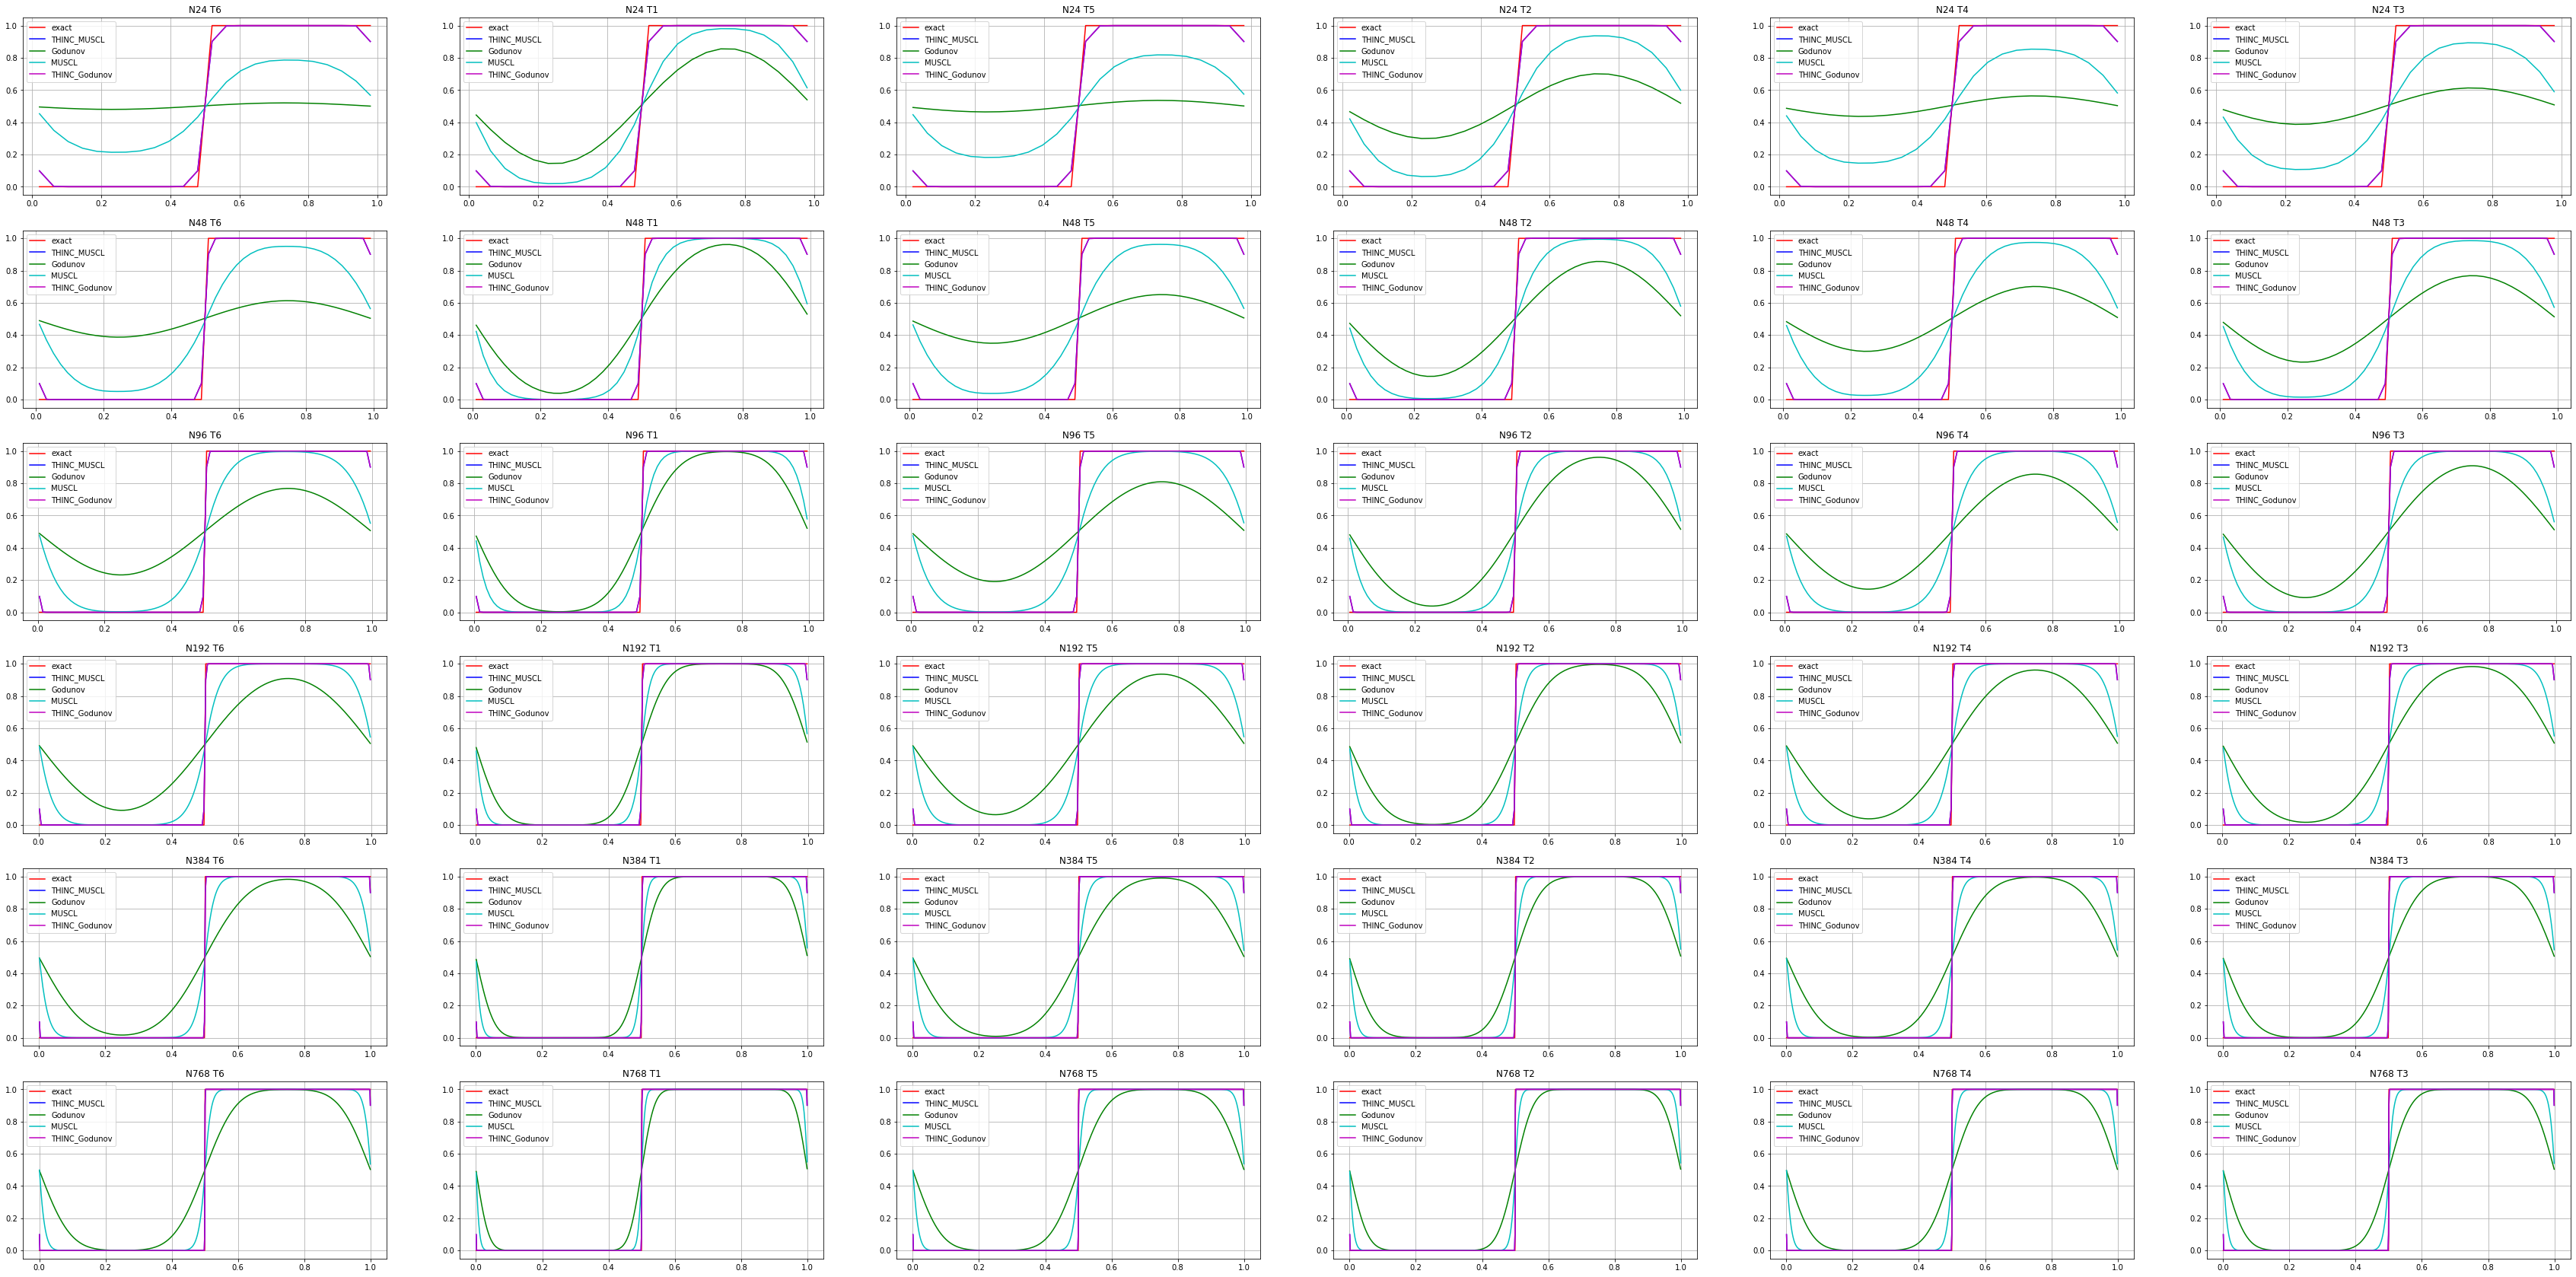

In [15]:
fig, axs = plt.subplots(6, 6, figsize=(60,30))

for iN, N in enumerate(meshesN):
    for iT, T in enumerate(periodsT):
        dx = meshes[N]
        x = xCells(N, dx)
        for method in solutions.keys():
            if method == exact:
                y = solutions[method][N]
            else:
                y = solutions[method][N][T]
            axs[iN, iT].plot(x, y, lineStyles[method], label=method)
        axs[iN, iT].grid()
        axs[iN, iT].set_title("N"+str(N)+" T"+str(T))
        axs[iN, iT].legend()
#for ax in axs.flat:
    #ax.set(xlabel='x', ylabel='f')
plt.savefig(downDir(plotOutPath,"solutions.png"))



### Сравнение решений на различных сетках для всех периодов и методов 

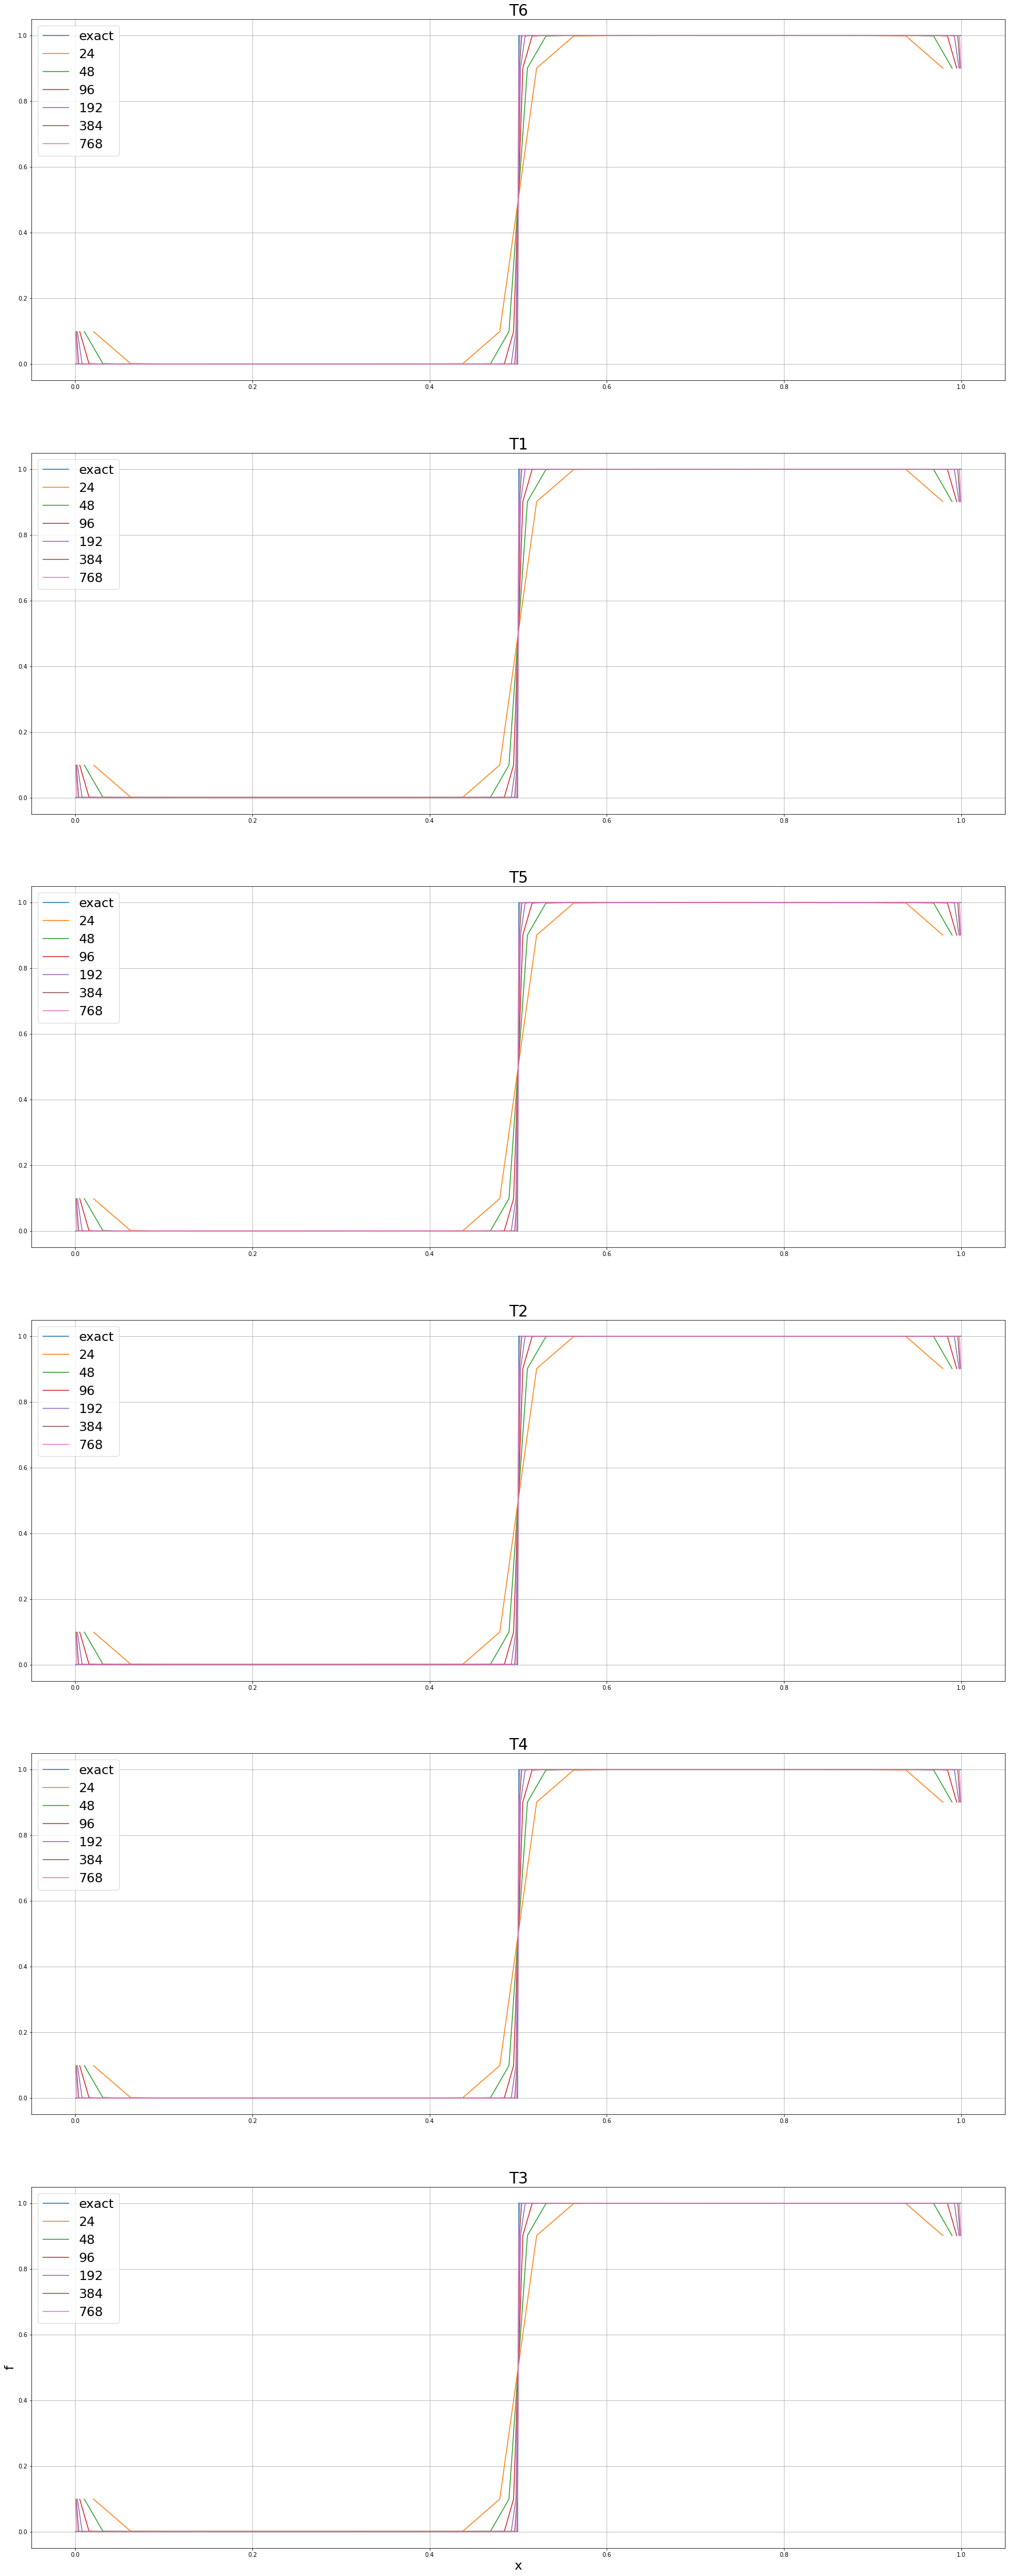

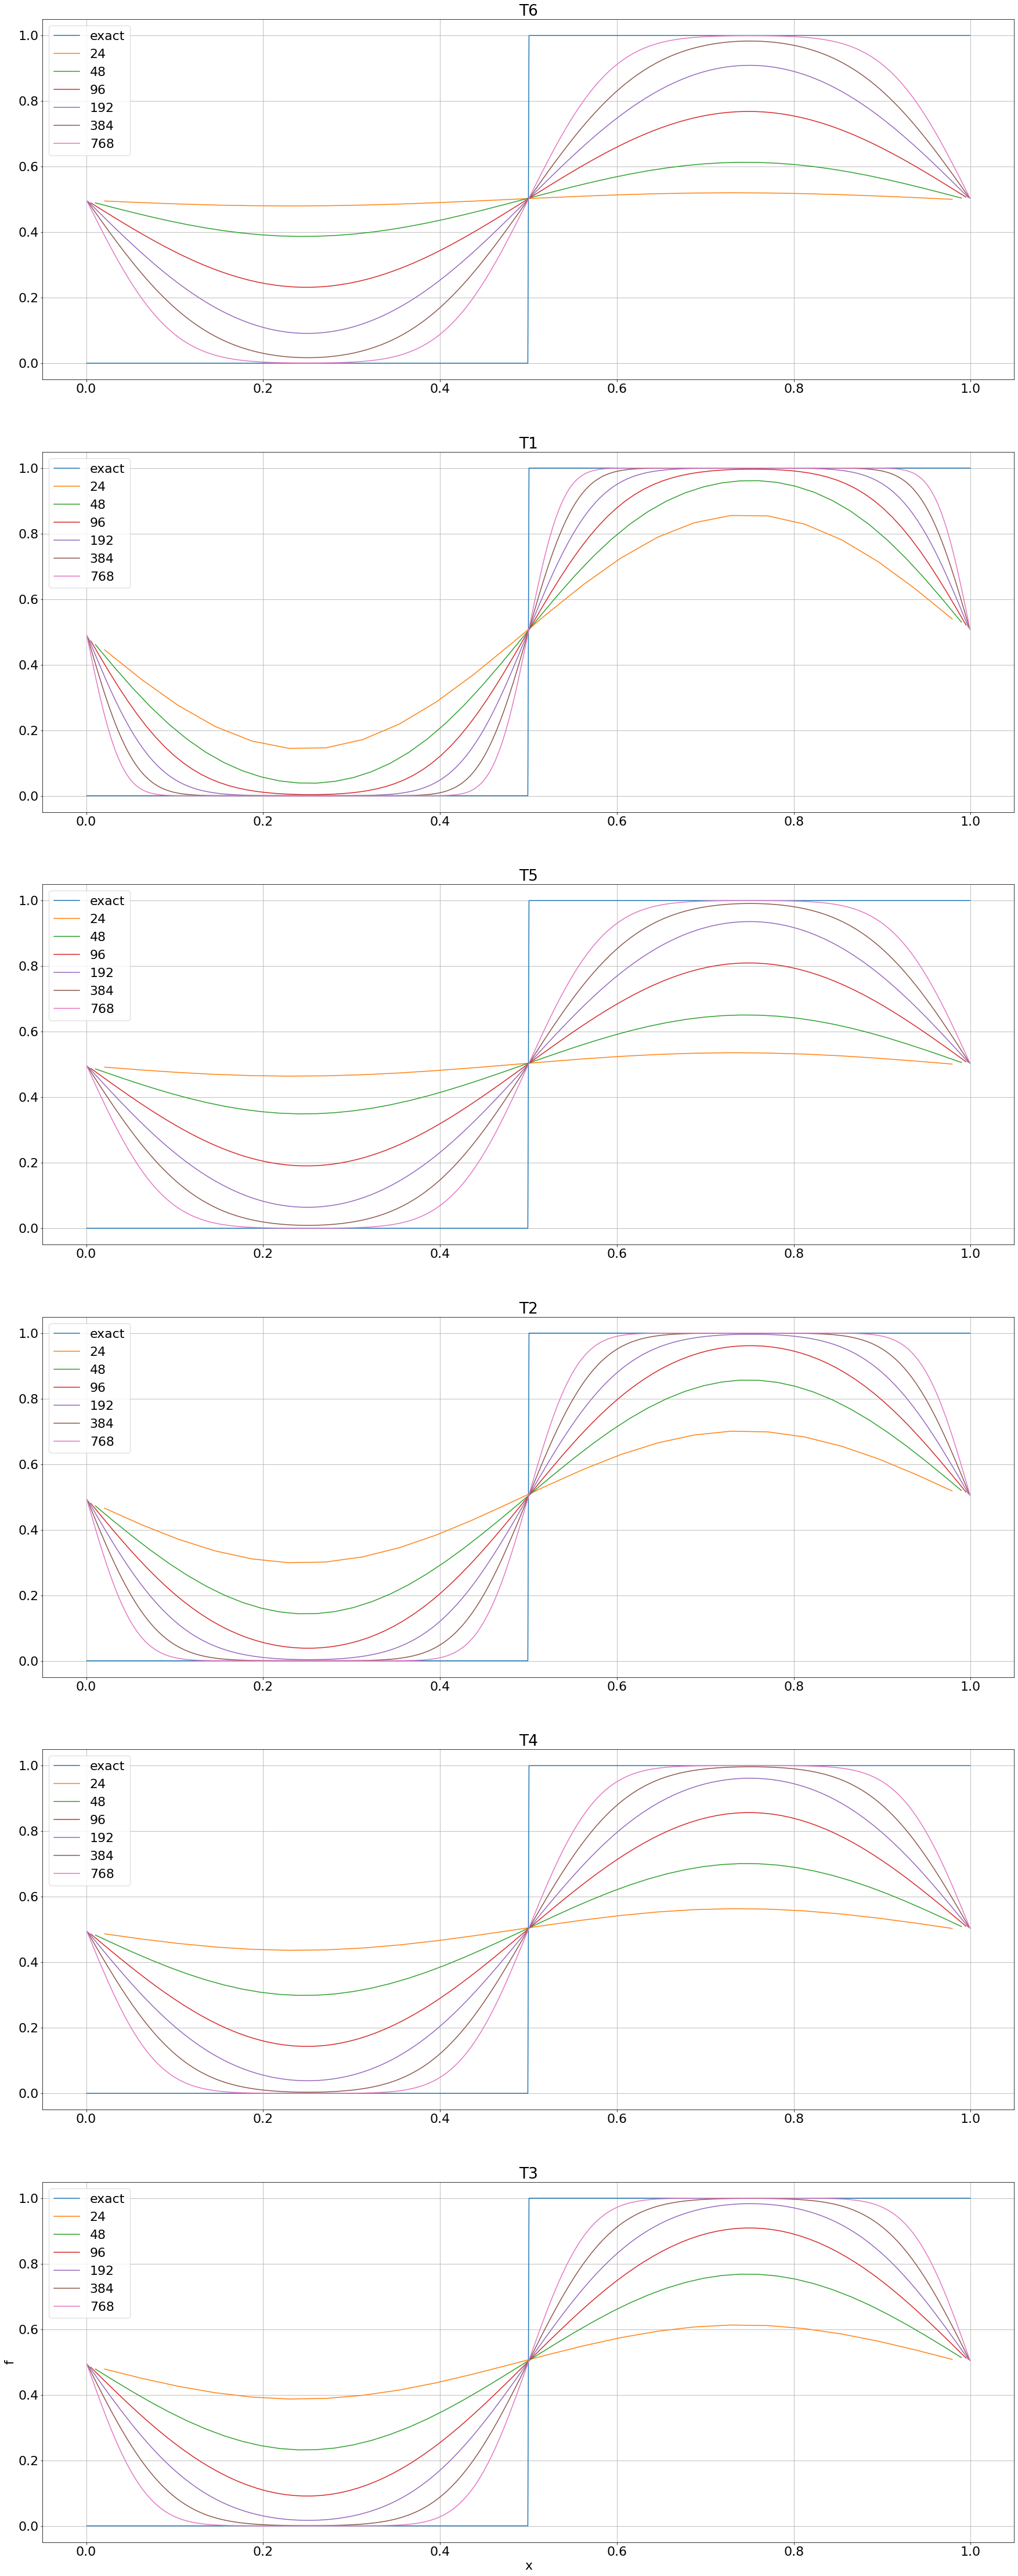

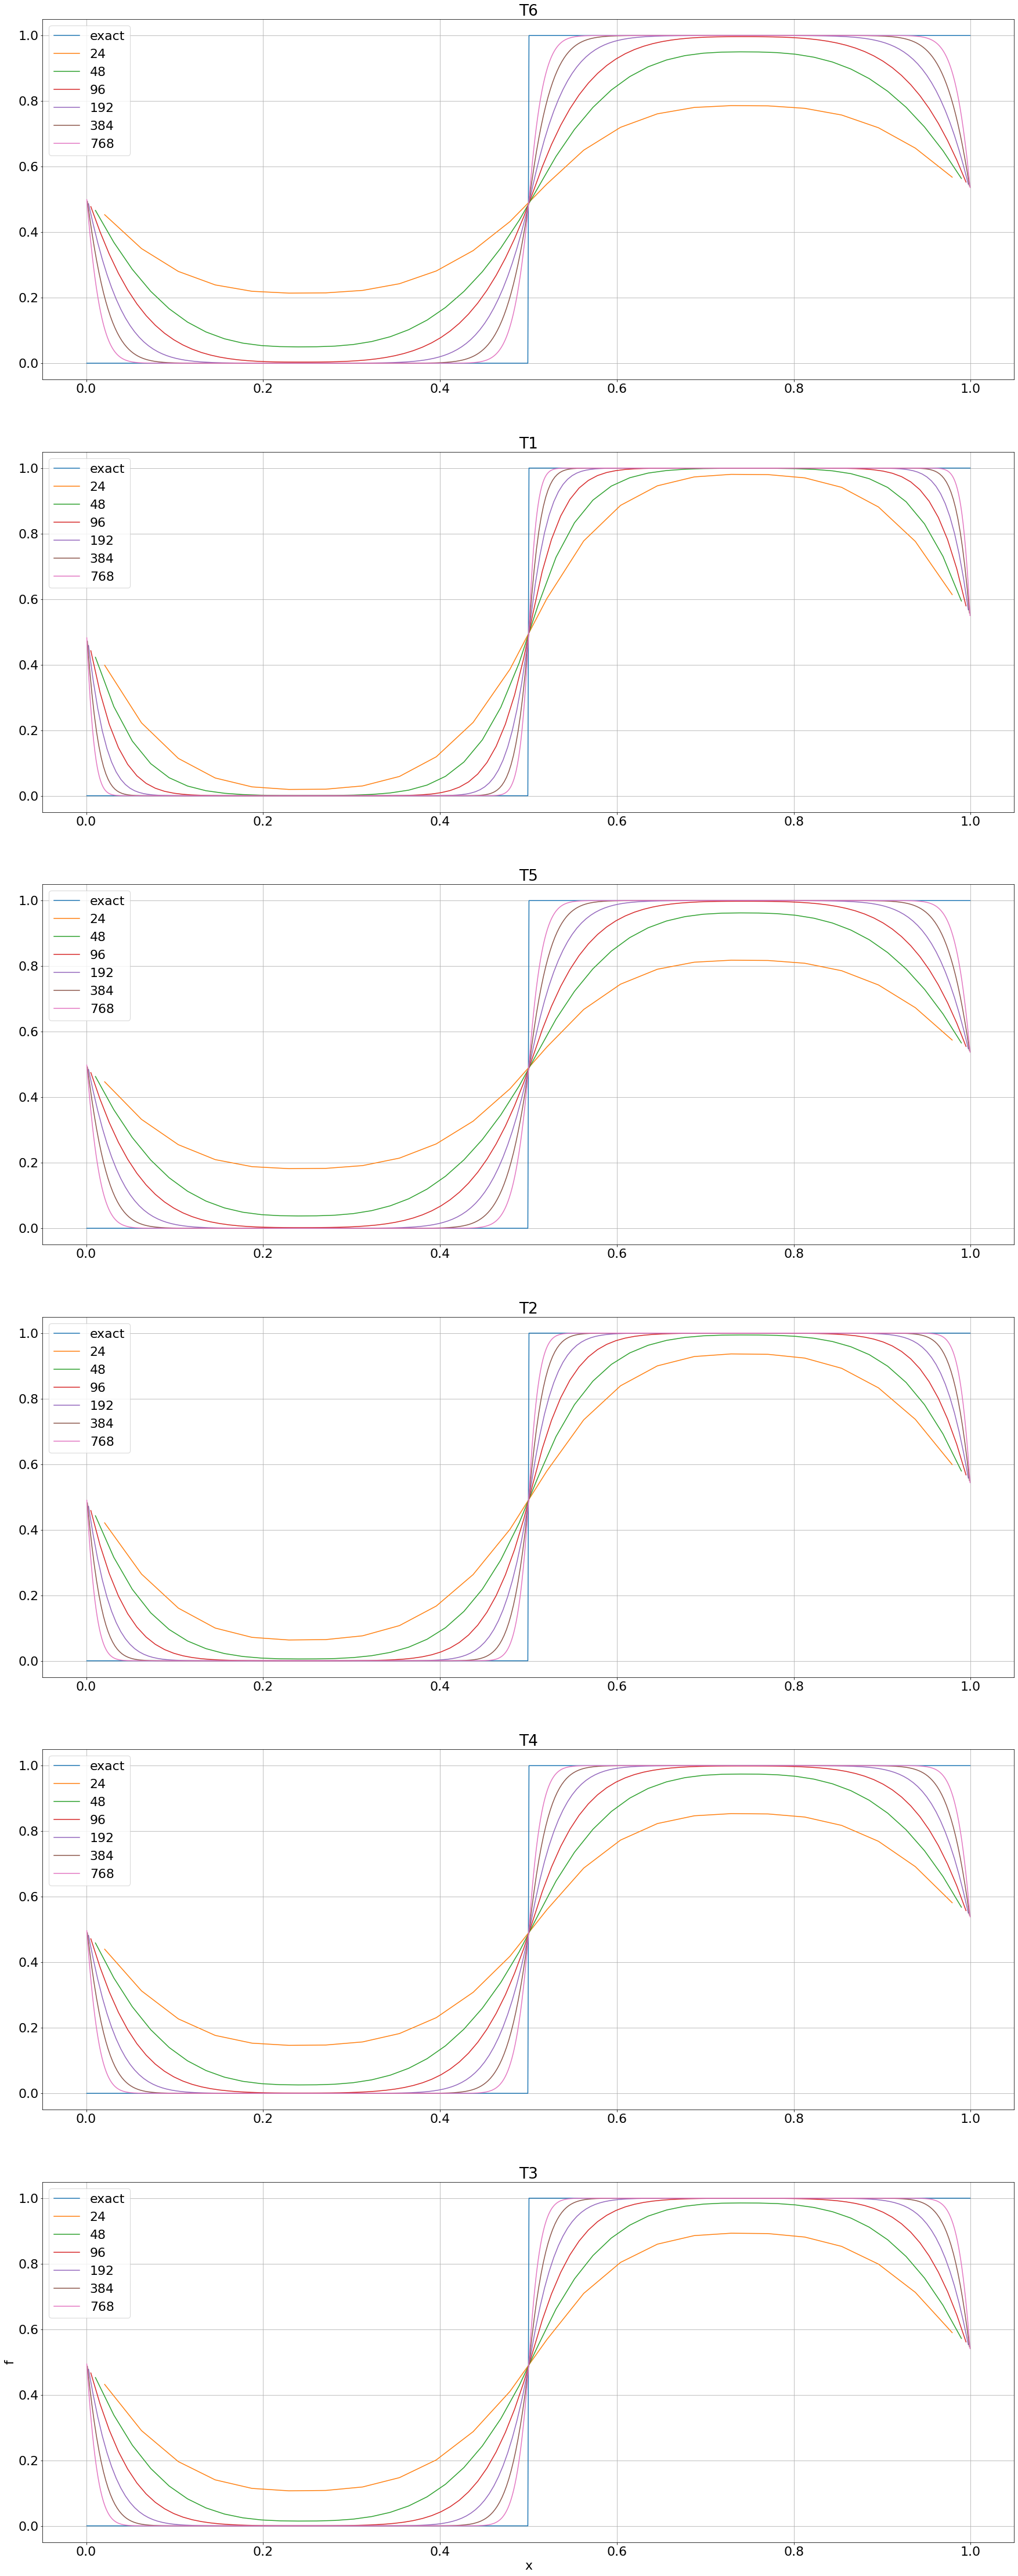

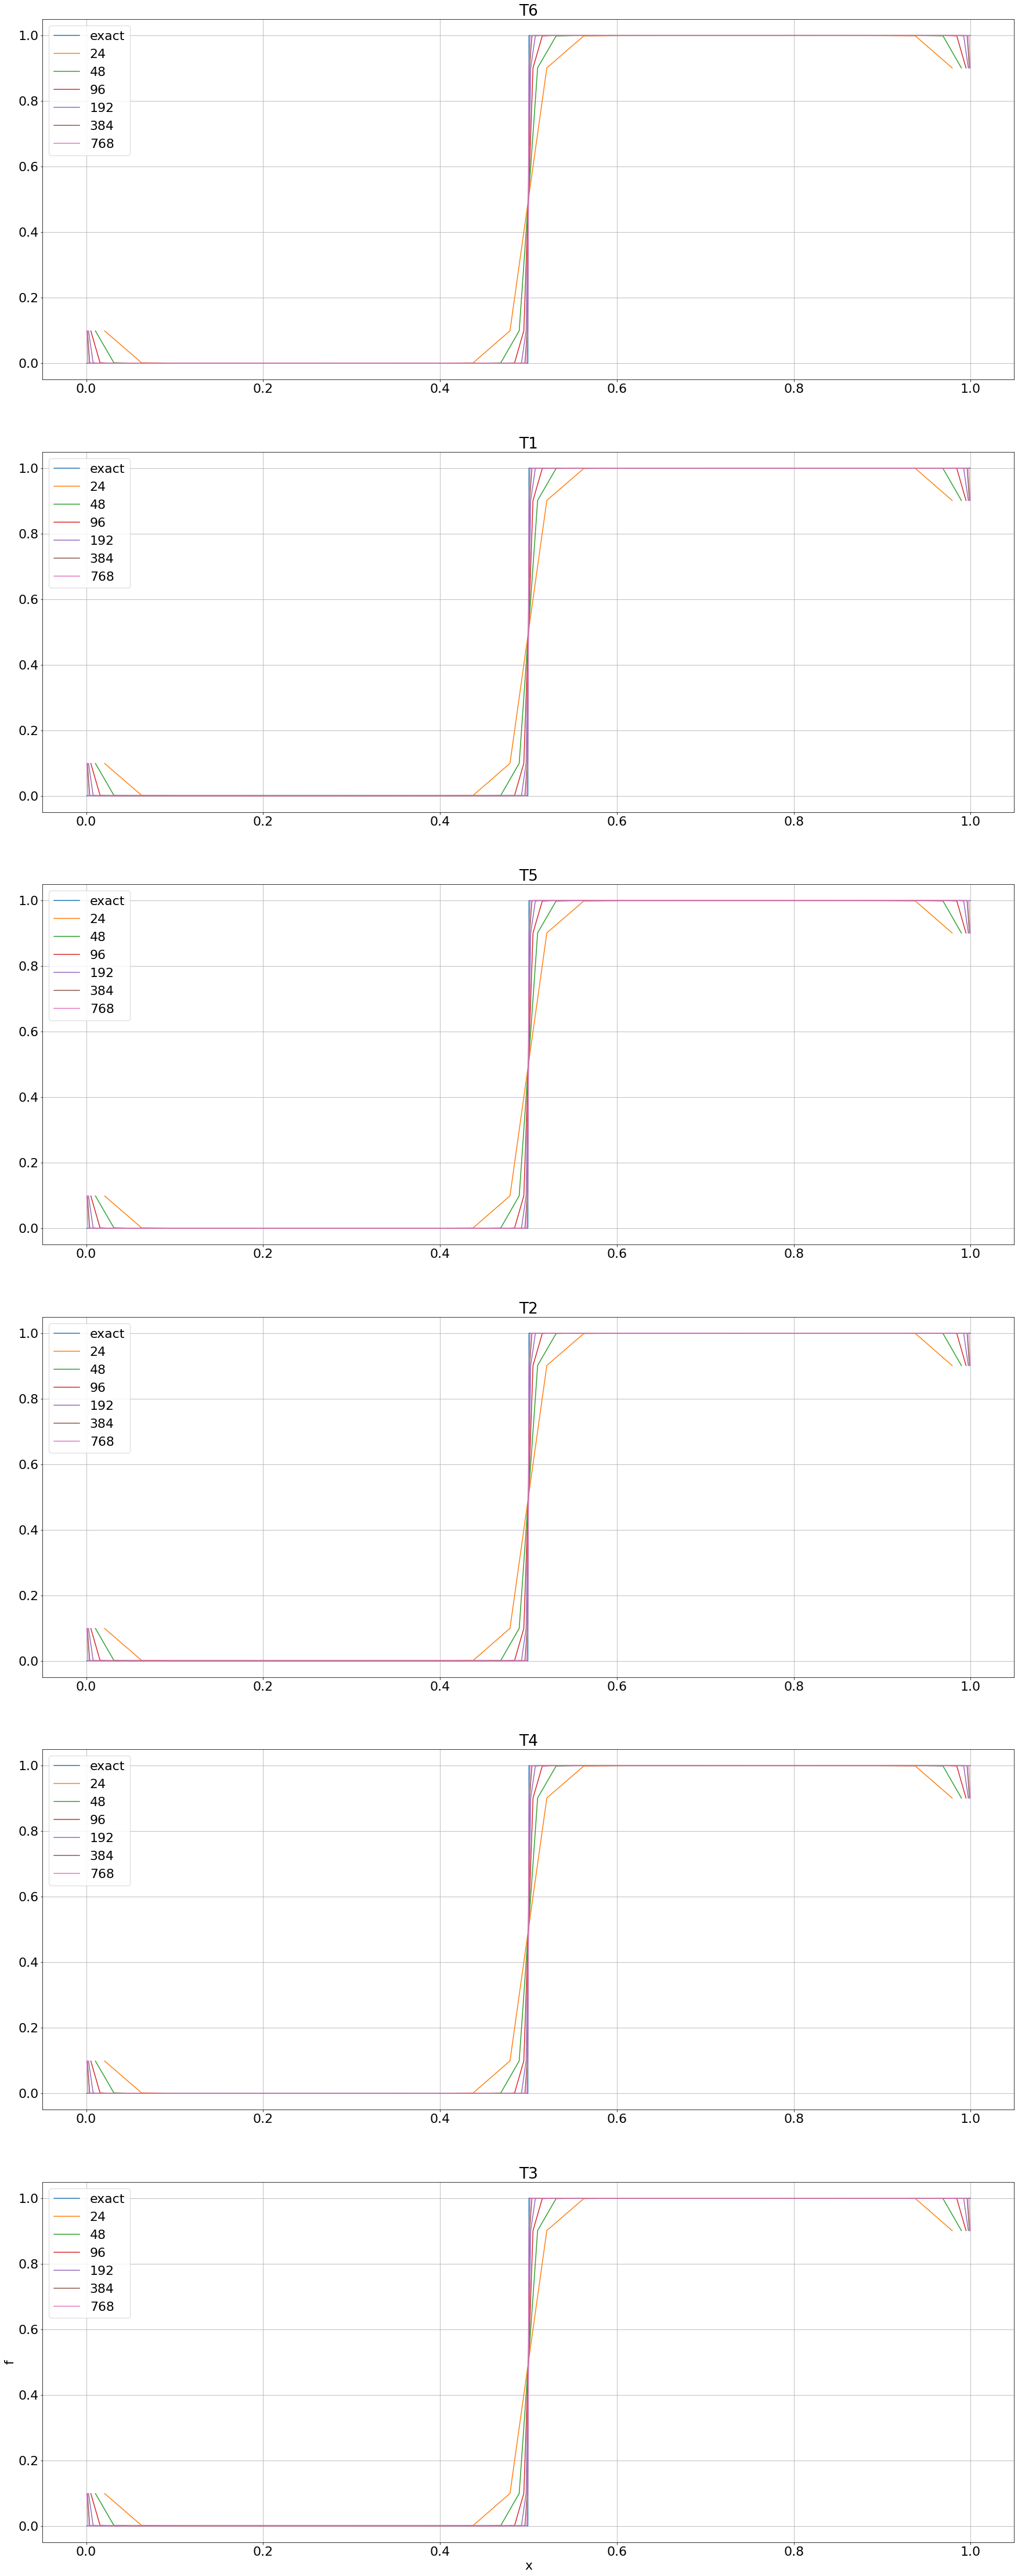

In [16]:
for method in solutions.keys():
    if method == exact:
        continue
    fig, axs = plt.subplots(6, 1, figsize=(30,80))
    plt.rcParams.update({'font.size': 22})
    plt.xlabel('x', fontsize=22)
    plt.ylabel('f', fontsize=22)
    for iT, T in enumerate(periodsT): 
        
        x = xCells(meshesN[-1], meshes[meshesN[-1]])
        y = solutions["exact"][meshesN[-1]]
        axs[iT].plot(x, y, label=exact)
    
        for iN, N in enumerate(meshesN):
            x = xCells(N, meshes[N])
            y = solutions[method][N][T]
            axs[iT].plot(x, y, label=str(N))
        
        axs[iT].grid()
        
        axs[iT].set_title("T"+str(T))
        axs[iT].legend()
    
    plt.savefig(downDir(plotOutPath, method+".png"))

### Графики ошибки и исследование сходимости

Метод обладает сходимостью степени b если существует 0 < a <= 1 :
существует натуральное N и для любого n>=N:
error(n, T) < a * error(n-1, T) ^ b

Скорость сходимости была оценена как тангенс угла наклона графика зависимости log(error(n, T)) от log(error(n-1, T)).
так как
log(error(n, T)) < log(a) + k * log(error(n-1, T))

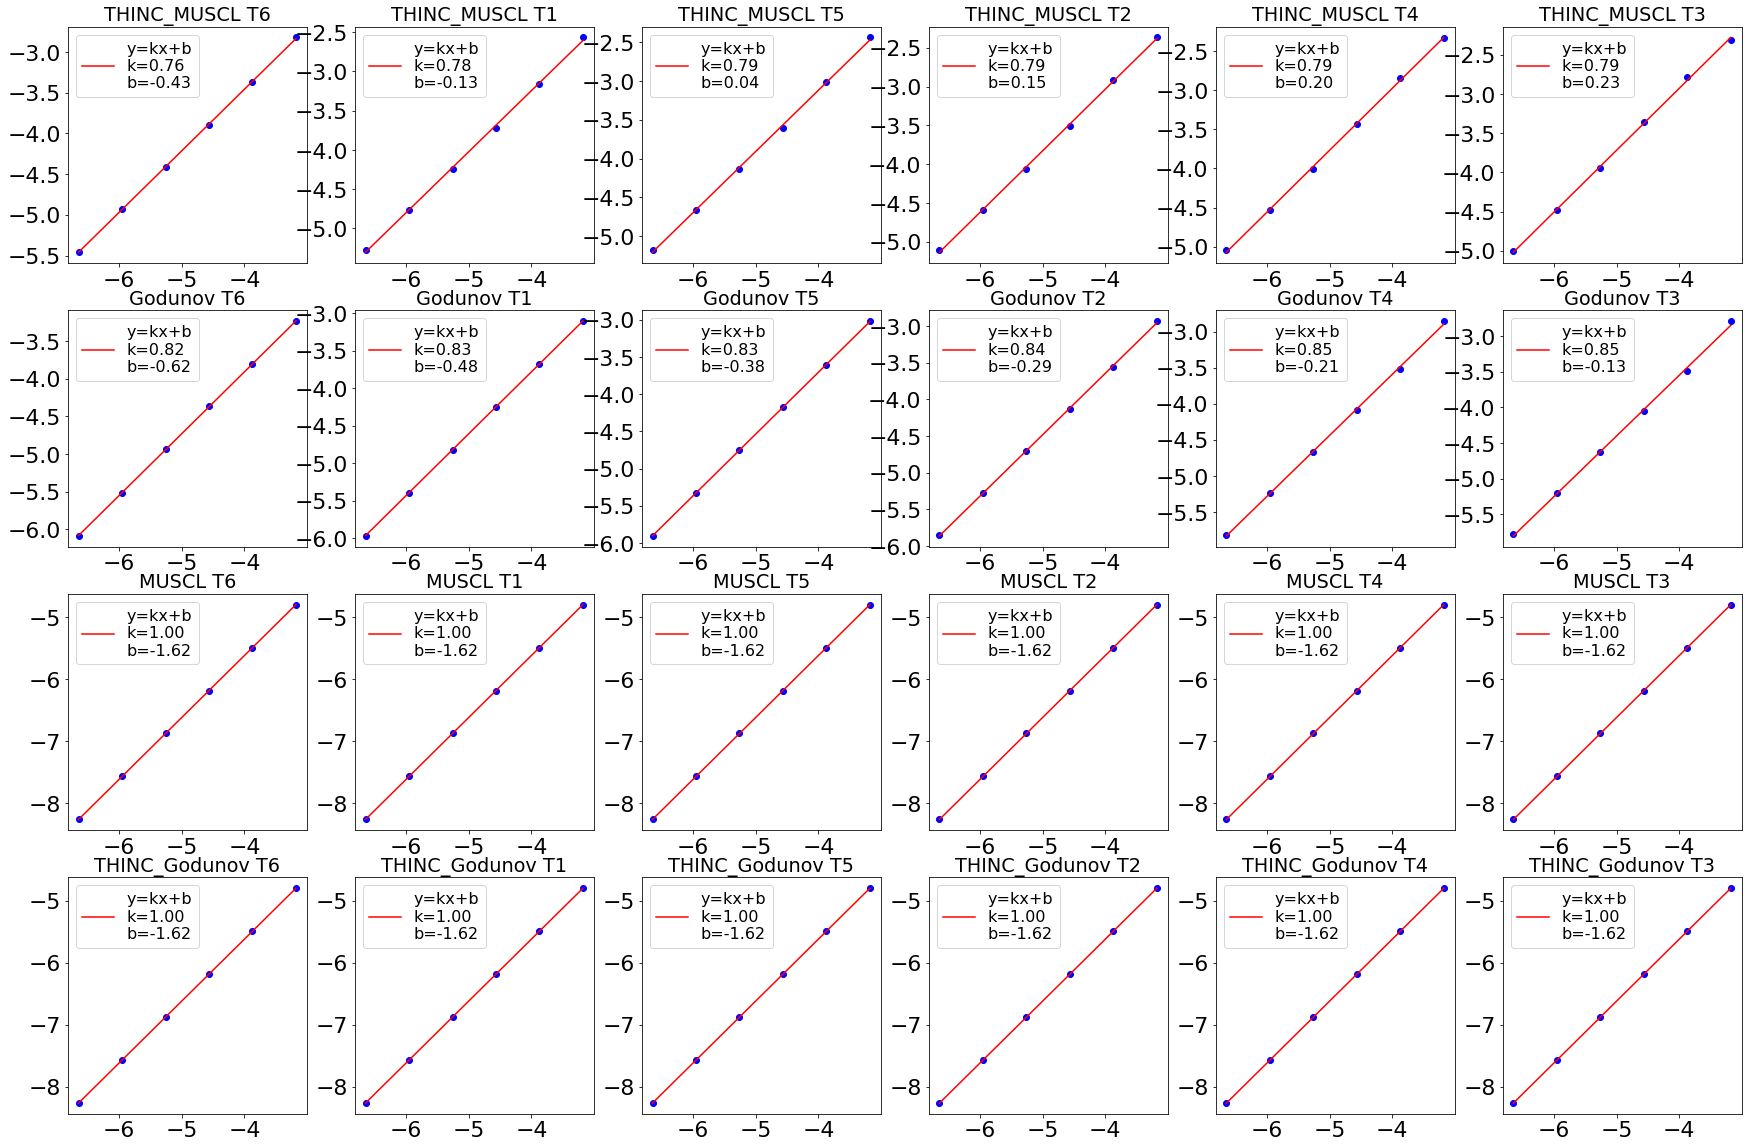

In [17]:
import numpy as np
import math

fig, axs = plt.subplots(4, 6, figsize=(30,20))
plt.rcParams.update({'font.size': 16})

for m, method in enumerate(CalculationResultsSubcats):
    if method == exact:
        continue
    for i, T in enumerate(periodsT):
        x = []
        y = []
        for N in meshesN:
            x.append(math.log(meshes[N]))
            #x.append(math.log(errors[method][meshesN[j-1]][T]))
            y.append(math.log(errors[method][N][T]))
        kb = np.polyfit(x,y,1)
        xApprox = [min(x), max(x)]
        yApprox = [kb[0]*xApprox[0]+kb[1], kb[0]*xApprox[1]+kb[1]]
        
        axs[m, i].plot(x, y, 'bo')
        axs[m, i].plot(xApprox, yApprox, 'r-', label='y=kx+b\nk='+"{:.2f}".format(kb[0])+"\nb="+"{:.2f}".format(kb[1]))
        axs[m, i].legend()
        axs[m, i].set_title(method+" T"+str(T))
plt.savefig(downDir(plotOutPath, "ErrorConvergence.png"))

### Построение некоторых графиков избранных расчетов

MovieWriter PillowWriter unavailable; using Pillow instead.


Animation time:  10.0
Animation real time step:  0.4
Animation fps:  2.5


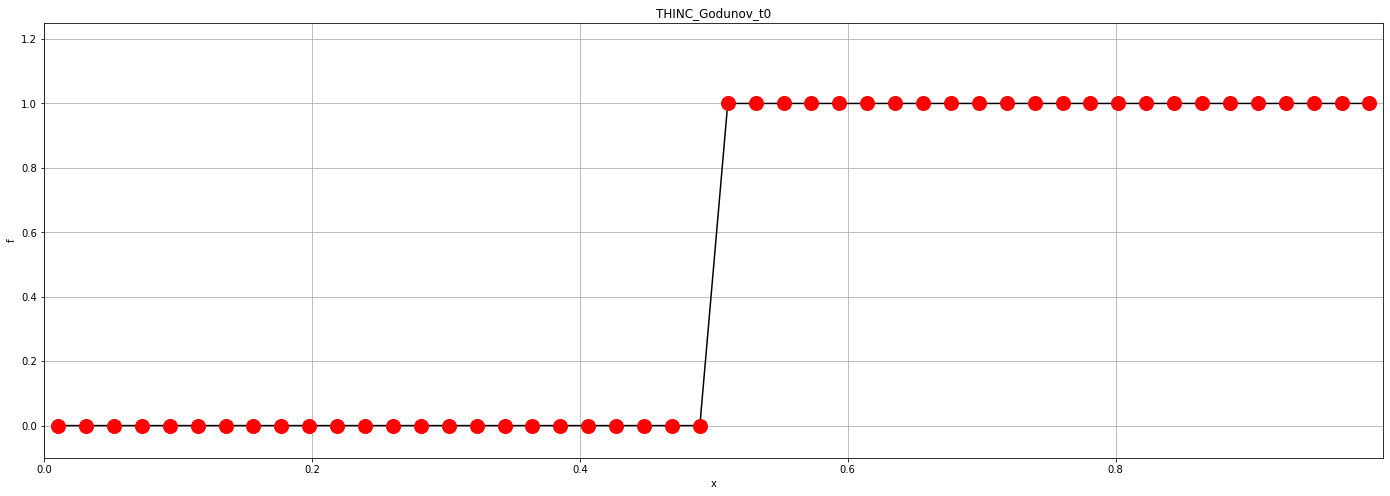

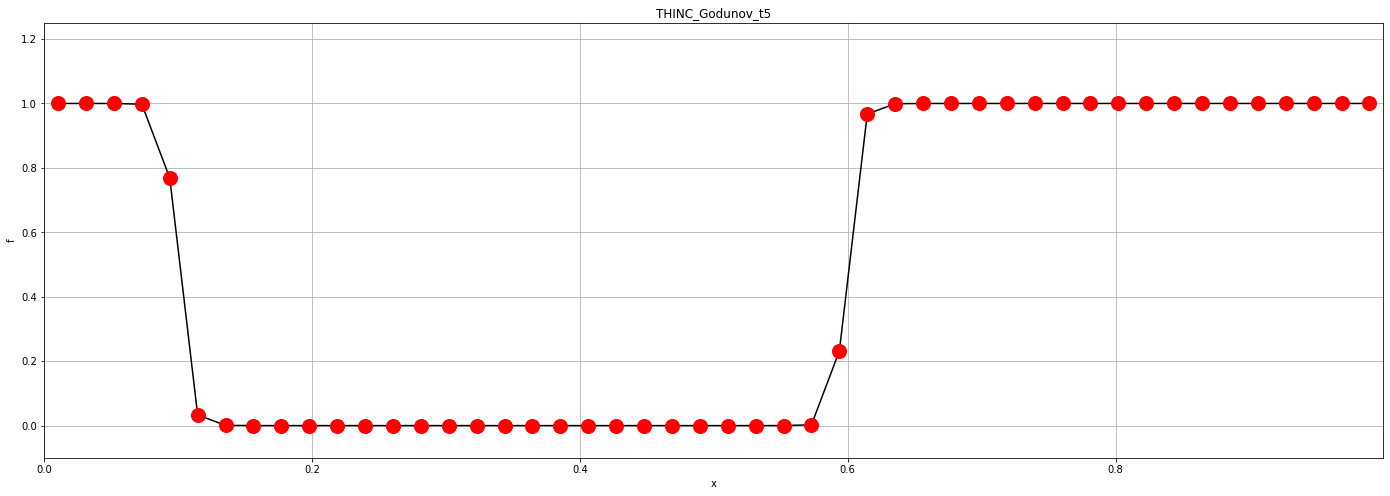

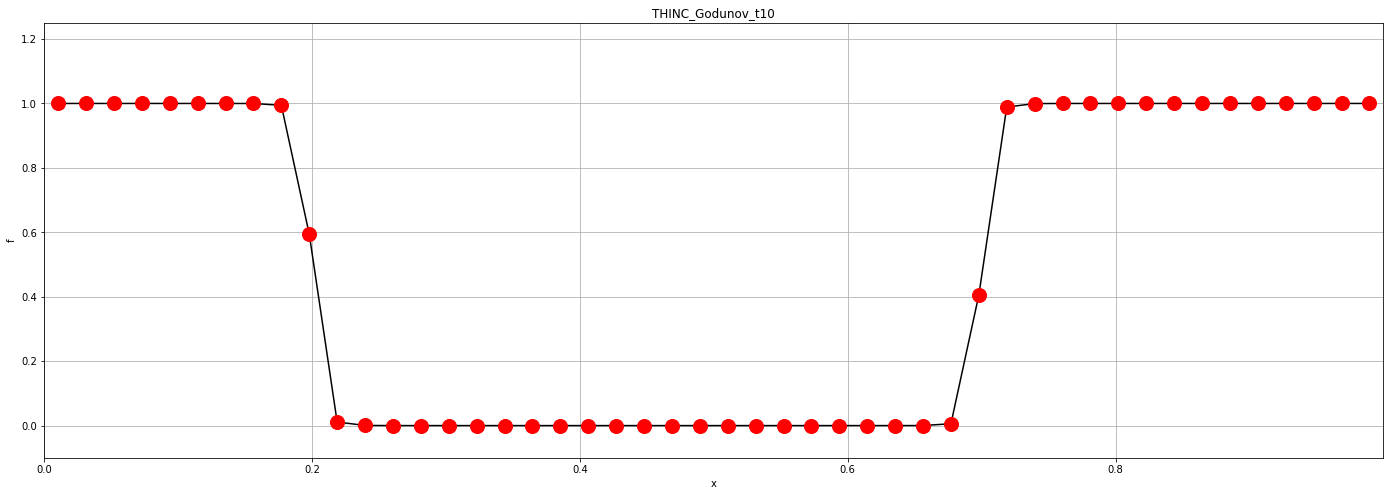

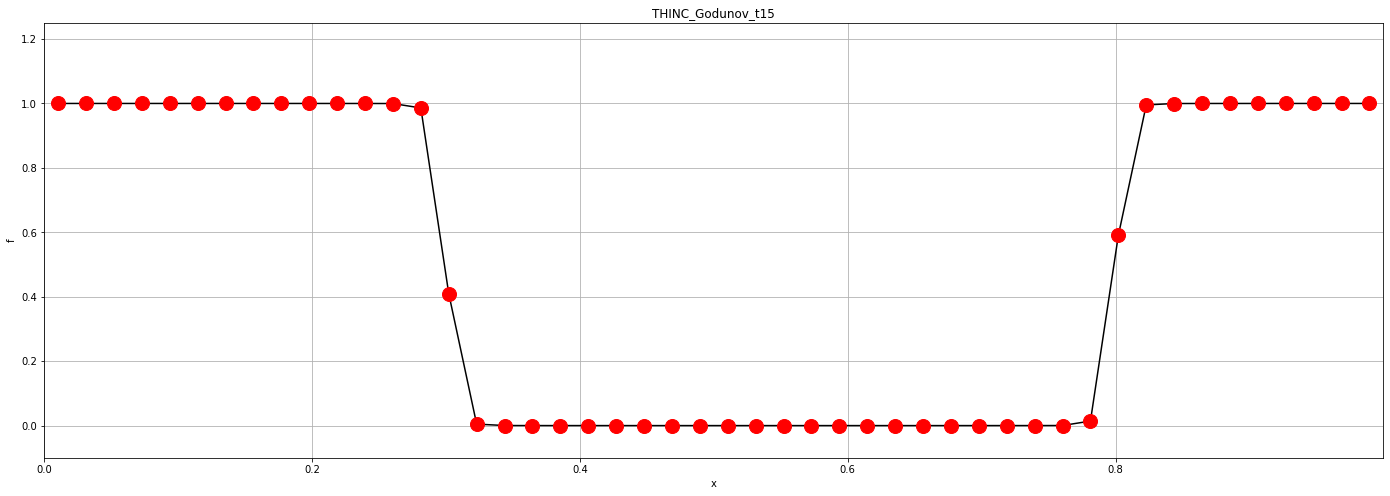

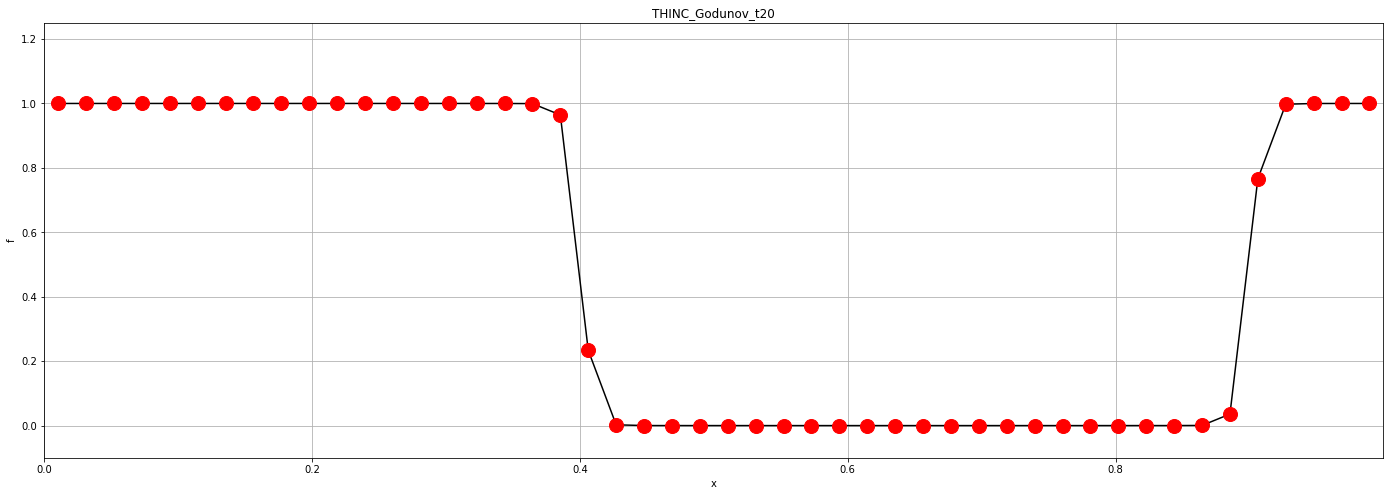

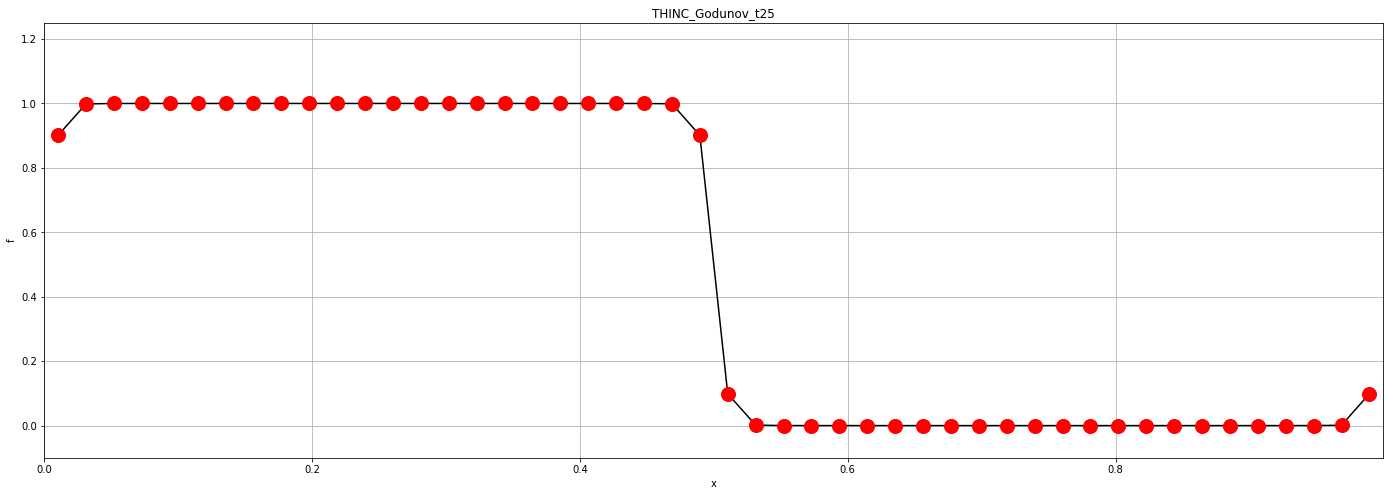

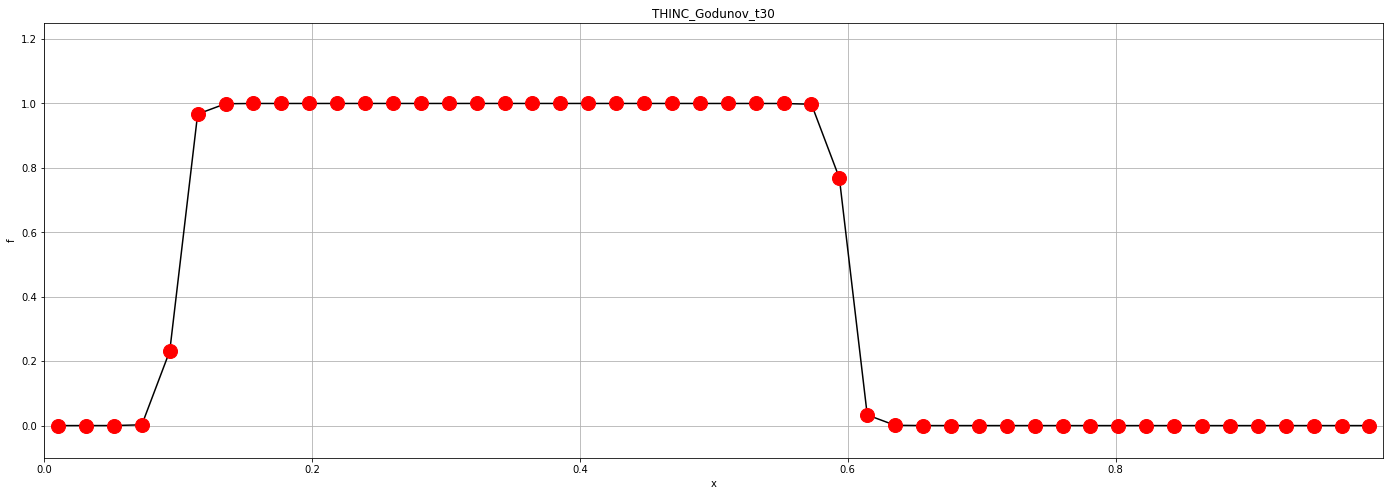

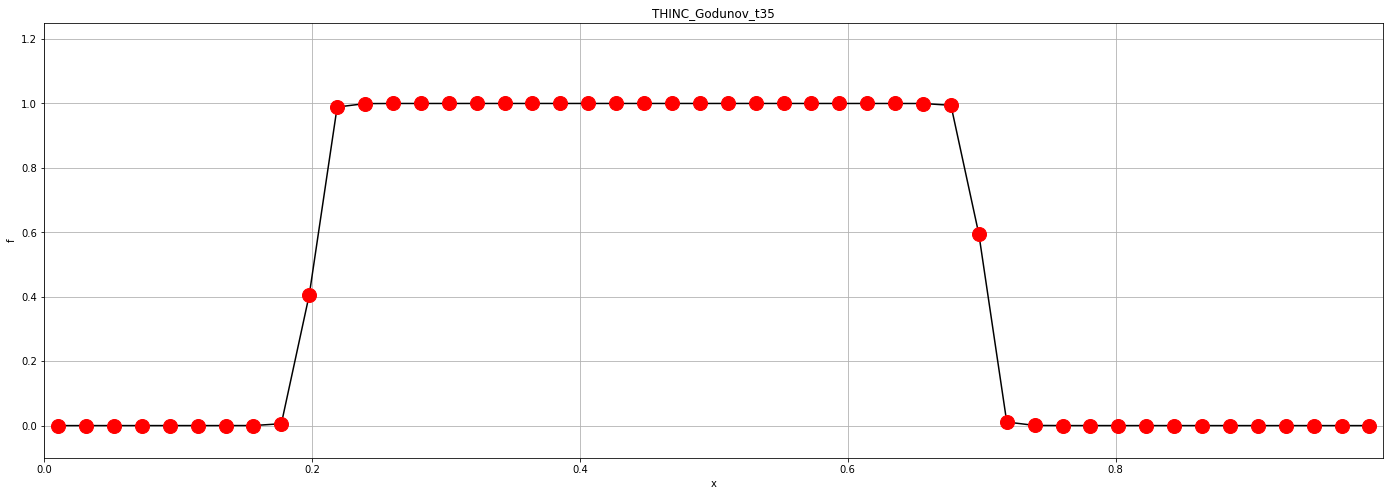

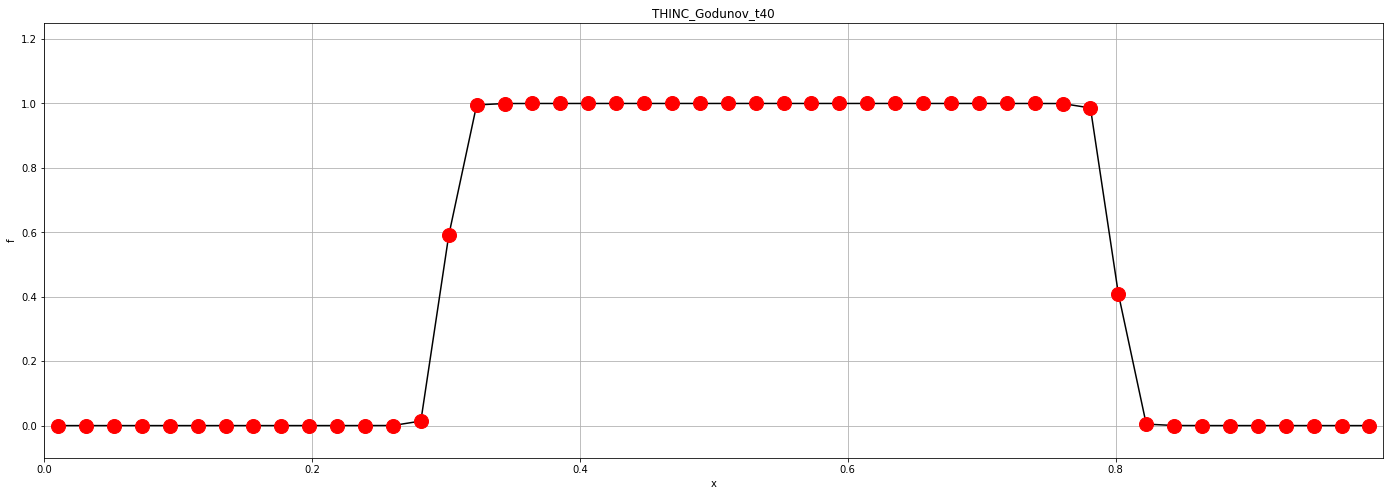

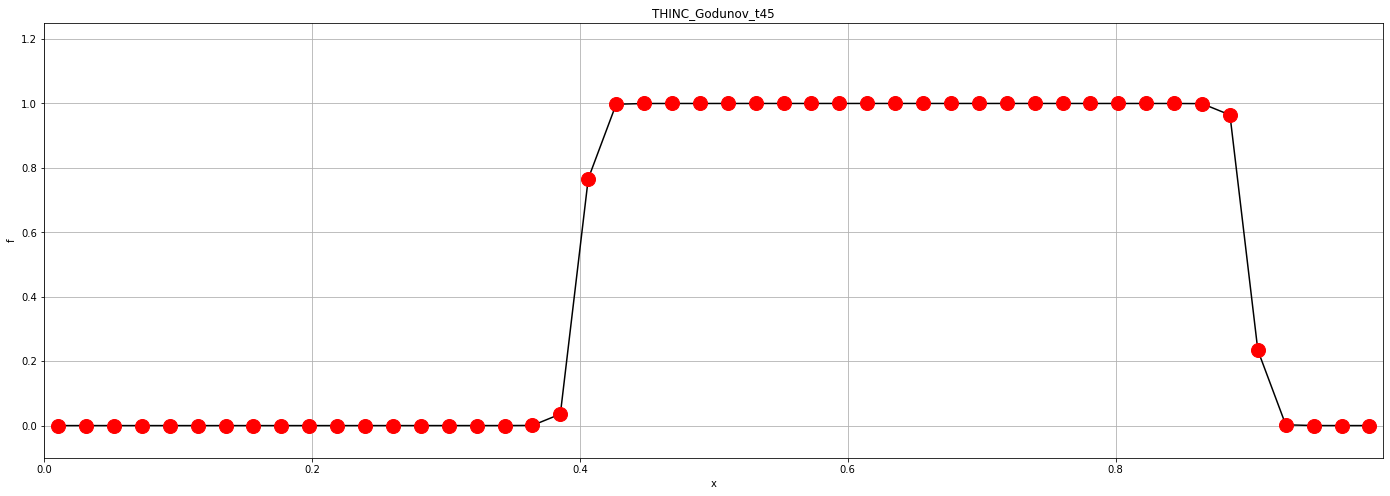

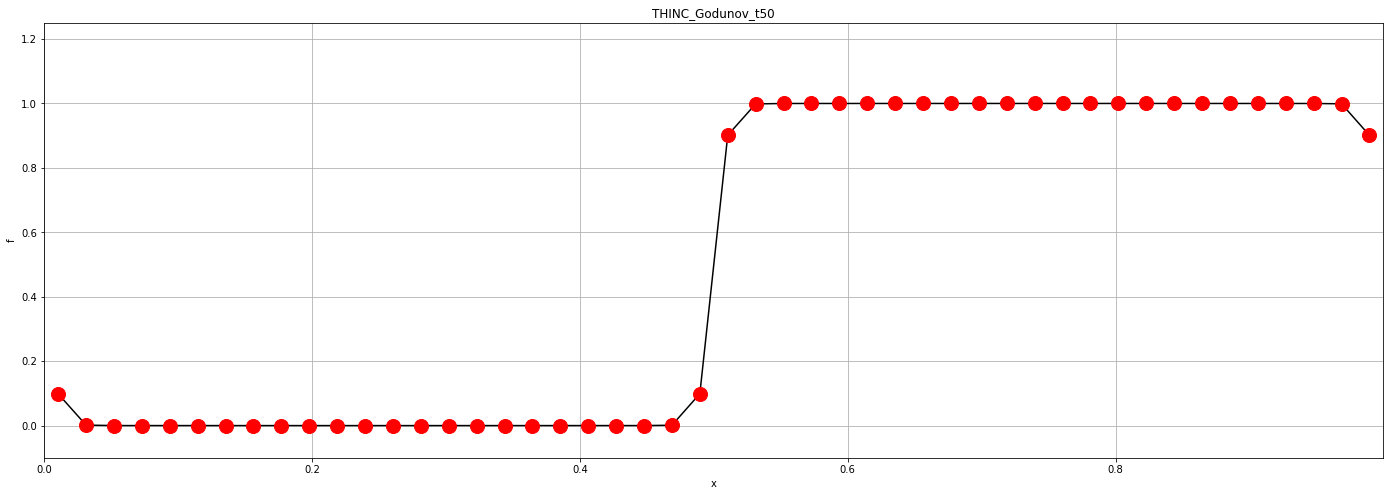

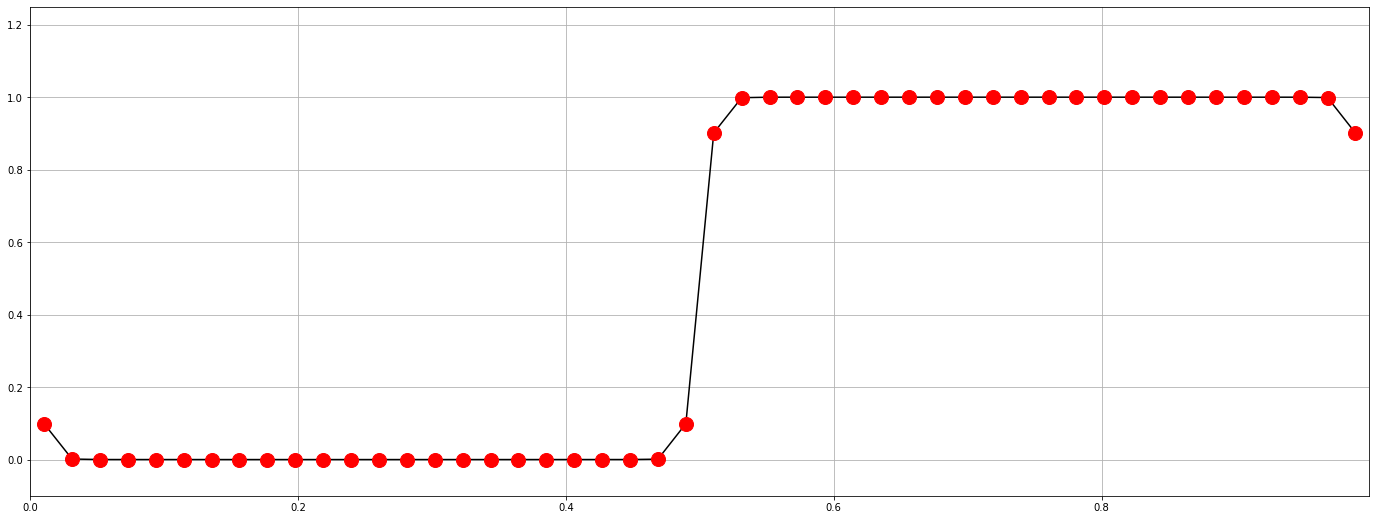

In [8]:
TE1DTestVisualization(calcResPath, plotOutPath, "THINC_Godunov", "N48_T1.txt", 5, 2, False)

MovieWriter PillowWriter unavailable; using Pillow instead.


Animation time:  10.0
Animation real time step:  0.4
Animation fps:  2.5


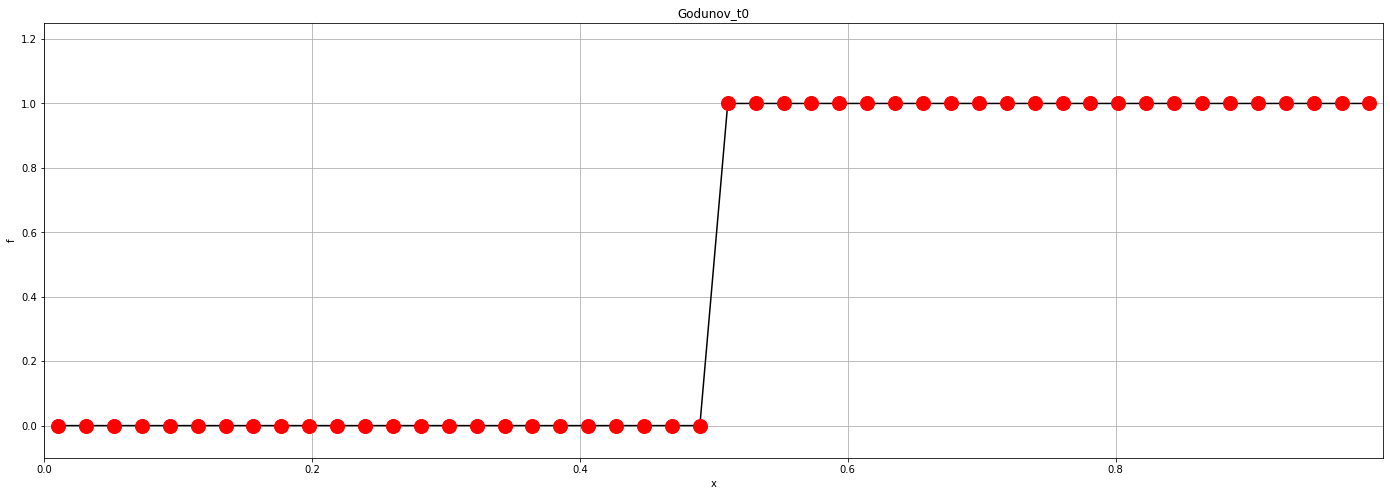

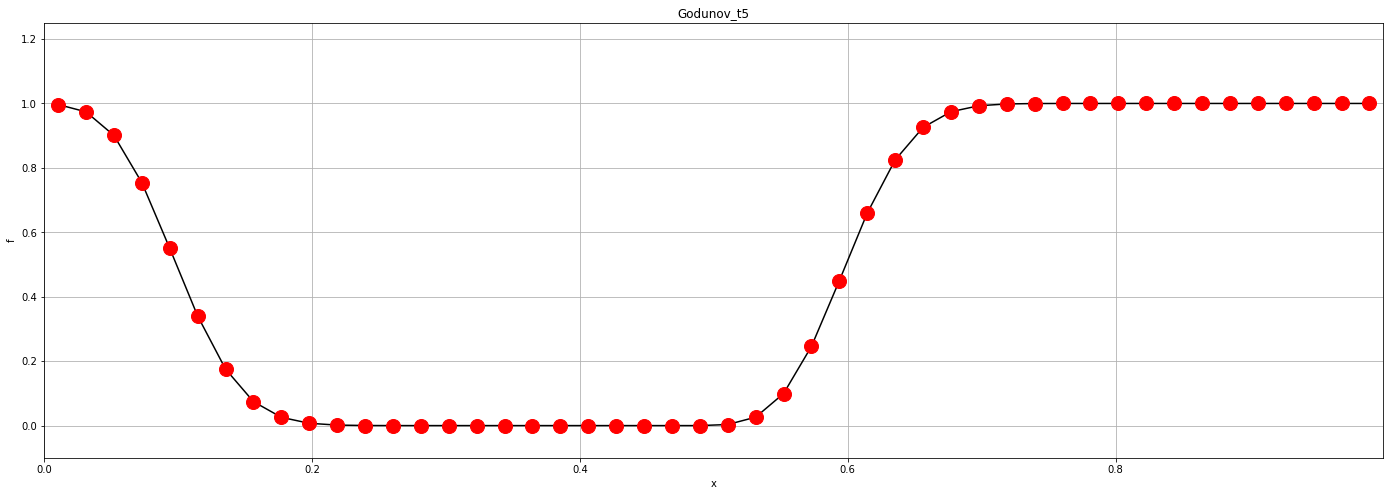

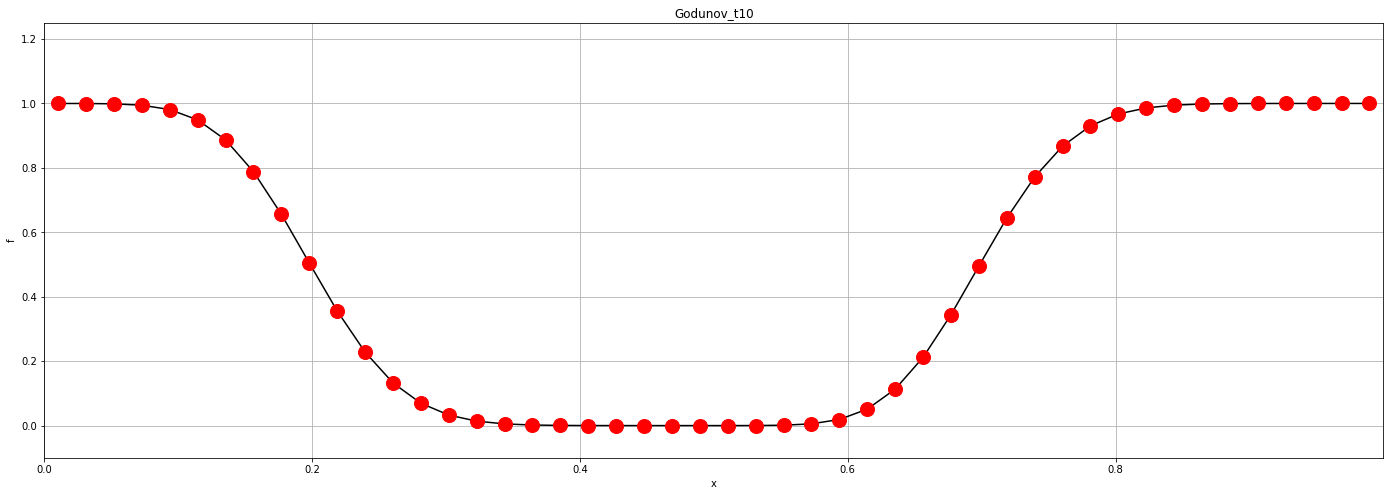

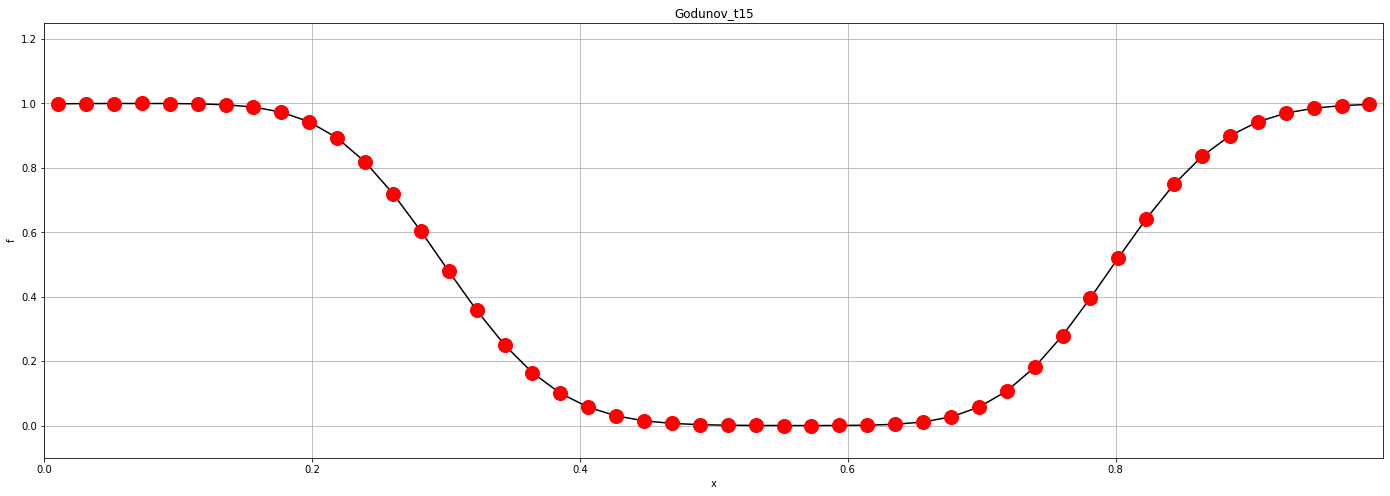

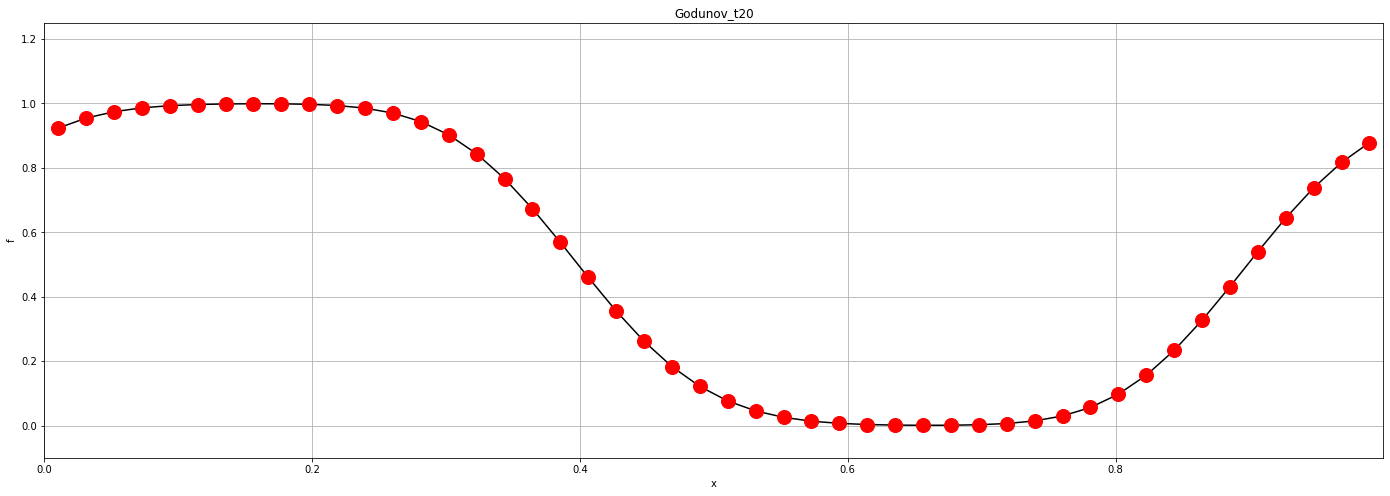

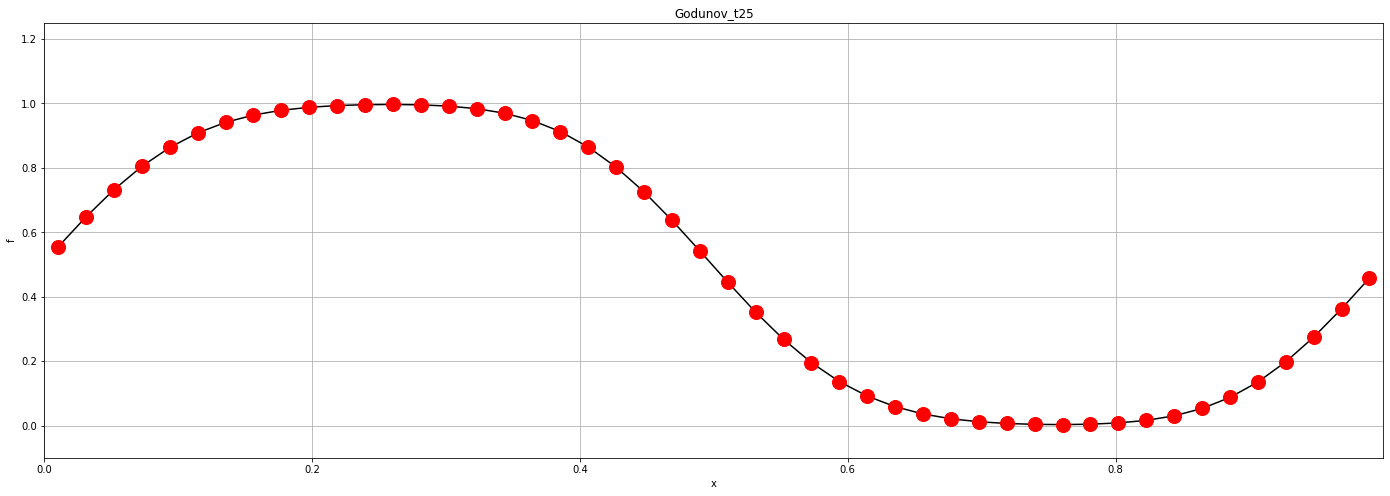

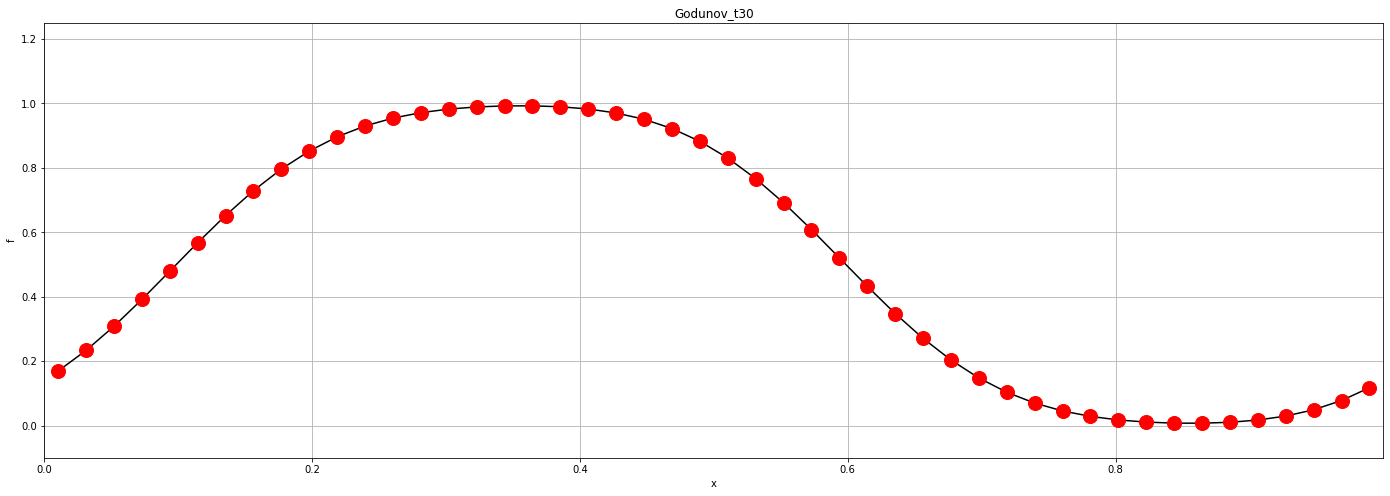

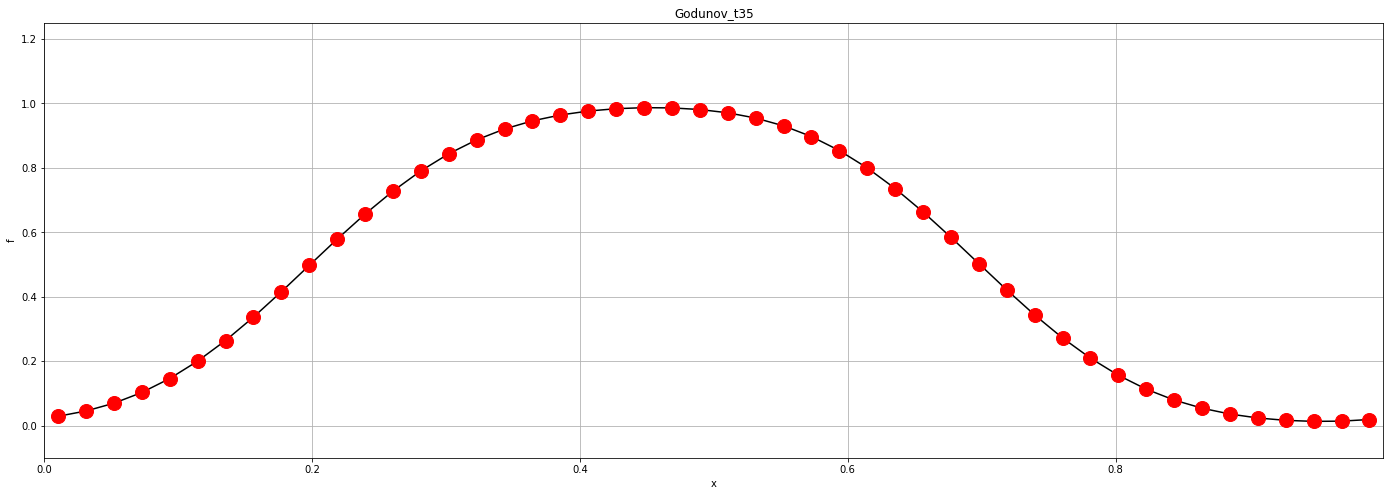

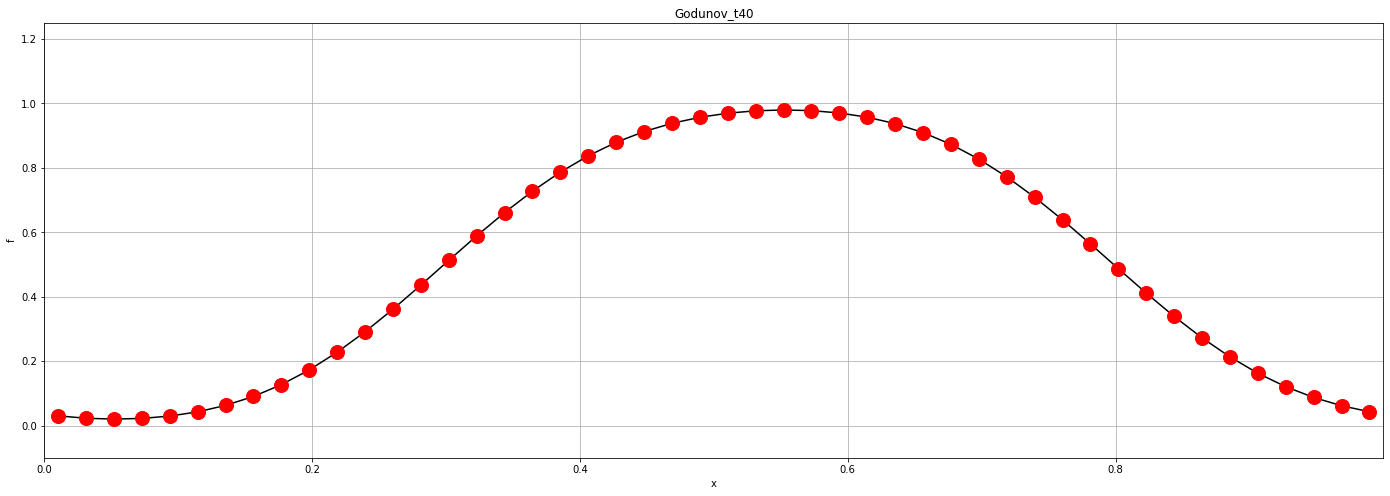

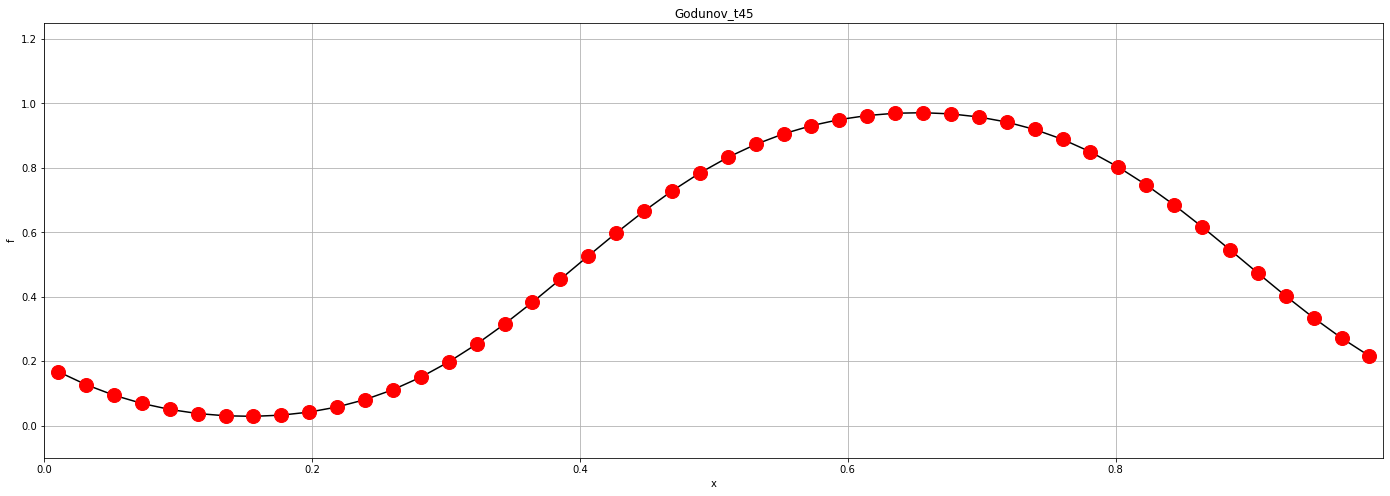

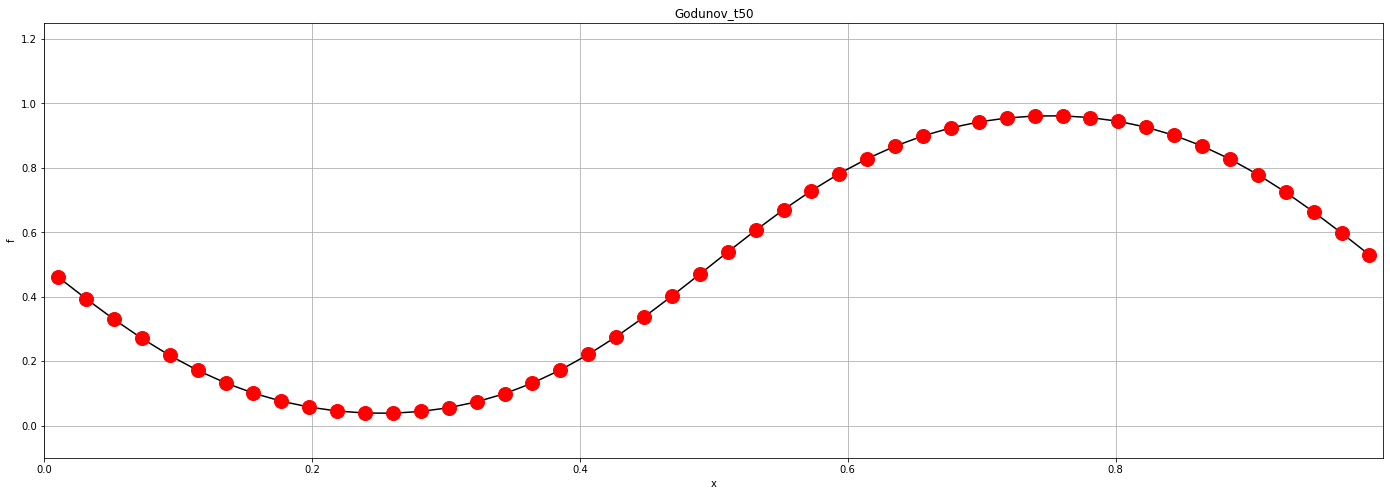

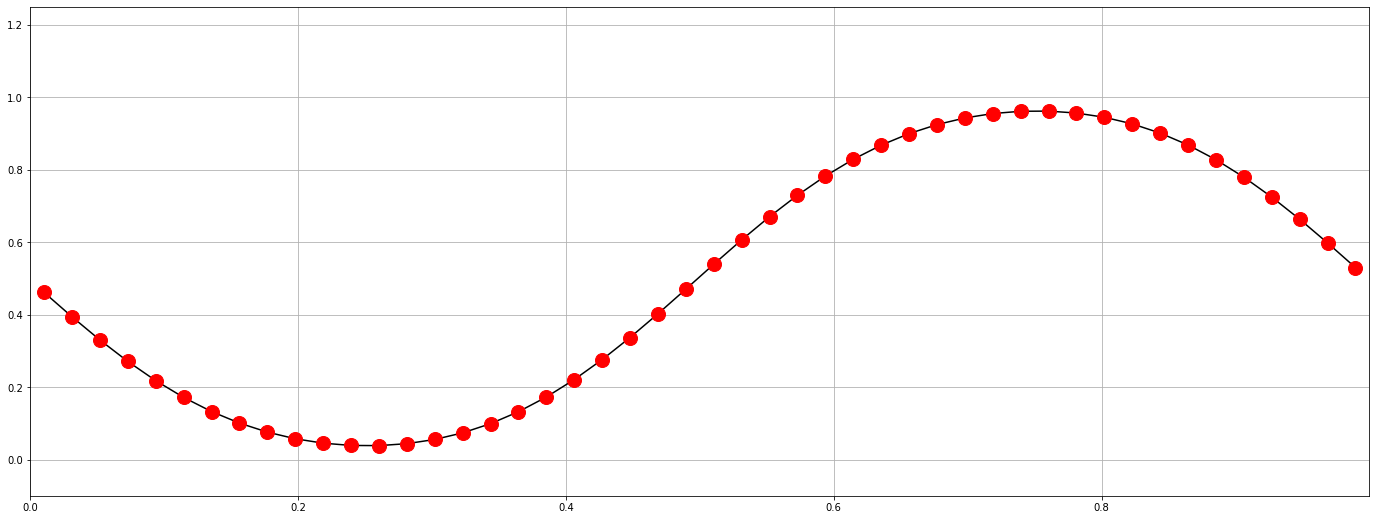

In [9]:
TE1DTestVisualization(calcResPath, plotOutPath, "Godunov", "N48_T1.txt", 5, 2, False)

MovieWriter PillowWriter unavailable; using Pillow instead.


Animation time:  10.0
Animation real time step:  0.4
Animation fps:  2.5


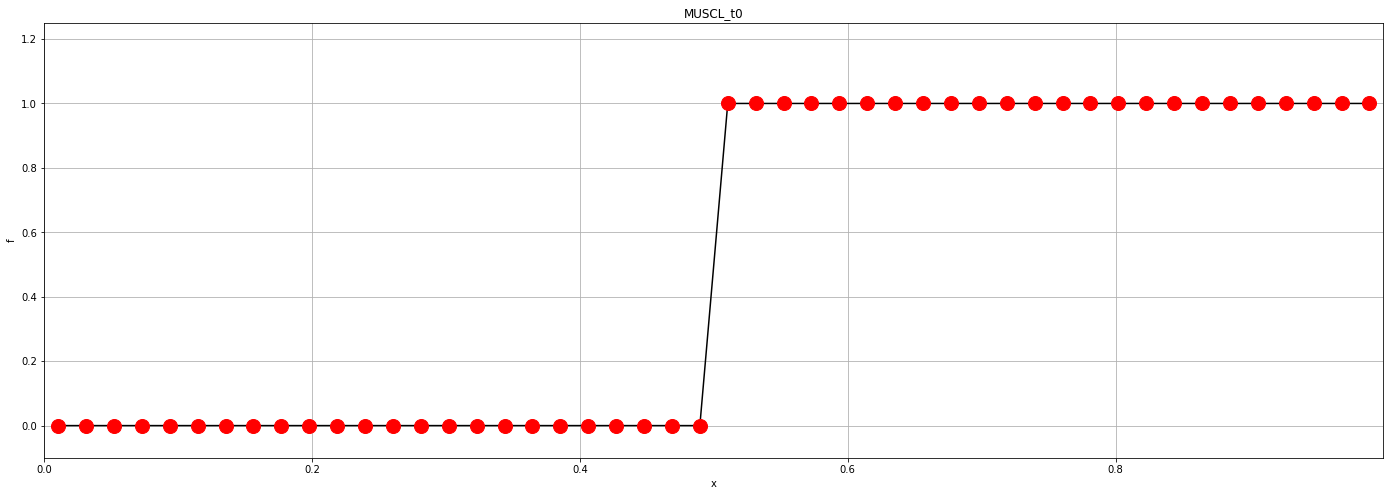

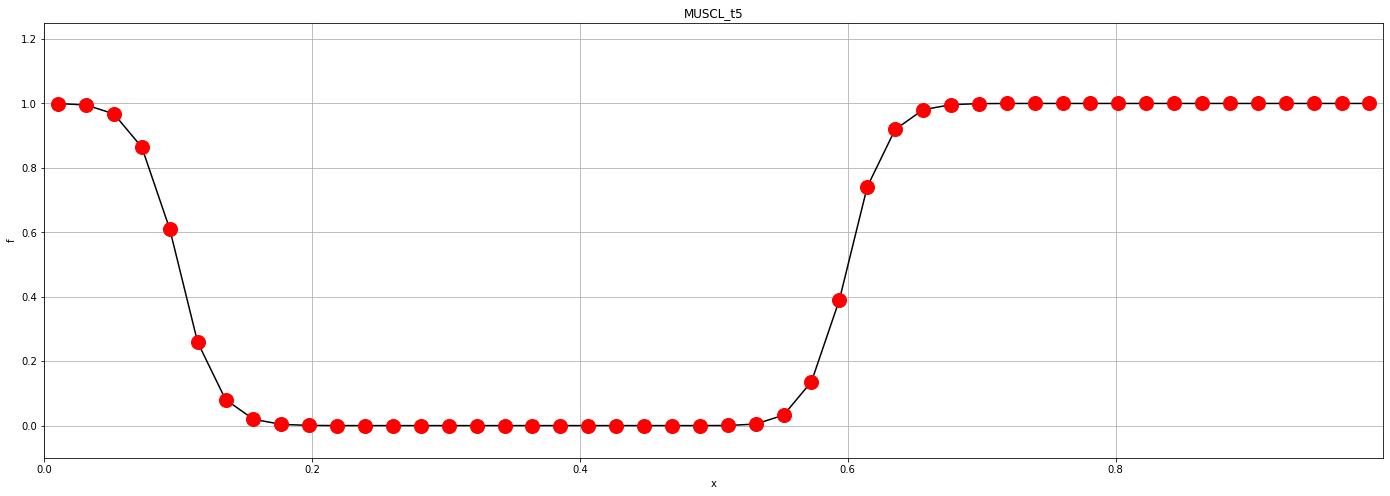

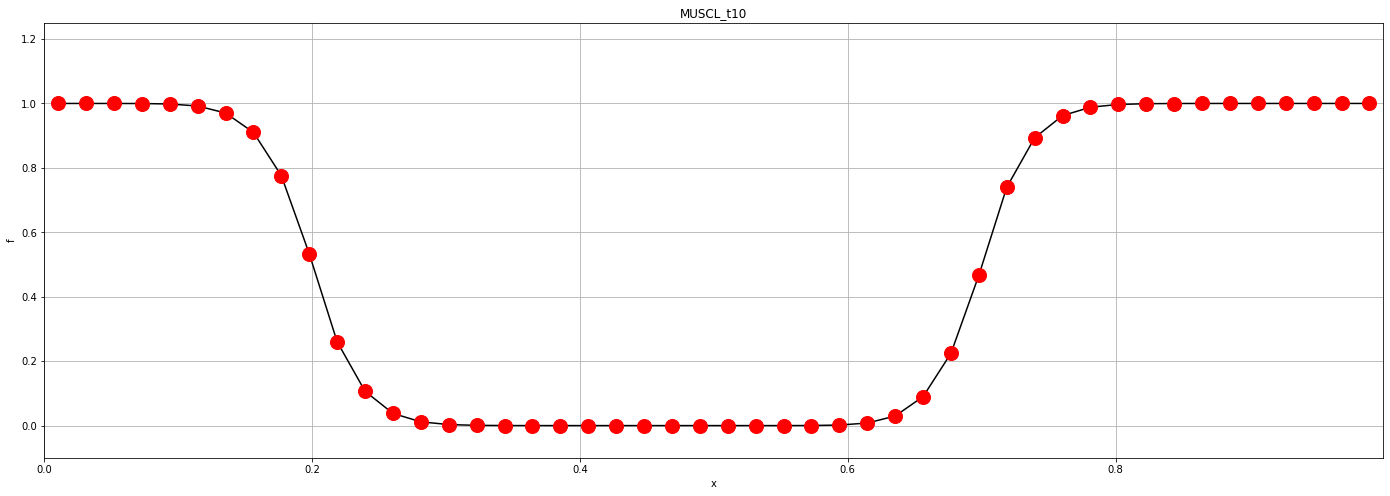

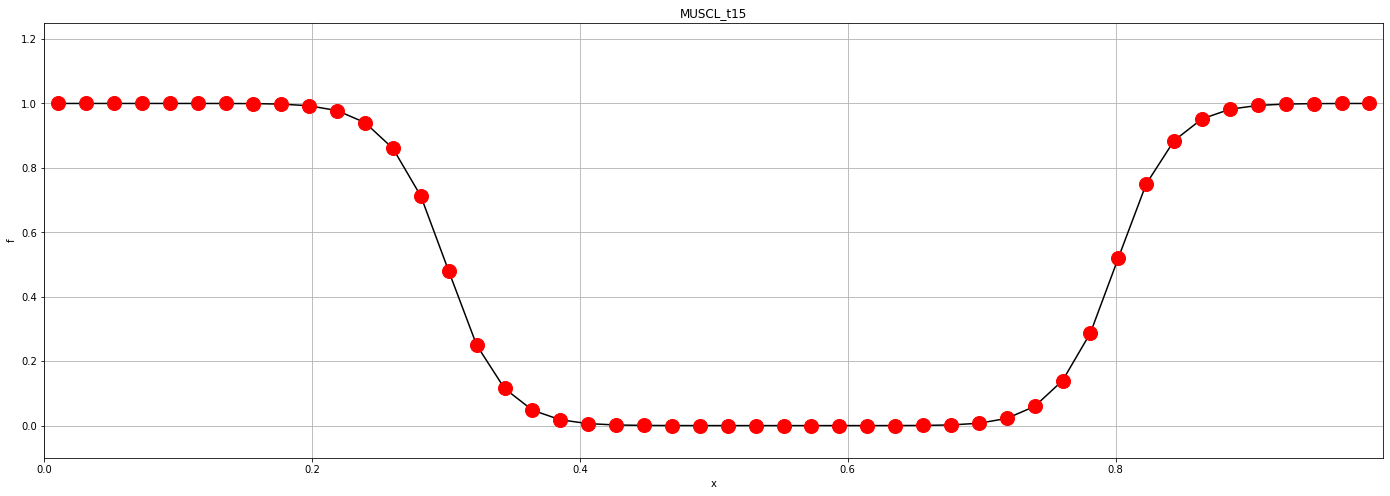

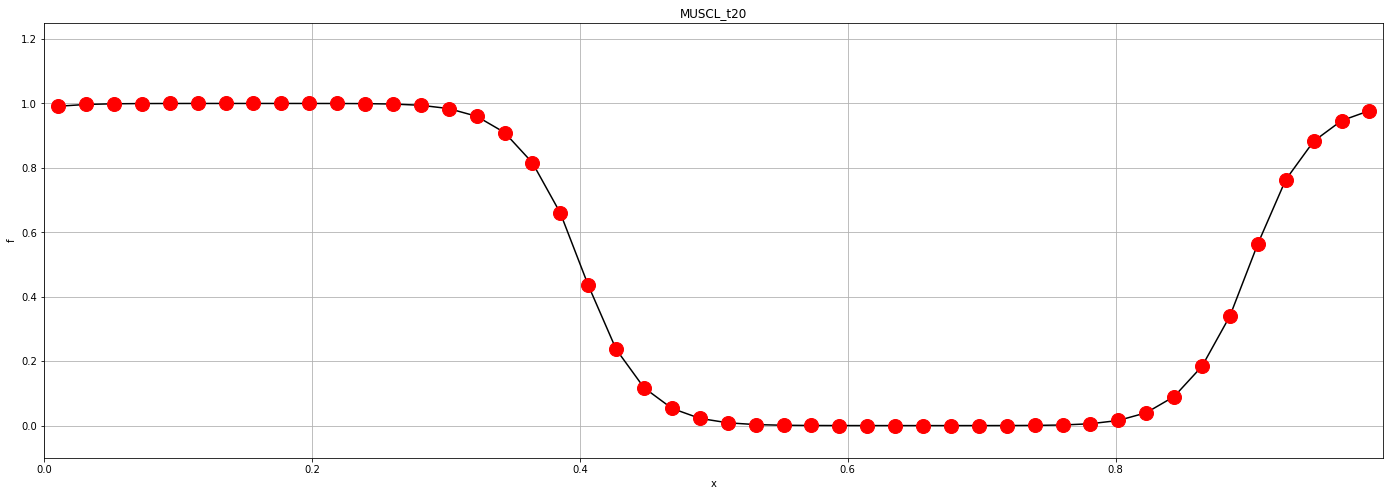

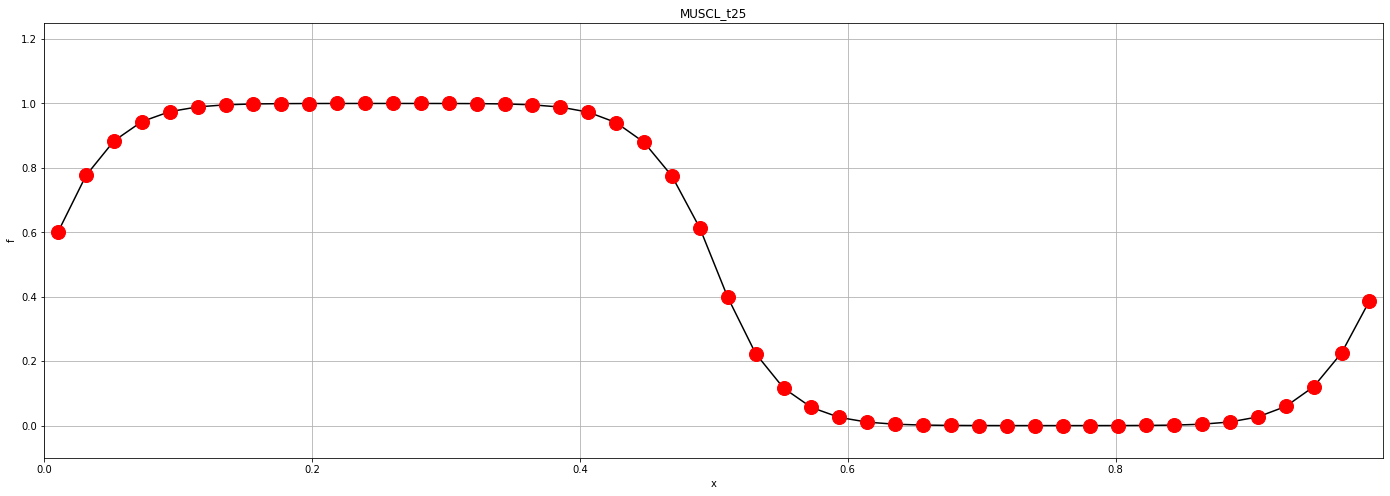

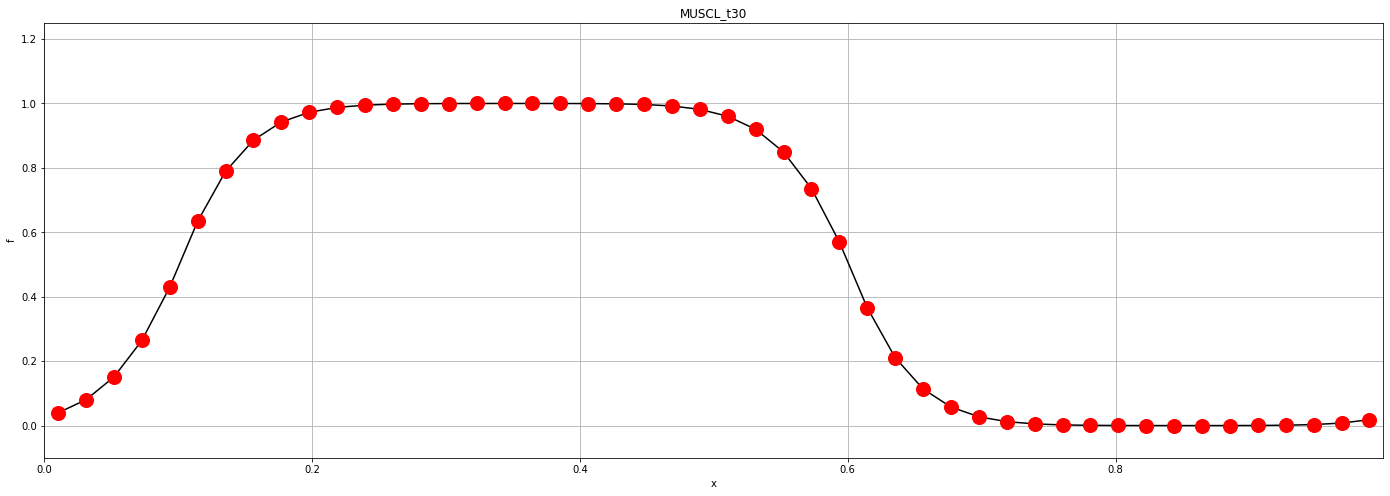

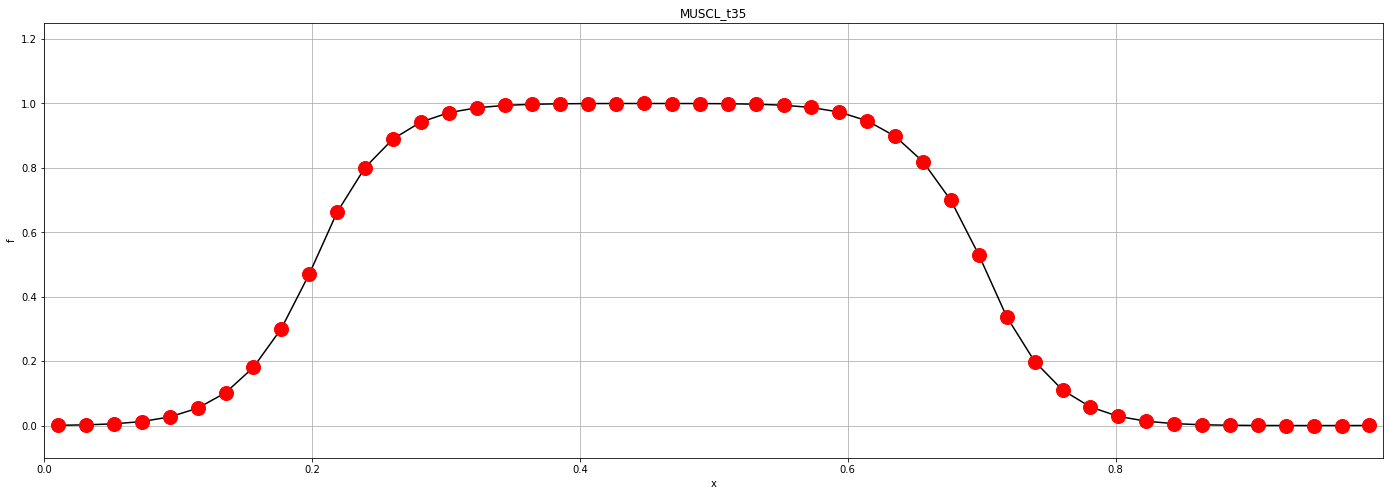

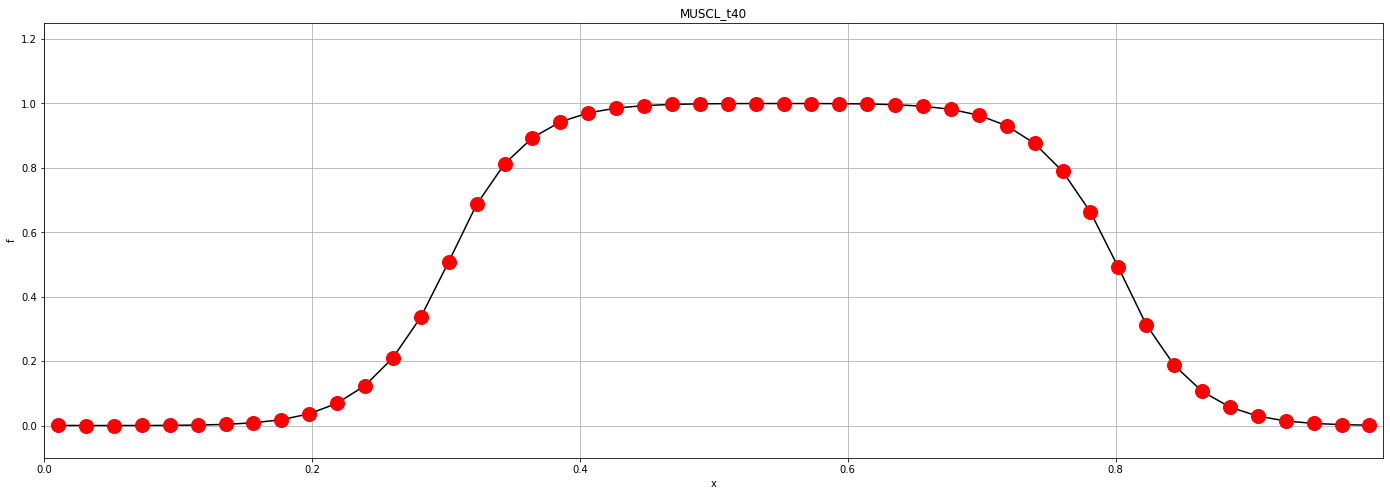

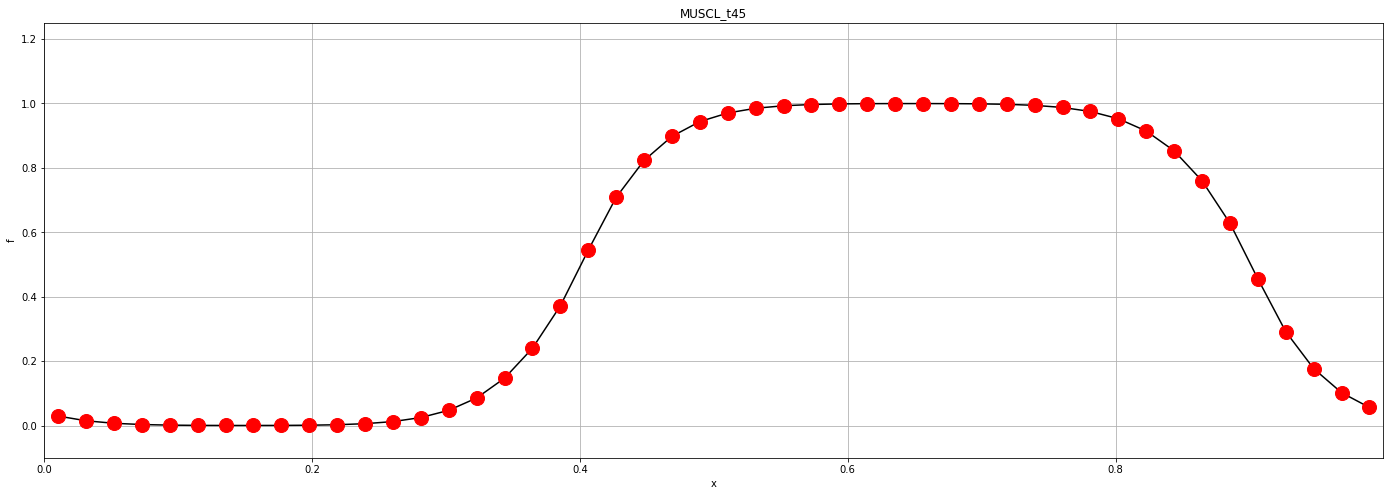

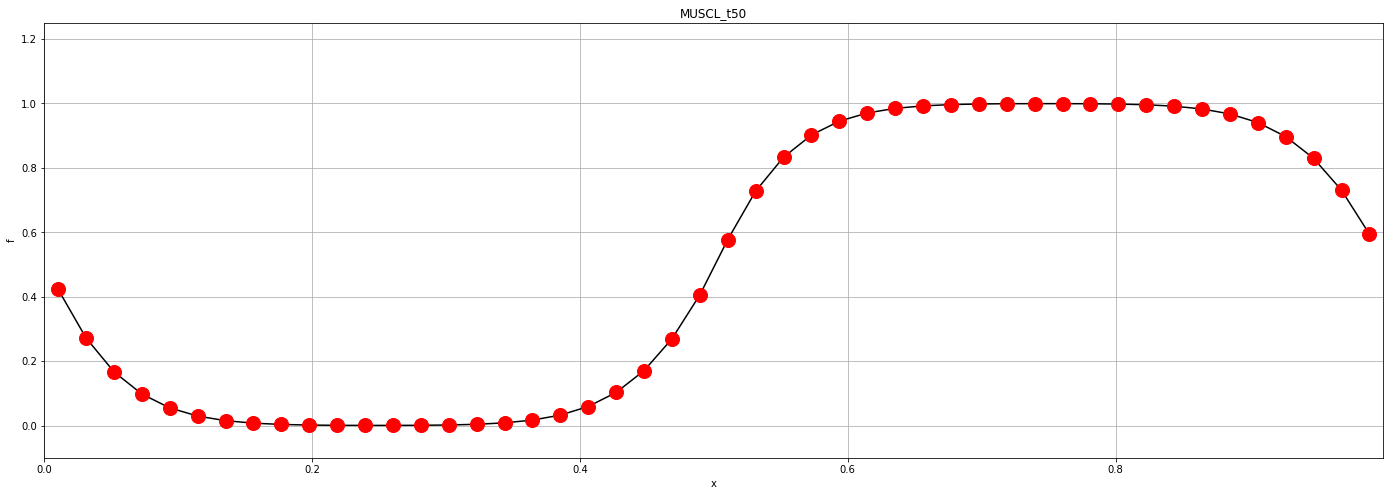

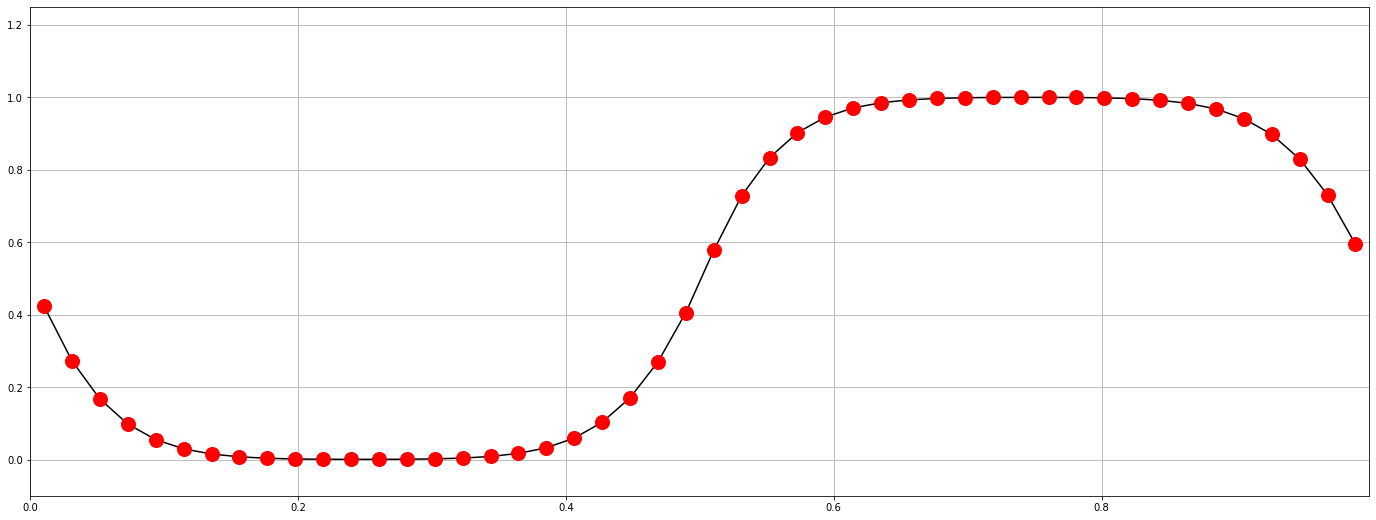

In [10]:
TE1DTestVisualization(calcResPath, plotOutPath, "MUSCL", "N48_T1.txt", 5, 2, False)

MovieWriter PillowWriter unavailable; using Pillow instead.


Animation time:  10.0
Animation real time step:  0.4
Animation fps:  2.5


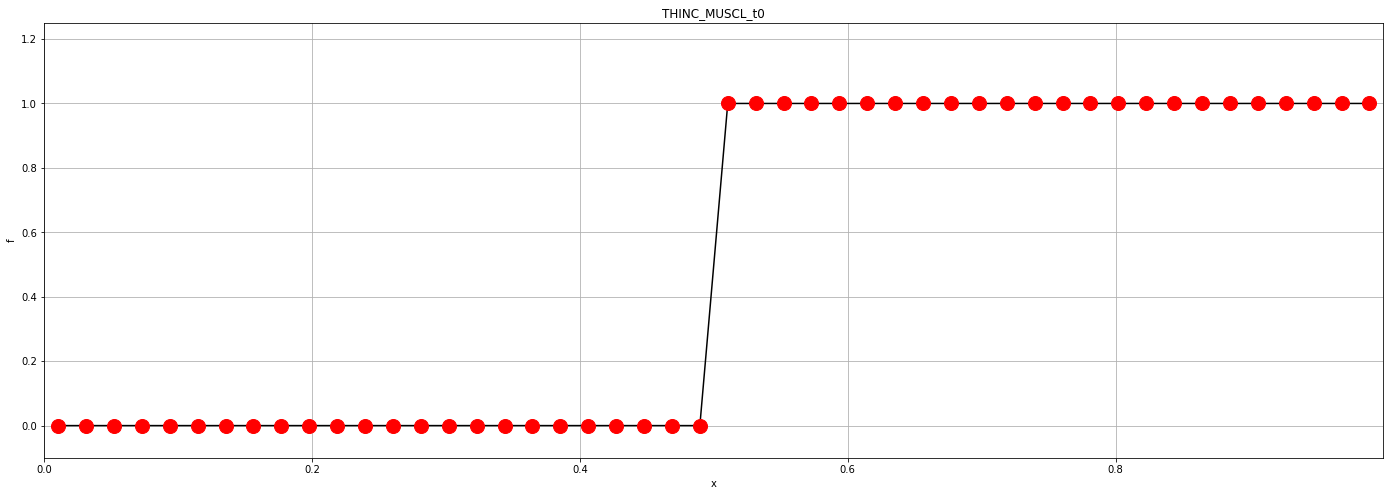

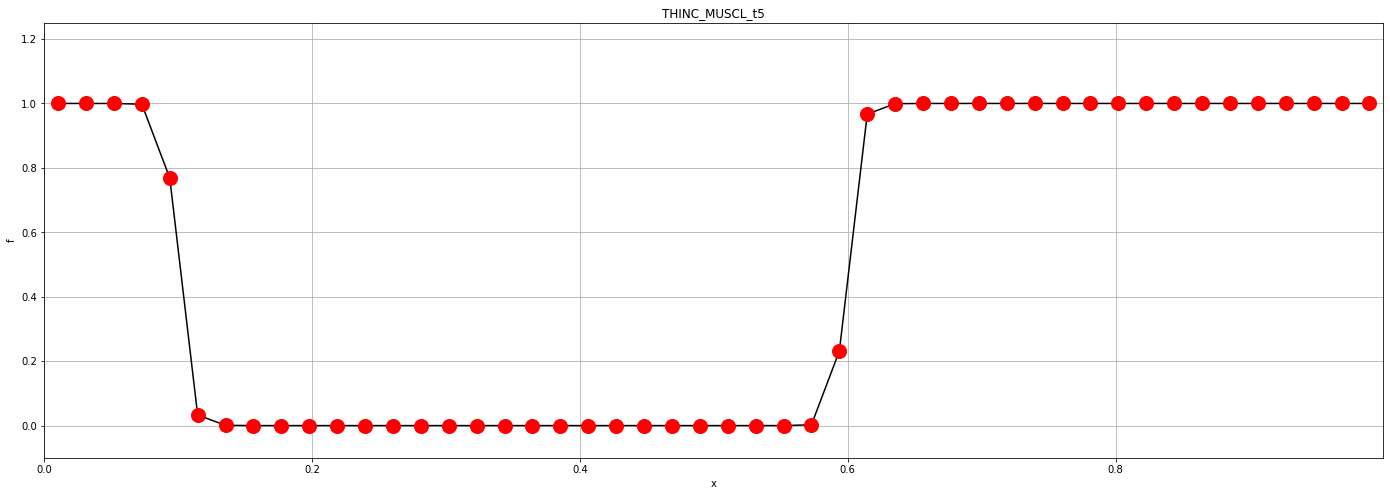

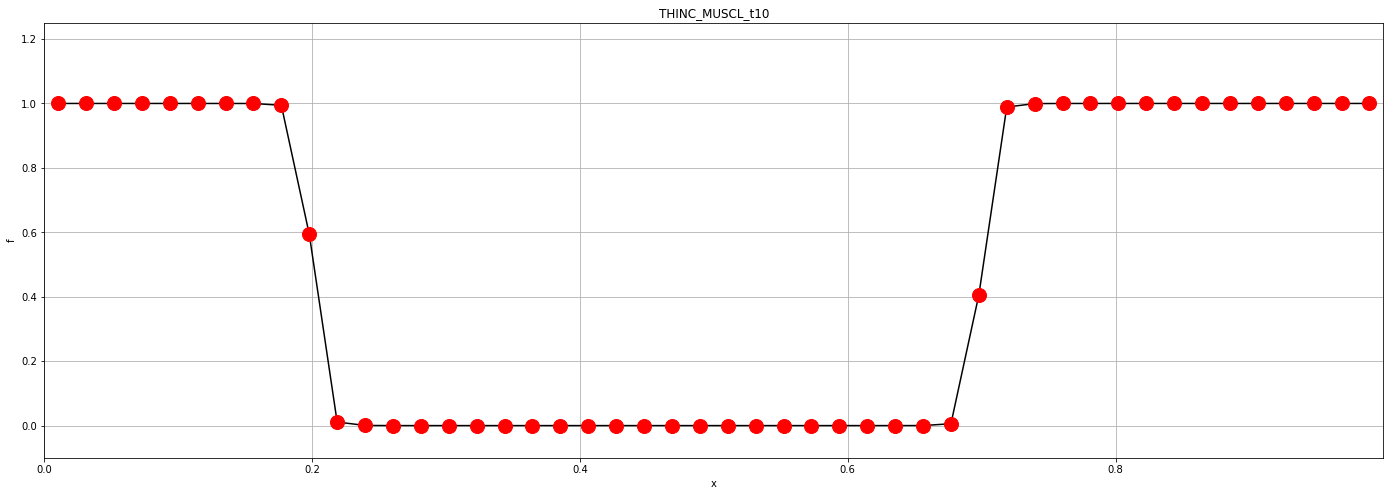

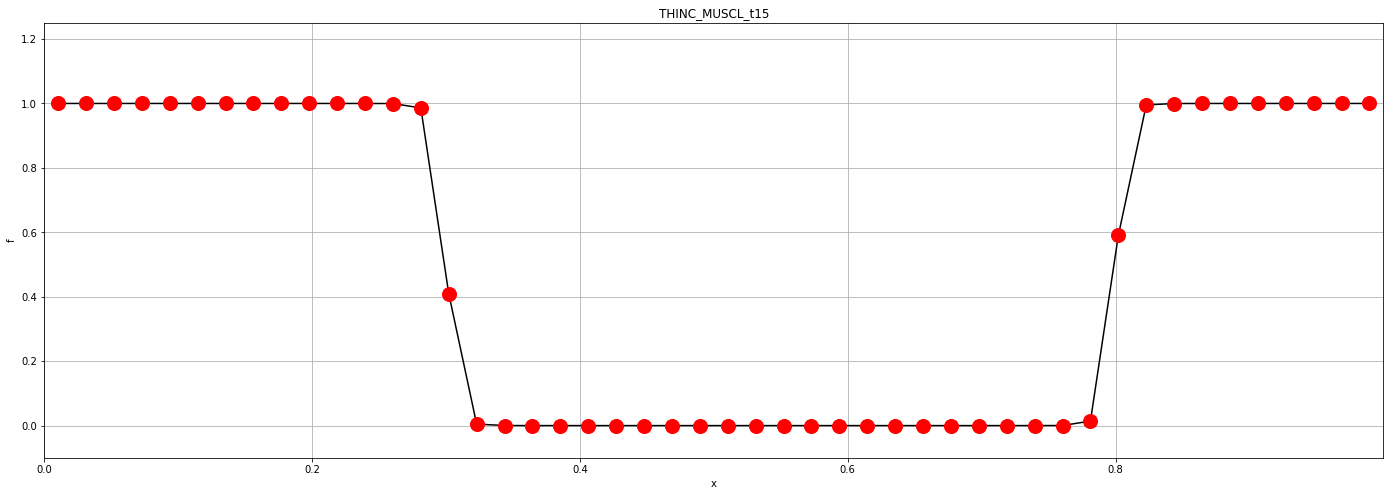

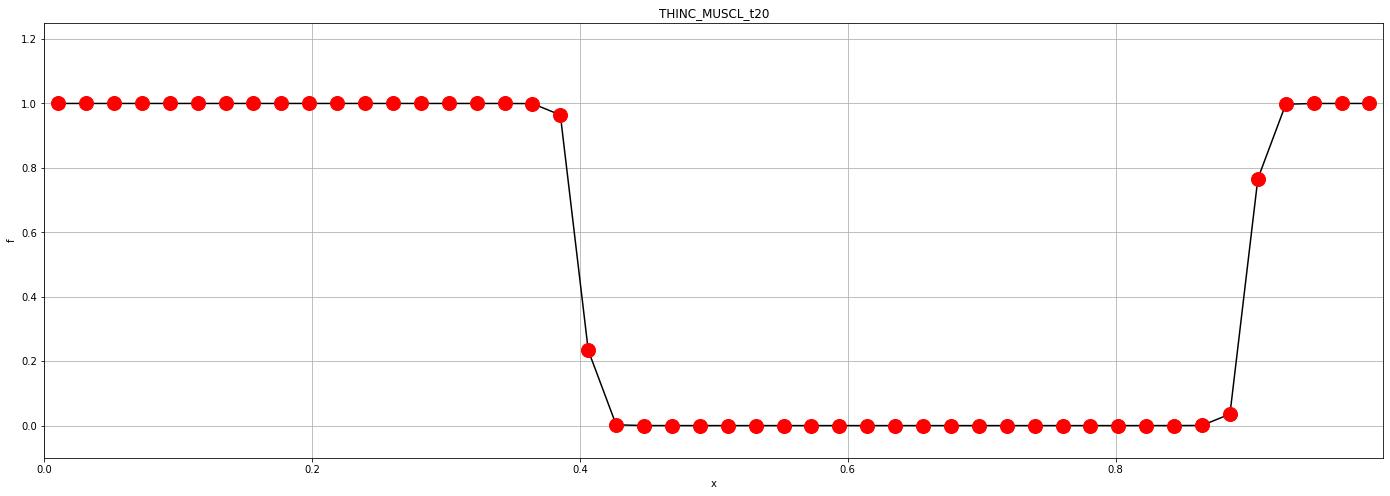

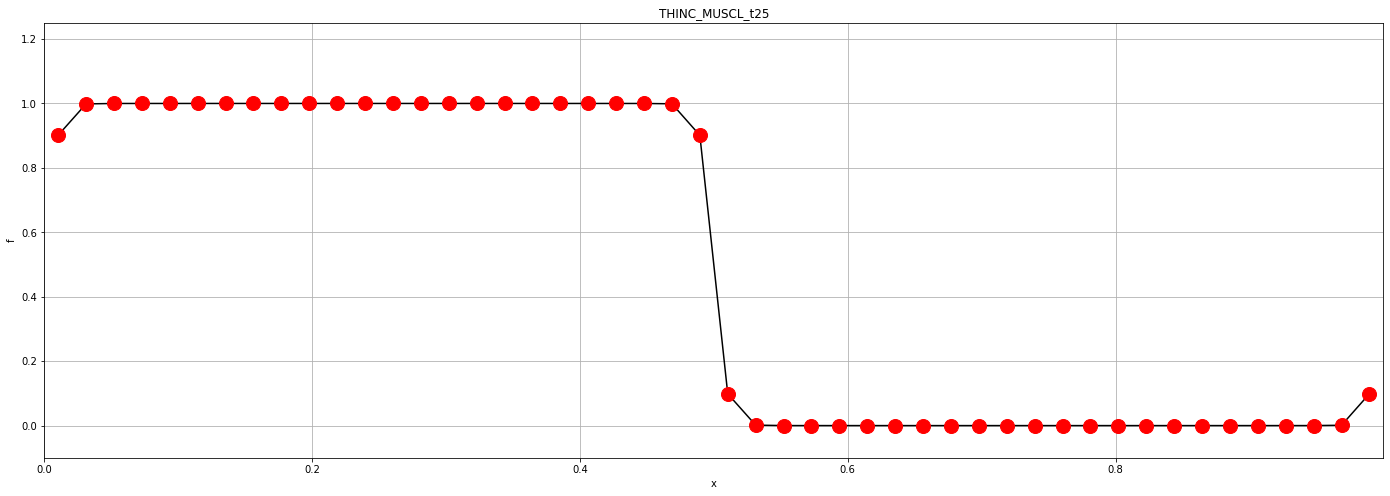

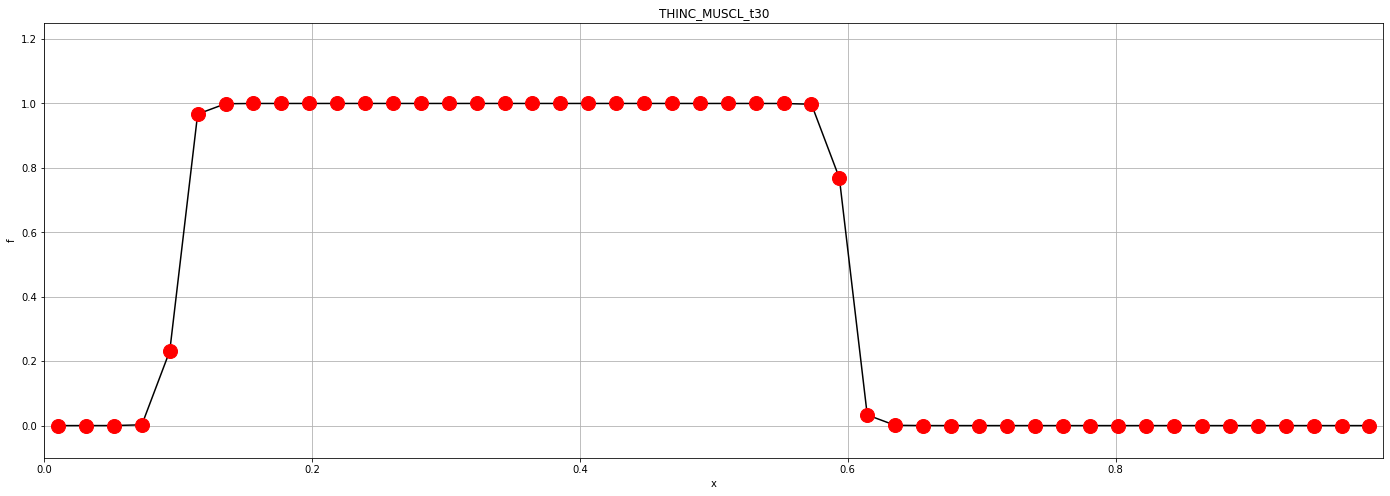

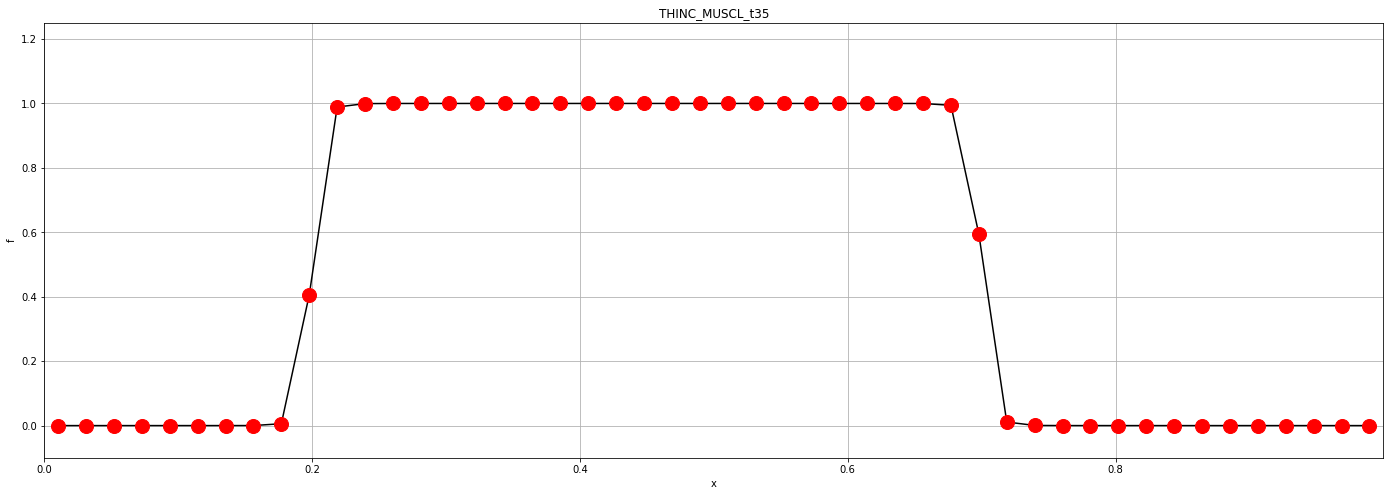

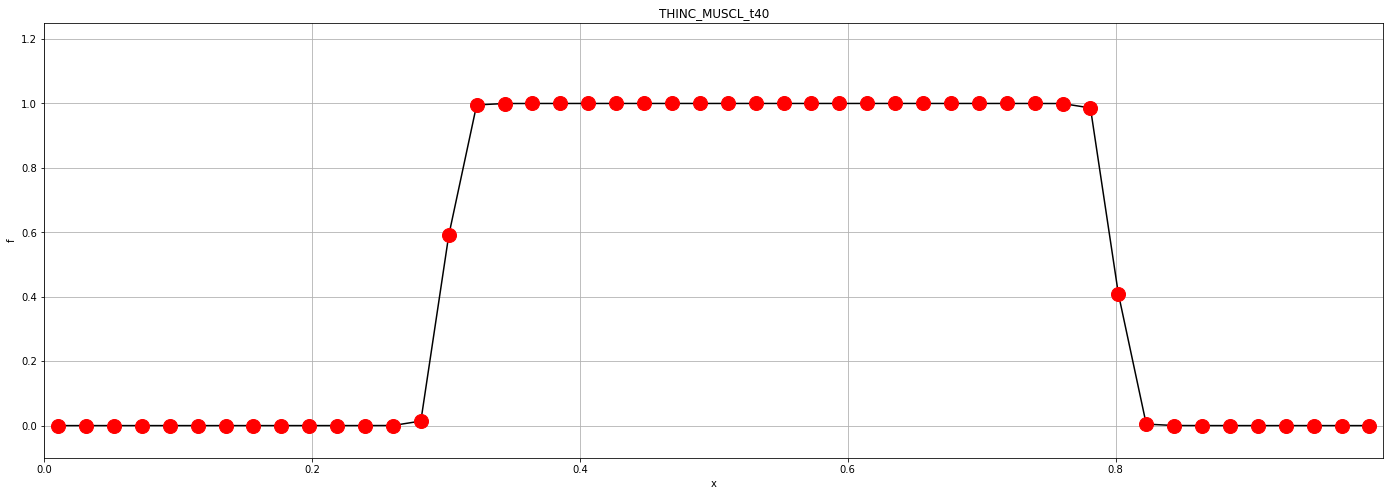

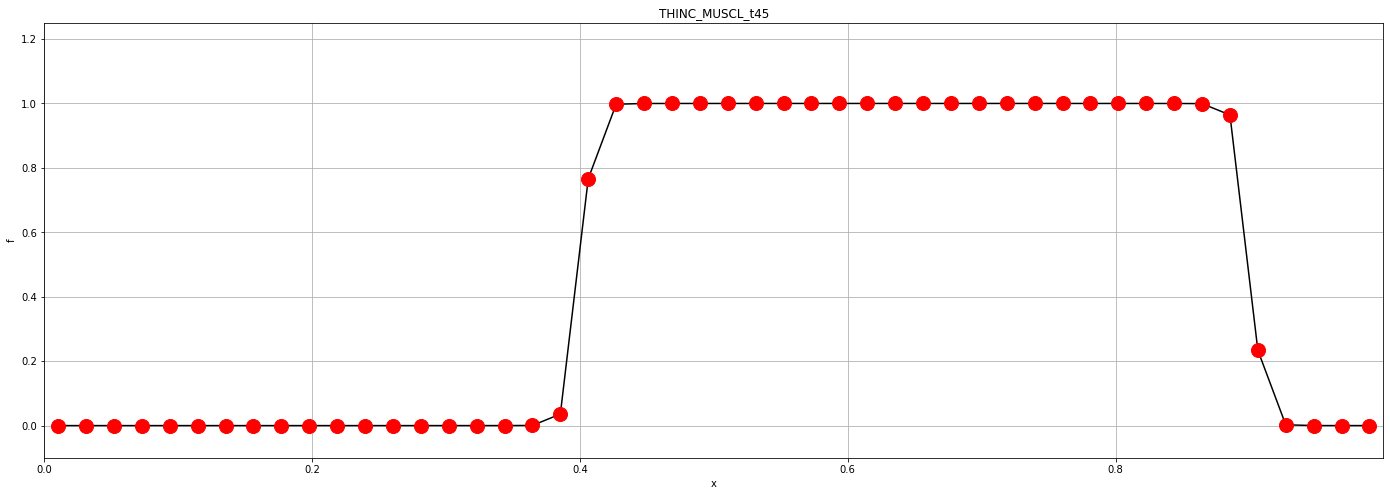

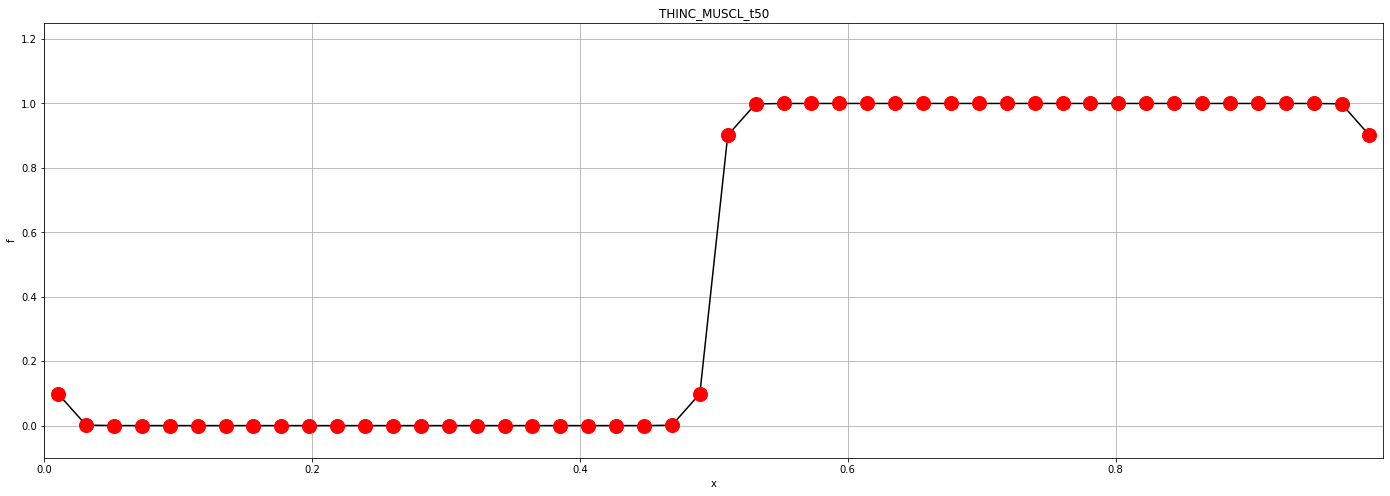

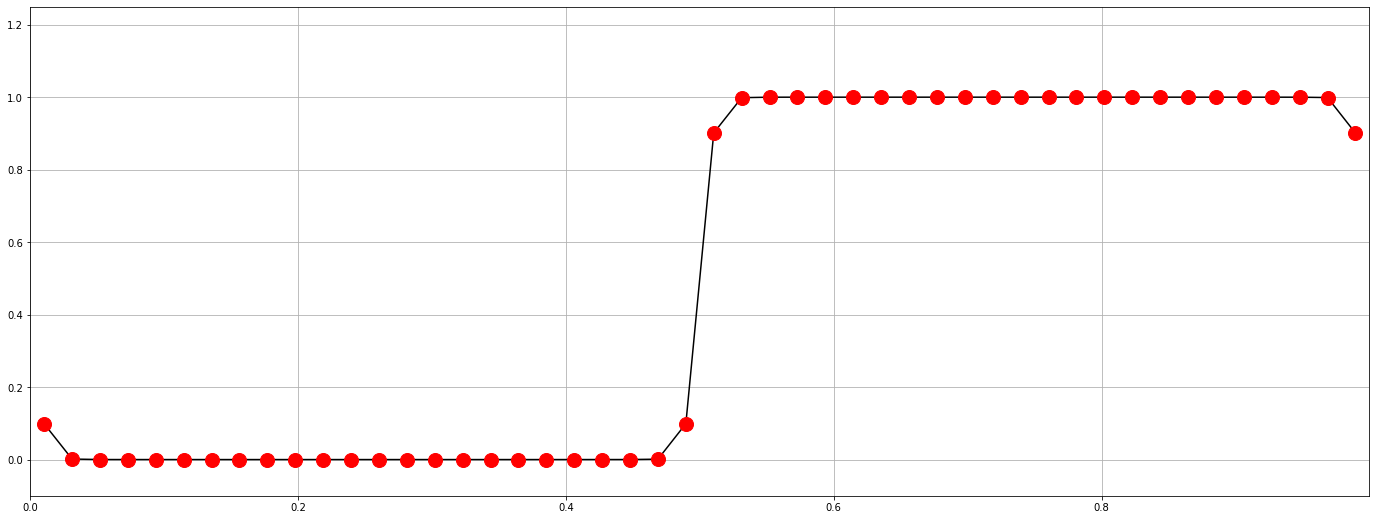

In [11]:
TE1DTestVisualization(calcResPath, plotOutPath, "THINC_MUSCL", "N48_T1.txt", 5, 2, False)